# <center>ANN Implementation Breast Cancer

In [1]:
from __future__ import print_function
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import clear_output
from keras.utils import plot_model

Using TensorFlow backend.


In [3]:
data = pd.read_csv("data.csv")
data.head()
data.drop('id',axis=1,inplace=True)
data.drop('Unnamed: 32',axis=1,inplace=True)
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
print("Row, Col", data.shape)# (row,col)

Row, Col (569, 31)


In [5]:
(data['diagnosis'][:398]==1).sum(),(data['diagnosis'][:398]==0).sum()

(173, 225)

In [6]:
(data['diagnosis'][398:]==1).sum(),(data['diagnosis'][398:]==0).sum()

(39, 132)

In [7]:
mat=data.as_matrix()
mat.shape
mat

array([[  1.     ,  17.99   ,  10.38   , ...,   0.2654 ,   0.4601 ,
          0.1189 ],
       [  1.     ,  20.57   ,  17.77   , ...,   0.186  ,   0.275  ,
          0.08902],
       [  1.     ,  19.69   ,  21.25   , ...,   0.243  ,   0.3613 ,
          0.08758],
       ..., 
       [  1.     ,  16.6    ,  28.08   , ...,   0.1418 ,   0.2218 ,
          0.0782 ],
       [  1.     ,  20.6    ,  29.33   , ...,   0.265  ,   0.4087 ,   0.124  ],
       [  0.     ,   7.76   ,  24.54   , ...,   0.     ,   0.2871 ,
          0.07039]])

In [8]:
model1 = Sequential()
model1.add(Dense(500, activation='sigmoid', use_bias=True, input_shape=(30,)))
model1.add(Dense(1, activation='sigmoid'))
keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
model1.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

foo = model1.fit(mat[:,1:],mat[:,0], validation_split=0.3,shuffle=False,epochs=100, batch_size=128)

Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 1s 3ms/step - loss: 0.6150 - acc: 0.5729 - val_loss: 0.3900 - val_acc: 0.8596
Epoch 2/100
398/398 [==============================] - 0s 90us/step - loss: 0.4320 - acc: 0.8492 - val_loss: 0.3223 - val_acc: 0.9064
Epoch 3/100
398/398 [==============================] - 0s 60us/step - loss: 0.3577 - acc: 0.8819 - val_loss: 0.3092 - val_acc: 0.9123
Epoch 4/100
398/398 [==============================] - 0s 50us/step - loss: 0.3173 - acc: 0.9070 - val_loss: 0.3060 - val_acc: 0.9064
Epoch 5/100
398/398 [==============================] - 0s 50us/step - loss: 0.2855 - acc: 0.9095 - val_loss: 0.2864 - val_acc: 0.9123
Epoch 6/100
398/398 [==============================] - 0s 50us/step - loss: 0.2823 - acc: 0.9221 - val_loss: 0.2676 - val_acc: 0.9240
Epoch 7/100
398/398 [==============================] - 0s 50us/step - loss: 0.2750 - acc: 0.9196 - val_loss: 0.2764 - val_acc: 0.9181
Epoch 8/100
398/3

Epoch 61/100
398/398 [==============================] - 0s 60us/step - loss: 0.1642 - acc: 0.9422 - val_loss: 0.3210 - val_acc: 0.8596
Epoch 62/100
398/398 [==============================] - 0s 60us/step - loss: 0.1623 - acc: 0.9422 - val_loss: 0.3523 - val_acc: 0.8363
Epoch 63/100
398/398 [==============================] - 0s 50us/step - loss: 0.1640 - acc: 0.9447 - val_loss: 0.3597 - val_acc: 0.8129
Epoch 64/100
398/398 [==============================] - 0s 60us/step - loss: 0.1652 - acc: 0.9447 - val_loss: 0.3358 - val_acc: 0.8421
Epoch 65/100
398/398 [==============================] - 0s 60us/step - loss: 0.1641 - acc: 0.9447 - val_loss: 0.2836 - val_acc: 0.9123
Epoch 66/100
398/398 [==============================] - 0s 70us/step - loss: 0.1802 - acc: 0.9372 - val_loss: 0.1542 - val_acc: 0.9474
Epoch 67/100
398/398 [==============================] - 0s 70us/step - loss: 0.2504 - acc: 0.8945 - val_loss: 0.2376 - val_acc: 0.9181
Epoch 68/100
398/398 [==============================] -

In [8]:
score = model1.evaluate(mat[:,1:],mat[:,0], verbose=0, batch_size=128)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.17312462112
Train accuracy: 0.92794375868


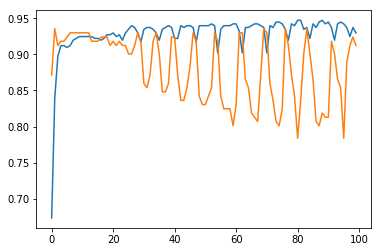

In [9]:
plt.plot(foo.history['acc'])
plt.plot(foo.history['val_acc'])
plt.show()

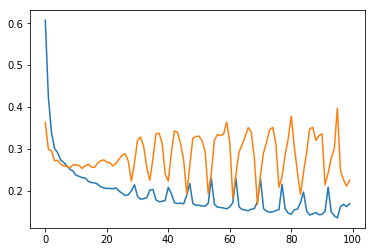

In [10]:
plt.plot(foo.history['loss'])
plt.plot(foo.history['val_loss'])
plt.show()

In [11]:
model1.save('model1.h5')
print("Avg Training acc: ", np.mean(foo.history['acc']),"\nAvg Testing acc: ", np.mean(foo.history['val_acc']))

Avg Training acc:  0.928442210265 
Avg Testing acc:  0.880994155215


### Using 2 Sigmoid Layers and RMSprop optimizer

In [10]:
model2 = Sequential()
model2.add(Dense(500, activation='sigmoid', use_bias=True, input_shape=(30,)))
model2.add(Dense(1, activation='sigmoid'))
keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
model2.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

history01 = model2.fit(mat[:,1:],mat[:,0], validation_split=0.3,shuffle=False,epochs=3000, batch_size=128)

Train on 398 samples, validate on 171 samples
Epoch 1/3000
398/398 [==============================] - 0s 873us/step - loss: 0.5962 - acc: 0.6206 - val_loss: 0.3621 - val_acc: 0.9123
Epoch 2/3000
398/398 [==============================] - 0s 50us/step - loss: 0.4151 - acc: 0.8668 - val_loss: 0.3081 - val_acc: 0.9240
Epoch 3/3000
398/398 [==============================] - 0s 50us/step - loss: 0.3675 - acc: 0.8744 - val_loss: 0.3110 - val_acc: 0.9064
Epoch 4/3000
398/398 [==============================] - 0s 50us/step - loss: 0.3040 - acc: 0.9121 - val_loss: 0.2675 - val_acc: 0.9181
Epoch 5/3000
398/398 [==============================] - 0s 50us/step - loss: 0.3108 - acc: 0.8995 - val_loss: 0.2605 - val_acc: 0.9240
Epoch 6/3000
398/398 [==============================] - 0s 50us/step - loss: 0.2750 - acc: 0.9171 - val_loss: 0.2729 - val_acc: 0.9240
Epoch 7/3000
398/398 [==============================] - 0s 50us/step - loss: 0.2582 - acc: 0.9271 - val_loss: 0.2464 - val_acc: 0.9240
Epoch 8/

Epoch 61/3000
398/398 [==============================] - 0s 70us/step - loss: 0.2114 - acc: 0.9171 - val_loss: 0.2027 - val_acc: 0.9298
Epoch 62/3000
398/398 [==============================] - ETA: 0s - loss: 0.1645 - acc: 0.945 - 0s 40us/step - loss: 0.1882 - acc: 0.9271 - val_loss: 0.2684 - val_acc: 0.9006
Epoch 63/3000
398/398 [==============================] - 0s 50us/step - loss: 0.1594 - acc: 0.9372 - val_loss: 0.3267 - val_acc: 0.8421
Epoch 64/3000
398/398 [==============================] - 0s 40us/step - loss: 0.1561 - acc: 0.9447 - val_loss: 0.3671 - val_acc: 0.7953
Epoch 65/3000
398/398 [==============================] - 0s 40us/step - loss: 0.1641 - acc: 0.9447 - val_loss: 0.3292 - val_acc: 0.8304
Epoch 66/3000
398/398 [==============================] - 0s 50us/step - loss: 0.1618 - acc: 0.9372 - val_loss: 0.2591 - val_acc: 0.9123
Epoch 67/3000
398/398 [==============================] - 0s 50us/step - loss: 0.1825 - acc: 0.9397 - val_loss: 0.1604 - val_acc: 0.9298
Epoch 68/3

Epoch 120/3000
398/398 [==============================] - 0s 50us/step - loss: 0.1667 - acc: 0.9296 - val_loss: 0.2041 - val_acc: 0.9415
Epoch 121/3000
398/398 [==============================] - 0s 50us/step - loss: 0.1567 - acc: 0.9271 - val_loss: 0.2154 - val_acc: 0.9240
Epoch 122/3000
398/398 [==============================] - 0s 40us/step - loss: 0.1500 - acc: 0.9347 - val_loss: 0.2061 - val_acc: 0.9357
Epoch 123/3000
398/398 [==============================] - 0s 40us/step - loss: 0.1621 - acc: 0.9296 - val_loss: 0.1895 - val_acc: 0.9474
Epoch 124/3000
398/398 [==============================] - 0s 40us/step - loss: 0.1672 - acc: 0.9296 - val_loss: 0.2179 - val_acc: 0.9181
Epoch 125/3000
398/398 [==============================] - 0s 40us/step - loss: 0.1475 - acc: 0.9322 - val_loss: 0.2190 - val_acc: 0.9240
Epoch 126/3000
398/398 [==============================] - 0s 40us/step - loss: 0.1482 - acc: 0.9422 - val_loss: 0.1985 - val_acc: 0.9415
Epoch 127/3000
398/398 [=================

Epoch 180/3000
398/398 [==============================] - 0s 50us/step - loss: 0.1151 - acc: 0.9523 - val_loss: 0.3936 - val_acc: 0.7836
Epoch 181/3000
398/398 [==============================] - 0s 50us/step - loss: 0.1524 - acc: 0.9347 - val_loss: 0.2839 - val_acc: 0.8655
Epoch 182/3000
398/398 [==============================] - 0s 40us/step - loss: 0.1383 - acc: 0.9347 - val_loss: 0.2160 - val_acc: 0.9240
Epoch 183/3000
398/398 [==============================] - 0s 50us/step - loss: 0.1388 - acc: 0.9472 - val_loss: 0.1507 - val_acc: 0.9591
Epoch 184/3000
398/398 [==============================] - 0s 40us/step - loss: 0.1871 - acc: 0.9171 - val_loss: 0.1991 - val_acc: 0.9298
Epoch 185/3000
398/398 [==============================] - 0s 50us/step - loss: 0.1259 - acc: 0.9497 - val_loss: 0.2150 - val_acc: 0.9123
Epoch 186/3000
398/398 [==============================] - 0s 50us/step - loss: 0.1208 - acc: 0.9548 - val_loss: 0.2193 - val_acc: 0.9123
Epoch 187/3000
398/398 [=================

398/398 [==============================] - 0s 50us/step - loss: 0.1058 - acc: 0.9623 - val_loss: 0.2322 - val_acc: 0.8889
Epoch 240/3000
398/398 [==============================] - 0s 50us/step - loss: 0.1020 - acc: 0.9573 - val_loss: 0.3010 - val_acc: 0.8538
Epoch 241/3000
398/398 [==============================] - 0s 40us/step - loss: 0.1328 - acc: 0.9447 - val_loss: 0.2973 - val_acc: 0.8363
Epoch 242/3000
398/398 [==============================] - 0s 50us/step - loss: 0.1244 - acc: 0.9472 - val_loss: 0.2148 - val_acc: 0.9064
Epoch 243/3000
398/398 [==============================] - 0s 50us/step - loss: 0.1176 - acc: 0.9523 - val_loss: 0.1514 - val_acc: 0.9649
Epoch 244/3000
398/398 [==============================] - 0s 40us/step - loss: 0.1782 - acc: 0.9296 - val_loss: 0.1672 - val_acc: 0.9474
Epoch 245/3000
398/398 [==============================] - 0s 40us/step - loss: 0.1199 - acc: 0.9497 - val_loss: 0.1895 - val_acc: 0.9123
Epoch 246/3000
398/398 [==============================] 

398/398 [==============================] - 0s 40us/step - loss: 0.1040 - acc: 0.9573 - val_loss: 0.1880 - val_acc: 0.9123
Epoch 299/3000
398/398 [==============================] - 0s 60us/step - loss: 0.0977 - acc: 0.9598 - val_loss: 0.1911 - val_acc: 0.9064
Epoch 300/3000
398/398 [==============================] - 0s 60us/step - loss: 0.0976 - acc: 0.9573 - val_loss: 0.1886 - val_acc: 0.9123
Epoch 301/3000
398/398 [==============================] - 0s 60us/step - loss: 0.1102 - acc: 0.9523 - val_loss: 0.1300 - val_acc: 0.9591
Epoch 302/3000
398/398 [==============================] - 0s 40us/step - loss: 0.1918 - acc: 0.9171 - val_loss: 0.1567 - val_acc: 0.9474
Epoch 303/3000
398/398 [==============================] - 0s 40us/step - loss: 0.1065 - acc: 0.9548 - val_loss: 0.1881 - val_acc: 0.9240
Epoch 304/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0981 - acc: 0.9598 - val_loss: 0.1903 - val_acc: 0.9064
Epoch 305/3000
398/398 [==============================] 

398/398 [==============================] - 0s 50us/step - loss: 0.1135 - acc: 0.9472 - val_loss: 0.1465 - val_acc: 0.9591
Epoch 358/3000
398/398 [==============================] - 0s 40us/step - loss: 0.1146 - acc: 0.9497 - val_loss: 0.1537 - val_acc: 0.9532
Epoch 359/3000
398/398 [==============================] - 0s 50us/step - loss: 0.1038 - acc: 0.9548 - val_loss: 0.1597 - val_acc: 0.9474
Epoch 360/3000
398/398 [==============================] - 0s 50us/step - loss: 0.1024 - acc: 0.9548 - val_loss: 0.1514 - val_acc: 0.9532
Epoch 361/3000
398/398 [==============================] - 0s 40us/step - loss: 0.1129 - acc: 0.9472 - val_loss: 0.1452 - val_acc: 0.9591
Epoch 362/3000
398/398 [==============================] - 0s 60us/step - loss: 0.1208 - acc: 0.9472 - val_loss: 0.1497 - val_acc: 0.9532
Epoch 363/3000
398/398 [==============================] - 0s 50us/step - loss: 0.1033 - acc: 0.9523 - val_loss: 0.1675 - val_acc: 0.9357
Epoch 364/3000
398/398 [==============================] 

398/398 [==============================] - 0s 50us/step - loss: 0.0926 - acc: 0.9598 - val_loss: 0.1385 - val_acc: 0.9532
Epoch 417/3000
398/398 [==============================] - 0s 40us/step - loss: 0.2951 - acc: 0.8894 - val_loss: 0.1270 - val_acc: 0.9532
Epoch 418/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0901 - acc: 0.9573 - val_loss: 0.1137 - val_acc: 0.9708
Epoch 419/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0893 - acc: 0.9598 - val_loss: 0.1324 - val_acc: 0.9591
Epoch 420/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0828 - acc: 0.9648 - val_loss: 0.1534 - val_acc: 0.9357
Epoch 421/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0797 - acc: 0.9673 - val_loss: 0.1689 - val_acc: 0.9181
Epoch 422/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0773 - acc: 0.9673 - val_loss: 0.2109 - val_acc: 0.9006
Epoch 423/3000
398/398 [==============================] 

398/398 [==============================] - 0s 40us/step - loss: 0.0924 - acc: 0.9573 - val_loss: 0.1364 - val_acc: 0.9474
Epoch 476/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0779 - acc: 0.9623 - val_loss: 0.1558 - val_acc: 0.9298
Epoch 477/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0709 - acc: 0.9724 - val_loss: 0.2006 - val_acc: 0.9064
Epoch 478/3000
398/398 [==============================] - 0s 50us/step - loss: 0.1047 - acc: 0.9472 - val_loss: 0.2627 - val_acc: 0.8538
Epoch 479/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0936 - acc: 0.9598 - val_loss: 0.1788 - val_acc: 0.9240
Epoch 480/3000
398/398 [==============================] - 0s 80us/step - loss: 0.0760 - acc: 0.9749 - val_loss: 0.1325 - val_acc: 0.9474
Epoch 481/3000
398/398 [==============================] - 0s 60us/step - loss: 0.1138 - acc: 0.9472 - val_loss: 0.1326 - val_acc: 0.9591
Epoch 482/3000
398/398 [==============================] 

398/398 [==============================] - 0s 40us/step - loss: 0.0740 - acc: 0.9598 - val_loss: 0.1473 - val_acc: 0.9415
Epoch 535/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0747 - acc: 0.9598 - val_loss: 0.1384 - val_acc: 0.9532
Epoch 536/3000
398/398 [==============================] - 0s 40us/step - loss: 0.1169 - acc: 0.9472 - val_loss: 0.1218 - val_acc: 0.9591
Epoch 537/3000
398/398 [==============================] - 0s 50us/step - loss: 0.1205 - acc: 0.9497 - val_loss: 0.1192 - val_acc: 0.9591
Epoch 538/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0757 - acc: 0.9673 - val_loss: 0.1269 - val_acc: 0.9532
Epoch 539/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0700 - acc: 0.9648 - val_loss: 0.1426 - val_acc: 0.9357
Epoch 540/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0667 - acc: 0.9673 - val_loss: 0.1559 - val_acc: 0.9298
Epoch 541/3000
398/398 [==============================] 

398/398 [==============================] - 0s 50us/step - loss: 0.0696 - acc: 0.9598 - val_loss: 0.1400 - val_acc: 0.9474
Epoch 594/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0676 - acc: 0.9648 - val_loss: 0.1425 - val_acc: 0.9474
Epoch 595/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0804 - acc: 0.9573 - val_loss: 0.1241 - val_acc: 0.9591
Epoch 596/3000
398/398 [==============================] - 0s 50us/step - loss: 0.1800 - acc: 0.9221 - val_loss: 0.1236 - val_acc: 0.9649
Epoch 597/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0790 - acc: 0.9673 - val_loss: 0.1026 - val_acc: 0.9708
Epoch 598/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0725 - acc: 0.9724 - val_loss: 0.1157 - val_acc: 0.9591
Epoch 599/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0657 - acc: 0.9698 - val_loss: 0.1287 - val_acc: 0.9532
Epoch 600/3000
398/398 [==============================] 

Epoch 653/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0618 - acc: 0.9724 - val_loss: 0.1364 - val_acc: 0.9415
Epoch 654/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0559 - acc: 0.9799 - val_loss: 0.1769 - val_acc: 0.9240
Epoch 655/3000
398/398 [==============================] - 0s 50us/step - loss: 0.1286 - acc: 0.9422 - val_loss: 0.2101 - val_acc: 0.9240
Epoch 656/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0830 - acc: 0.9623 - val_loss: 0.1300 - val_acc: 0.9474
Epoch 657/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0624 - acc: 0.9799 - val_loss: 0.1054 - val_acc: 0.9591
Epoch 658/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0850 - acc: 0.9598 - val_loss: 0.1236 - val_acc: 0.9532
Epoch 659/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0622 - acc: 0.9749 - val_loss: 0.1129 - val_acc: 0.9591
Epoch 660/3000
398/398 [=================

398/398 [==============================] - 0s 40us/step - loss: 0.0579 - acc: 0.9799 - val_loss: 0.1202 - val_acc: 0.9474
Epoch 713/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0525 - acc: 0.9849 - val_loss: 0.1323 - val_acc: 0.9474
Epoch 714/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0497 - acc: 0.9824 - val_loss: 0.1856 - val_acc: 0.9006
Epoch 715/3000
398/398 [==============================] - 0s 50us/step - loss: 0.1456 - acc: 0.9422 - val_loss: 0.1787 - val_acc: 0.9415
Epoch 716/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0770 - acc: 0.9648 - val_loss: 0.1132 - val_acc: 0.9474
Epoch 717/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0603 - acc: 0.9799 - val_loss: 0.1042 - val_acc: 0.9532
Epoch 718/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0710 - acc: 0.9673 - val_loss: 0.1245 - val_acc: 0.9474
Epoch 719/3000
398/398 [==============================] 

Epoch 772/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0557 - acc: 0.9799 - val_loss: 0.1456 - val_acc: 0.9474
Epoch 773/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0540 - acc: 0.9774 - val_loss: 0.2864 - val_acc: 0.8538
Epoch 774/3000
398/398 [==============================] - 0s 50us/step - loss: 0.1208 - acc: 0.9422 - val_loss: 0.1189 - val_acc: 0.9591
Epoch 775/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0842 - acc: 0.9623 - val_loss: 0.1100 - val_acc: 0.9474
Epoch 776/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0564 - acc: 0.9824 - val_loss: 0.1048 - val_acc: 0.9532
Epoch 777/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0596 - acc: 0.9749 - val_loss: 0.1177 - val_acc: 0.9532
Epoch 778/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0530 - acc: 0.9874 - val_loss: 0.1217 - val_acc: 0.9532
Epoch 779/3000
398/398 [=================

398/398 [==============================] - 0s 50us/step - loss: 0.0611 - acc: 0.9774 - val_loss: 0.0986 - val_acc: 0.9532
Epoch 832/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0498 - acc: 0.9874 - val_loss: 0.1001 - val_acc: 0.9474
Epoch 833/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0745 - acc: 0.9673 - val_loss: 0.1418 - val_acc: 0.9474
Epoch 834/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0517 - acc: 0.9849 - val_loss: 0.1148 - val_acc: 0.9591
Epoch 835/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0463 - acc: 0.9874 - val_loss: 0.1281 - val_acc: 0.9532
Epoch 836/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0455 - acc: 0.9824 - val_loss: 0.2739 - val_acc: 0.8596
Epoch 837/3000
398/398 [==============================] - 0s 40us/step - loss: 0.1611 - acc: 0.9347 - val_loss: 0.1234 - val_acc: 0.9474
Epoch 838/3000
398/398 [==============================] 

Epoch 891/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0505 - acc: 0.9799 - val_loss: 0.0936 - val_acc: 0.9591
Epoch 892/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0730 - acc: 0.9698 - val_loss: 0.1709 - val_acc: 0.9474
Epoch 893/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0554 - acc: 0.9774 - val_loss: 0.2009 - val_acc: 0.9240
Epoch 894/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0832 - acc: 0.9573 - val_loss: 0.1173 - val_acc: 0.9474
Epoch 895/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0610 - acc: 0.9774 - val_loss: 0.1148 - val_acc: 0.9474
Epoch 896/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0474 - acc: 0.9899 - val_loss: 0.1138 - val_acc: 0.9532
Epoch 897/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0480 - acc: 0.9824 - val_loss: 0.1245 - val_acc: 0.9532
Epoch 898/3000
398/398 [=================

398/398 [==============================] - 0s 40us/step - loss: 0.1224 - acc: 0.9397 - val_loss: 0.1555 - val_acc: 0.9474
Epoch 951/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0673 - acc: 0.9749 - val_loss: 0.0765 - val_acc: 0.9708
Epoch 952/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0566 - acc: 0.9774 - val_loss: 0.0944 - val_acc: 0.9532
Epoch 953/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0451 - acc: 0.9874 - val_loss: 0.0926 - val_acc: 0.9591
Epoch 954/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0566 - acc: 0.9749 - val_loss: 0.1291 - val_acc: 0.9474
Epoch 955/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0634 - acc: 0.9724 - val_loss: 0.1820 - val_acc: 0.9357
Epoch 956/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0728 - acc: 0.9724 - val_loss: 0.0814 - val_acc: 0.9708
Epoch 957/3000
398/398 [==============================] 

Epoch 1010/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0921 - acc: 0.9497 - val_loss: 0.1090 - val_acc: 0.9591
Epoch 1011/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0549 - acc: 0.9774 - val_loss: 0.0782 - val_acc: 0.9591
Epoch 1012/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0888 - acc: 0.9497 - val_loss: 0.1095 - val_acc: 0.9591
Epoch 1013/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0555 - acc: 0.9749 - val_loss: 0.0778 - val_acc: 0.9591
Epoch 1014/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0867 - acc: 0.9497 - val_loss: 0.1089 - val_acc: 0.9649
Epoch 1015/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0533 - acc: 0.9799 - val_loss: 0.0774 - val_acc: 0.9591
Epoch 1016/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0879 - acc: 0.9497 - val_loss: 0.1191 - val_acc: 0.9591
Epoch 1017/3000
398/398 [=========

398/398 [==============================] - 0s 40us/step - loss: 0.0574 - acc: 0.9774 - val_loss: 0.0744 - val_acc: 0.9591
Epoch 1070/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0803 - acc: 0.9573 - val_loss: 0.1070 - val_acc: 0.9649
Epoch 1071/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0525 - acc: 0.9799 - val_loss: 0.0769 - val_acc: 0.9591
Epoch 1072/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0859 - acc: 0.9497 - val_loss: 0.1181 - val_acc: 0.9591
Epoch 1073/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0585 - acc: 0.9774 - val_loss: 0.0742 - val_acc: 0.9591
Epoch 1074/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0799 - acc: 0.9573 - val_loss: 0.1046 - val_acc: 0.9649
Epoch 1075/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0519 - acc: 0.9799 - val_loss: 0.0767 - val_acc: 0.9591
Epoch 1076/3000
398/398 [=========================

Epoch 1128/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0830 - acc: 0.9472 - val_loss: 0.1223 - val_acc: 0.9532
Epoch 1129/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0596 - acc: 0.9774 - val_loss: 0.0744 - val_acc: 0.9591
Epoch 1130/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0799 - acc: 0.9573 - val_loss: 0.0996 - val_acc: 0.9649
Epoch 1131/3000
398/398 [==============================] - ETA: 0s - loss: 0.0340 - acc: 0.992 - 0s 40us/step - loss: 0.0517 - acc: 0.9774 - val_loss: 0.0766 - val_acc: 0.9591
Epoch 1132/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0812 - acc: 0.9472 - val_loss: 0.1063 - val_acc: 0.9649
Epoch 1133/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0547 - acc: 0.9774 - val_loss: 0.0791 - val_acc: 0.9591
Epoch 1134/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0791 - acc: 0.9573 - val_loss: 0.1042 - val_acc: 0.9

Epoch 1187/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0530 - acc: 0.9774 - val_loss: 0.0805 - val_acc: 0.9591
Epoch 1188/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0769 - acc: 0.9523 - val_loss: 0.1047 - val_acc: 0.9532
Epoch 1189/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0524 - acc: 0.9774 - val_loss: 0.0797 - val_acc: 0.9591
Epoch 1190/3000
398/398 [==============================] - 0s 60us/step - loss: 0.0779 - acc: 0.9523 - val_loss: 0.1094 - val_acc: 0.9532
Epoch 1191/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0522 - acc: 0.9774 - val_loss: 0.0785 - val_acc: 0.9591
Epoch 1192/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0775 - acc: 0.9523 - val_loss: 0.1115 - val_acc: 0.9591
Epoch 1193/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0543 - acc: 0.9774 - val_loss: 0.0784 - val_acc: 0.9591
Epoch 1194/3000
398/398 [=========

398/398 [==============================] - 0s 50us/step - loss: 0.0787 - acc: 0.9523 - val_loss: 0.1109 - val_acc: 0.9532
Epoch 1247/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0535 - acc: 0.9774 - val_loss: 0.0780 - val_acc: 0.9649
Epoch 1248/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0697 - acc: 0.9623 - val_loss: 0.0995 - val_acc: 0.9532
Epoch 1249/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0501 - acc: 0.9774 - val_loss: 0.0788 - val_acc: 0.9649
Epoch 1250/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0790 - acc: 0.9523 - val_loss: 0.1186 - val_acc: 0.9591
Epoch 1251/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0561 - acc: 0.9774 - val_loss: 0.0788 - val_acc: 0.9649
Epoch 1252/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0692 - acc: 0.9623 - val_loss: 0.0958 - val_acc: 0.9532
Epoch 1253/3000
398/398 [=========================

398/398 [==============================] - 0s 40us/step - loss: 0.0469 - acc: 0.9774 - val_loss: 0.0794 - val_acc: 0.9591
Epoch 1306/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0813 - acc: 0.9497 - val_loss: 0.1222 - val_acc: 0.9591
Epoch 1307/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0634 - acc: 0.9698 - val_loss: 0.0778 - val_acc: 0.9591
Epoch 1308/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0588 - acc: 0.9673 - val_loss: 0.0965 - val_acc: 0.9532
Epoch 1309/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0411 - acc: 0.9849 - val_loss: 0.0759 - val_acc: 0.9591
Epoch 1310/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0619 - acc: 0.9698 - val_loss: 0.1101 - val_acc: 0.9532
Epoch 1311/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0550 - acc: 0.9774 - val_loss: 0.0771 - val_acc: 0.9649
Epoch 1312/3000
398/398 [=========================

398/398 [==============================] - 0s 50us/step - loss: 0.0657 - acc: 0.9623 - val_loss: 0.1104 - val_acc: 0.9532
Epoch 1365/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0499 - acc: 0.9774 - val_loss: 0.0810 - val_acc: 0.9649
Epoch 1366/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0696 - acc: 0.9573 - val_loss: 0.1011 - val_acc: 0.9532
Epoch 1367/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0492 - acc: 0.9774 - val_loss: 0.0773 - val_acc: 0.9649
Epoch 1368/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0670 - acc: 0.9623 - val_loss: 0.1205 - val_acc: 0.9591
Epoch 1369/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0525 - acc: 0.9774 - val_loss: 0.0785 - val_acc: 0.9708
Epoch 1370/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0683 - acc: 0.9573 - val_loss: 0.1015 - val_acc: 0.9532
Epoch 1371/3000
398/398 [=========================

398/398 [==============================] - 0s 40us/step - loss: 0.0477 - acc: 0.9774 - val_loss: 0.0783 - val_acc: 0.9649
Epoch 1424/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0587 - acc: 0.9698 - val_loss: 0.0989 - val_acc: 0.9532
Epoch 1425/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0469 - acc: 0.9774 - val_loss: 0.0809 - val_acc: 0.9708
Epoch 1426/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0704 - acc: 0.9573 - val_loss: 0.1108 - val_acc: 0.9532
Epoch 1427/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0499 - acc: 0.9774 - val_loss: 0.0767 - val_acc: 0.9708
Epoch 1428/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0602 - acc: 0.9698 - val_loss: 0.1035 - val_acc: 0.9532
Epoch 1429/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0469 - acc: 0.9774 - val_loss: 0.0801 - val_acc: 0.9708
Epoch 1430/3000
398/398 [=========================

398/398 [==============================] - 0s 40us/step - loss: 0.0479 - acc: 0.9774 - val_loss: 0.0809 - val_acc: 0.9708
Epoch 1482/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0642 - acc: 0.9673 - val_loss: 0.0998 - val_acc: 0.9532
Epoch 1483/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0456 - acc: 0.9774 - val_loss: 0.0753 - val_acc: 0.9708
Epoch 1484/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0558 - acc: 0.9774 - val_loss: 0.1065 - val_acc: 0.9532
Epoch 1485/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0458 - acc: 0.9799 - val_loss: 0.0783 - val_acc: 0.9708
Epoch 1486/3000
398/398 [==============================] - ETA: 0s - loss: 0.0552 - acc: 0.976 - 0s 40us/step - loss: 0.0651 - acc: 0.9673 - val_loss: 0.1139 - val_acc: 0.9532
Epoch 1487/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0496 - acc: 0.9774 - val_loss: 0.0764 - val_acc: 0.9649
Epoch 1488/3

Epoch 1540/3000
398/398 [==============================] - ETA: 0s - loss: 0.0510 - acc: 0.976 - 0s 40us/step - loss: 0.0553 - acc: 0.9749 - val_loss: 0.1093 - val_acc: 0.9532
Epoch 1541/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0472 - acc: 0.9799 - val_loss: 0.0791 - val_acc: 0.9766
Epoch 1542/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0606 - acc: 0.9749 - val_loss: 0.1097 - val_acc: 0.9532
Epoch 1543/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0447 - acc: 0.9799 - val_loss: 0.0776 - val_acc: 0.9649
Epoch 1544/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0542 - acc: 0.9749 - val_loss: 0.1005 - val_acc: 0.9532
Epoch 1545/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0461 - acc: 0.9799 - val_loss: 0.0774 - val_acc: 0.9708
Epoch 1546/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0611 - acc: 0.9749 - val_loss: 0.1116 - val_acc: 0.9

Epoch 1599/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0574 - acc: 0.9774 - val_loss: 0.1288 - val_acc: 0.9532
Epoch 1600/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0536 - acc: 0.9749 - val_loss: 0.0691 - val_acc: 0.9708
Epoch 1601/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0517 - acc: 0.9749 - val_loss: 0.1041 - val_acc: 0.9591
Epoch 1602/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0363 - acc: 0.9824 - val_loss: 0.0737 - val_acc: 0.9591
Epoch 1603/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0418 - acc: 0.9874 - val_loss: 0.1150 - val_acc: 0.9532
Epoch 1604/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0548 - acc: 0.9799 - val_loss: 0.0794 - val_acc: 0.9532
Epoch 1605/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0415 - acc: 0.9799 - val_loss: 0.0789 - val_acc: 0.9649
Epoch 1606/3000
398/398 [=========

398/398 [==============================] - 0s 40us/step - loss: 0.0446 - acc: 0.9824 - val_loss: 0.0630 - val_acc: 0.9825
Epoch 1659/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0584 - acc: 0.9749 - val_loss: 0.1624 - val_acc: 0.9357
Epoch 1660/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0639 - acc: 0.9749 - val_loss: 0.0667 - val_acc: 0.9708
Epoch 1661/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0475 - acc: 0.9799 - val_loss: 0.1100 - val_acc: 0.9532
Epoch 1662/3000
398/398 [==============================] - ETA: 0s - loss: 0.0181 - acc: 1.000 - 0s 50us/step - loss: 0.0351 - acc: 0.9824 - val_loss: 0.0687 - val_acc: 0.9649
Epoch 1663/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0332 - acc: 0.9874 - val_loss: 0.1237 - val_acc: 0.9415
Epoch 1664/3000
398/398 [==============================] - ETA: 0s - loss: 0.0158 - acc: 1.000 - 0s 40us/step - loss: 0.0653 - acc: 0.9749 - val_loss:

398/398 [==============================] - 0s 50us/step - loss: 0.0463 - acc: 0.9774 - val_loss: 0.1174 - val_acc: 0.9474
Epoch 1717/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0377 - acc: 0.9824 - val_loss: 0.0743 - val_acc: 0.9708
Epoch 1718/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0445 - acc: 0.9799 - val_loss: 0.1449 - val_acc: 0.9415
Epoch 1719/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0554 - acc: 0.9824 - val_loss: 0.0678 - val_acc: 0.9532
Epoch 1720/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0304 - acc: 0.9899 - val_loss: 0.1057 - val_acc: 0.9415
Epoch 1721/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0615 - acc: 0.9724 - val_loss: 0.1038 - val_acc: 0.9532
Epoch 1722/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0422 - acc: 0.9698 - val_loss: 0.0875 - val_acc: 0.9532
Epoch 1723/3000
398/398 [=========================

398/398 [==============================] - 0s 50us/step - loss: 0.0826 - acc: 0.9673 - val_loss: 0.1608 - val_acc: 0.9357
Epoch 1776/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0499 - acc: 0.9749 - val_loss: 0.0926 - val_acc: 0.9532
Epoch 1777/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0259 - acc: 0.9950 - val_loss: 0.1292 - val_acc: 0.9357
Epoch 1778/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0510 - acc: 0.9799 - val_loss: 0.0661 - val_acc: 0.9825
Epoch 1779/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0489 - acc: 0.9799 - val_loss: 0.1322 - val_acc: 0.9474
Epoch 1780/3000
398/398 [==============================] - 0s 60us/step - loss: 0.0429 - acc: 0.9849 - val_loss: 0.0714 - val_acc: 0.9766
Epoch 1781/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0469 - acc: 0.9774 - val_loss: 0.1343 - val_acc: 0.9415
Epoch 1782/3000
398/398 [=========================

Epoch 1834/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0295 - acc: 0.9874 - val_loss: 0.0871 - val_acc: 0.9415
Epoch 1835/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0240 - acc: 0.9925 - val_loss: 0.0841 - val_acc: 0.9474
Epoch 1836/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0206 - acc: 0.9950 - val_loss: 0.0905 - val_acc: 0.9474
Epoch 1837/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0256 - acc: 0.9899 - val_loss: 0.0674 - val_acc: 0.9825
Epoch 1838/3000
398/398 [==============================] - 0s 60us/step - loss: 0.1216 - acc: 0.9447 - val_loss: 0.1835 - val_acc: 0.9415
Epoch 1839/3000
398/398 [==============================] - 0s 60us/step - loss: 0.0582 - acc: 0.9774 - val_loss: 0.0720 - val_acc: 0.9591
Epoch 1840/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0261 - acc: 0.9950 - val_loss: 0.1057 - val_acc: 0.9357
Epoch 1841/3000
398/398 [=========

398/398 [==============================] - 0s 50us/step - loss: 0.0388 - acc: 0.9799 - val_loss: 0.0808 - val_acc: 0.9474
Epoch 1894/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0251 - acc: 0.9899 - val_loss: 0.1093 - val_acc: 0.9357
Epoch 1895/3000
398/398 [==============================] - 0s 70us/step - loss: 0.0744 - acc: 0.9698 - val_loss: 0.1560 - val_acc: 0.9415
Epoch 1896/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0409 - acc: 0.9824 - val_loss: 0.1244 - val_acc: 0.9298
Epoch 1897/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0265 - acc: 0.9925 - val_loss: 0.0826 - val_acc: 0.9591
Epoch 1898/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0202 - acc: 0.9950 - val_loss: 0.0896 - val_acc: 0.9474
Epoch 1899/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0294 - acc: 0.9874 - val_loss: 0.0785 - val_acc: 0.9825
Epoch 1900/3000
398/398 [=========================

398/398 [==============================] - 0s 70us/step - loss: 0.0404 - acc: 0.9799 - val_loss: 0.0739 - val_acc: 0.9708
Epoch 1953/3000
398/398 [==============================] - 0s 60us/step - loss: 0.0345 - acc: 0.9824 - val_loss: 0.1422 - val_acc: 0.9415
Epoch 1954/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0450 - acc: 0.9824 - val_loss: 0.0727 - val_acc: 0.9708
Epoch 1955/3000
398/398 [==============================] - 0s 60us/step - loss: 0.0341 - acc: 0.9899 - val_loss: 0.1523 - val_acc: 0.9415
Epoch 1956/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0564 - acc: 0.9749 - val_loss: 0.1120 - val_acc: 0.9474
Epoch 1957/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0373 - acc: 0.9774 - val_loss: 0.0872 - val_acc: 0.9532
Epoch 1958/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0228 - acc: 0.9975 - val_loss: 0.1330 - val_acc: 0.9415
Epoch 1959/3000
398/398 [=========================

398/398 [==============================] - 0s 50us/step - loss: 0.0196 - acc: 0.9975 - val_loss: 0.1184 - val_acc: 0.9357
Epoch 2012/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0452 - acc: 0.9799 - val_loss: 0.0787 - val_acc: 0.9766
Epoch 2013/3000
398/398 [==============================] - 0s 50us/step - loss: 0.1050 - acc: 0.9497 - val_loss: 0.1275 - val_acc: 0.9415
Epoch 2014/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0296 - acc: 0.9849 - val_loss: 0.0982 - val_acc: 0.9415
Epoch 2015/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0213 - acc: 0.9950 - val_loss: 0.1025 - val_acc: 0.9415
Epoch 2016/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0197 - acc: 0.9950 - val_loss: 0.0931 - val_acc: 0.9415
Epoch 2017/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0167 - acc: 0.9975 - val_loss: 0.1085 - val_acc: 0.9357
Epoch 2018/3000
398/398 [=========================

398/398 [==============================] - 0s 50us/step - loss: 0.0283 - acc: 0.9849 - val_loss: 0.1200 - val_acc: 0.9298
Epoch 2071/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0176 - acc: 0.9950 - val_loss: 0.1248 - val_acc: 0.9240
Epoch 2072/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0205 - acc: 0.9925 - val_loss: 0.0860 - val_acc: 0.9591
Epoch 2073/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0652 - acc: 0.9698 - val_loss: 0.2478 - val_acc: 0.9298
Epoch 2074/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0469 - acc: 0.9849 - val_loss: 0.0874 - val_acc: 0.9708
Epoch 2075/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0516 - acc: 0.9749 - val_loss: 0.1506 - val_acc: 0.9415
Epoch 2076/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0453 - acc: 0.9824 - val_loss: 0.0686 - val_acc: 0.9766
Epoch 2077/3000
398/398 [=========================

398/398 [==============================] - 0s 40us/step - loss: 0.0206 - acc: 0.9950 - val_loss: 0.1206 - val_acc: 0.9415
Epoch 2130/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0323 - acc: 0.9824 - val_loss: 0.0728 - val_acc: 0.9708
Epoch 2131/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0371 - acc: 0.9799 - val_loss: 0.1559 - val_acc: 0.9415
Epoch 2132/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0476 - acc: 0.9824 - val_loss: 0.0703 - val_acc: 0.9766
Epoch 2133/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0340 - acc: 0.9874 - val_loss: 0.1476 - val_acc: 0.9415
Epoch 2134/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0446 - acc: 0.9824 - val_loss: 0.0669 - val_acc: 0.9708
Epoch 2135/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0269 - acc: 0.9899 - val_loss: 0.1357 - val_acc: 0.9415
Epoch 2136/3000
398/398 [=========================

398/398 [==============================] - 0s 50us/step - loss: 0.0180 - acc: 1.0000 - val_loss: 0.1229 - val_acc: 0.9415
Epoch 2189/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0448 - acc: 0.9774 - val_loss: 0.2043 - val_acc: 0.9240
Epoch 2190/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0380 - acc: 0.9824 - val_loss: 0.1311 - val_acc: 0.9240
Epoch 2191/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0166 - acc: 0.9975 - val_loss: 0.1228 - val_acc: 0.9415
Epoch 2192/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0271 - acc: 0.9849 - val_loss: 0.0733 - val_acc: 0.9766
Epoch 2193/3000
398/398 [==============================] - 0s 40us/step - loss: 0.1079 - acc: 0.9598 - val_loss: 0.1552 - val_acc: 0.9474
Epoch 2194/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0381 - acc: 0.9824 - val_loss: 0.1047 - val_acc: 0.9298
Epoch 2195/3000
398/398 [=========================

Epoch 2247/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0150 - acc: 0.9950 - val_loss: 0.1177 - val_acc: 0.9298
Epoch 2248/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0138 - acc: 0.9975 - val_loss: 0.1094 - val_acc: 0.9298
Epoch 2249/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0130 - acc: 0.9975 - val_loss: 0.1151 - val_acc: 0.9298
Epoch 2250/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0188 - acc: 0.9925 - val_loss: 0.0838 - val_acc: 0.9825
Epoch 2251/3000
398/398 [==============================] - 0s 40us/step - loss: 0.1916 - acc: 0.9322 - val_loss: 0.1346 - val_acc: 0.9474
Epoch 2252/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0330 - acc: 0.9874 - val_loss: 0.1327 - val_acc: 0.9415
Epoch 2253/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0225 - acc: 0.9950 - val_loss: 0.1162 - val_acc: 0.9415
Epoch 2254/3000
398/398 [=========

398/398 [==============================] - 0s 50us/step - loss: 0.0179 - acc: 0.9975 - val_loss: 0.1221 - val_acc: 0.9240
Epoch 2307/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0141 - acc: 0.9975 - val_loss: 0.1370 - val_acc: 0.9240
Epoch 2308/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0207 - acc: 0.9950 - val_loss: 0.0826 - val_acc: 0.9766
Epoch 2309/3000
398/398 [==============================] - 0s 40us/step - loss: 0.1533 - acc: 0.9397 - val_loss: 0.1623 - val_acc: 0.9474
Epoch 2310/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0386 - acc: 0.9849 - val_loss: 0.1216 - val_acc: 0.9474
Epoch 2311/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0193 - acc: 0.9975 - val_loss: 0.1387 - val_acc: 0.9357
Epoch 2312/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0173 - acc: 0.9975 - val_loss: 0.1279 - val_acc: 0.9240
Epoch 2313/3000
398/398 [=========================

398/398 [==============================] - 0s 50us/step - loss: 0.0157 - acc: 0.9950 - val_loss: 0.0922 - val_acc: 0.9532
Epoch 2366/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0152 - acc: 0.9975 - val_loss: 0.1941 - val_acc: 0.9357
Epoch 2367/3000
398/398 [==============================] - 0s 50us/step - loss: 0.2038 - acc: 0.9472 - val_loss: 0.0941 - val_acc: 0.9591
Epoch 2368/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0266 - acc: 0.9874 - val_loss: 0.1258 - val_acc: 0.9357
Epoch 2369/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0150 - acc: 0.9975 - val_loss: 0.1227 - val_acc: 0.9357
Epoch 2370/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0131 - acc: 0.9975 - val_loss: 0.1200 - val_acc: 0.9357
Epoch 2371/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0131 - acc: 0.9950 - val_loss: 0.1169 - val_acc: 0.9357
Epoch 2372/3000
398/398 [=========================

398/398 [==============================] - 0s 50us/step - loss: 0.0270 - acc: 0.9874 - val_loss: 0.0768 - val_acc: 0.9766
Epoch 2425/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0895 - acc: 0.9673 - val_loss: 0.2315 - val_acc: 0.9298
Epoch 2426/3000
398/398 [==============================] - 0s 50us/step - loss: 0.1010 - acc: 0.9623 - val_loss: 0.0703 - val_acc: 0.9708
Epoch 2427/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0201 - acc: 0.9950 - val_loss: 0.1320 - val_acc: 0.9298
Epoch 2428/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0164 - acc: 0.9950 - val_loss: 0.1234 - val_acc: 0.9240
Epoch 2429/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0137 - acc: 0.9975 - val_loss: 0.1247 - val_acc: 0.9240
Epoch 2430/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0132 - acc: 0.9975 - val_loss: 0.1088 - val_acc: 0.9298
Epoch 2431/3000
398/398 [=========================

Epoch 2483/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0126 - acc: 0.9950 - val_loss: 0.1153 - val_acc: 0.9357
Epoch 2484/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0118 - acc: 0.9975 - val_loss: 0.1077 - val_acc: 0.9357
Epoch 2485/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0114 - acc: 0.9975 - val_loss: 0.1019 - val_acc: 0.9357
Epoch 2486/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0110 - acc: 0.9975 - val_loss: 0.1043 - val_acc: 0.9357
Epoch 2487/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0119 - acc: 0.9975 - val_loss: 0.0821 - val_acc: 0.9766
Epoch 2488/3000
398/398 [==============================] - 0s 40us/step - loss: 0.1455 - acc: 0.9623 - val_loss: 0.2071 - val_acc: 0.9357
Epoch 2489/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0662 - acc: 0.9698 - val_loss: 0.0695 - val_acc: 0.9591
Epoch 2490/3000
398/398 [=========

398/398 [==============================] - 0s 50us/step - loss: 0.0174 - acc: 0.9950 - val_loss: 0.1146 - val_acc: 0.9415
Epoch 2542/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0152 - acc: 0.9950 - val_loss: 0.1131 - val_acc: 0.9415
Epoch 2543/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0133 - acc: 0.9950 - val_loss: 0.1156 - val_acc: 0.9357
Epoch 2544/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0122 - acc: 0.9950 - val_loss: 0.1076 - val_acc: 0.9357
Epoch 2545/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0113 - acc: 0.9975 - val_loss: 0.1062 - val_acc: 0.9357
Epoch 2546/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0113 - acc: 0.9975 - val_loss: 0.0905 - val_acc: 0.9474
Epoch 2547/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0180 - acc: 0.9975 - val_loss: 0.2043 - val_acc: 0.9474
Epoch 2548/3000
398/398 [=========================

398/398 [==============================] - 0s 40us/step - loss: 0.0137 - acc: 0.9975 - val_loss: 0.0659 - val_acc: 0.9708
Epoch 2600/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0754 - acc: 0.9673 - val_loss: 0.2306 - val_acc: 0.9357
Epoch 2601/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0877 - acc: 0.9673 - val_loss: 0.0664 - val_acc: 0.9766
Epoch 2602/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0357 - acc: 0.9874 - val_loss: 0.1010 - val_acc: 0.9532
Epoch 2603/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0201 - acc: 0.9899 - val_loss: 0.0930 - val_acc: 0.9474
Epoch 2604/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0133 - acc: 0.9950 - val_loss: 0.1048 - val_acc: 0.9357
Epoch 2605/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0118 - acc: 0.9975 - val_loss: 0.0974 - val_acc: 0.9474
Epoch 2606/3000
398/398 [=========================

398/398 [==============================] - 0s 50us/step - loss: 0.0230 - acc: 0.9874 - val_loss: 0.1293 - val_acc: 0.9415
Epoch 2659/3000
398/398 [==============================] - 0s 60us/step - loss: 0.0110 - acc: 0.9975 - val_loss: 0.1288 - val_acc: 0.9415
Epoch 2660/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0102 - acc: 0.9975 - val_loss: 0.1297 - val_acc: 0.9415
Epoch 2661/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0098 - acc: 0.9975 - val_loss: 0.1273 - val_acc: 0.9357
Epoch 2662/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0096 - acc: 0.9975 - val_loss: 0.1243 - val_acc: 0.9357
Epoch 2663/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0095 - acc: 0.9975 - val_loss: 0.1236 - val_acc: 0.9357
Epoch 2664/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0094 - acc: 0.9975 - val_loss: 0.1107 - val_acc: 0.9415
Epoch 2665/3000
398/398 [=========================

398/398 [==============================] - 0s 50us/step - loss: 0.0106 - acc: 0.9975 - val_loss: 0.1340 - val_acc: 0.9357
Epoch 2718/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0095 - acc: 0.9975 - val_loss: 0.1316 - val_acc: 0.9357
Epoch 2719/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0092 - acc: 0.9975 - val_loss: 0.1272 - val_acc: 0.9357
Epoch 2720/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0094 - acc: 0.9975 - val_loss: 0.1182 - val_acc: 0.9298
Epoch 2721/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0094 - acc: 0.9975 - val_loss: 0.1083 - val_acc: 0.9357
Epoch 2722/3000
398/398 [==============================] - 0s 60us/step - loss: 0.0093 - acc: 0.9975 - val_loss: 0.1030 - val_acc: 0.9415
Epoch 2723/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0091 - acc: 0.9975 - val_loss: 0.1041 - val_acc: 0.9474
Epoch 2724/3000
398/398 [=========================

398/398 [==============================] - 0s 40us/step - loss: 0.0092 - acc: 0.9975 - val_loss: 0.1091 - val_acc: 0.9415
Epoch 2777/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0090 - acc: 0.9975 - val_loss: 0.1068 - val_acc: 0.9532
Epoch 2778/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0090 - acc: 0.9975 - val_loss: 0.1005 - val_acc: 0.9591
Epoch 2779/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0178 - acc: 0.9975 - val_loss: 0.2276 - val_acc: 0.9474
Epoch 2780/3000
398/398 [==============================] - 0s 40us/step - loss: 0.2369 - acc: 0.9322 - val_loss: 0.2563 - val_acc: 0.9298
Epoch 2781/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0321 - acc: 0.9849 - val_loss: 0.1129 - val_acc: 0.9474
Epoch 2782/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0155 - acc: 0.9950 - val_loss: 0.1346 - val_acc: 0.9474
Epoch 2783/3000
398/398 [=========================

398/398 [==============================] - 0s 50us/step - loss: 0.0125 - acc: 0.9975 - val_loss: 0.1287 - val_acc: 0.9357
Epoch 2836/3000
398/398 [==============================] - 0s 60us/step - loss: 0.0097 - acc: 0.9975 - val_loss: 0.1249 - val_acc: 0.9357
Epoch 2837/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0110 - acc: 0.9975 - val_loss: 0.1068 - val_acc: 0.9474
Epoch 2838/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0094 - acc: 1.0000 - val_loss: 0.1463 - val_acc: 0.9357
Epoch 2839/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0625 - acc: 0.9749 - val_loss: 0.1694 - val_acc: 0.9357
Epoch 2840/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0285 - acc: 0.9874 - val_loss: 0.1743 - val_acc: 0.9181
Epoch 2841/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0291 - acc: 0.9874 - val_loss: 0.0919 - val_acc: 0.9591
Epoch 2842/3000
398/398 [=========================

398/398 [==============================] - 0s 50us/step - loss: 0.0101 - acc: 0.9975 - val_loss: 0.1038 - val_acc: 0.9415
Epoch 2894/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0098 - acc: 0.9975 - val_loss: 0.1043 - val_acc: 0.9415
Epoch 2895/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0103 - acc: 0.9975 - val_loss: 0.0839 - val_acc: 0.9591
Epoch 2896/3000
398/398 [==============================] - 0s 40us/step - loss: 0.0170 - acc: 0.9975 - val_loss: 0.2913 - val_acc: 0.9181
Epoch 2897/3000
398/398 [==============================] - 0s 50us/step - loss: 0.2637 - acc: 0.9447 - val_loss: 0.1029 - val_acc: 0.9591
Epoch 2898/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0232 - acc: 0.9899 - val_loss: 0.1020 - val_acc: 0.9474
Epoch 2899/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0119 - acc: 0.9975 - val_loss: 0.1117 - val_acc: 0.9357
Epoch 2900/3000
398/398 [=========================

398/398 [==============================] - 0s 50us/step - loss: 0.0222 - acc: 0.9874 - val_loss: 0.1042 - val_acc: 0.9415
Epoch 2953/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0110 - acc: 0.9975 - val_loss: 0.1389 - val_acc: 0.9415
Epoch 2954/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0493 - acc: 0.9824 - val_loss: 0.0938 - val_acc: 0.9825
Epoch 2955/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0845 - acc: 0.9648 - val_loss: 0.1681 - val_acc: 0.9415
Epoch 2956/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0198 - acc: 0.9950 - val_loss: 0.1307 - val_acc: 0.9240
Epoch 2957/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0106 - acc: 0.9950 - val_loss: 0.1570 - val_acc: 0.9298
Epoch 2958/3000
398/398 [==============================] - 0s 50us/step - loss: 0.0087 - acc: 0.9975 - val_loss: 0.1520 - val_acc: 0.9415
Epoch 2959/3000
398/398 [=========================

In [16]:
score = model2.evaluate(mat[:398,1:],mat[:398,0], verbose=0, batch_size=128)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.0499134675861
Train accuracy: 0.982412060302


In [17]:
score = model2.evaluate(mat[398:,1:],mat[398:,0], verbose=0, batch_size=128)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.379175667874
Validation accuracy: 0.894736843151


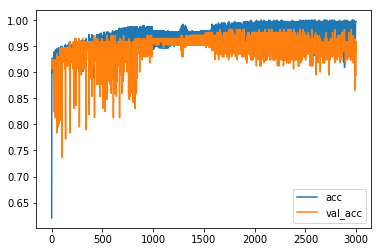

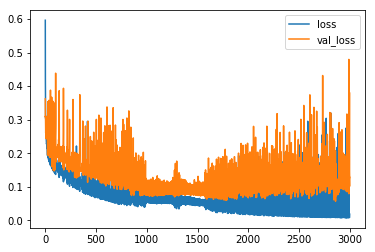

702


In [15]:
plt.plot(history01.history['acc'], label='acc')
plt.plot(history01.history['val_acc'], label='val_acc')
plt.legend()
plt.show()
plt.plot(history01.history['loss'], label='loss')
plt.plot(history01.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
count=0
for i in history01.history['acc']:
    if i>0.99:
        count+=1
print(count)

In [14]:
model2.save('model2.h5')
print("Avg Training acc: ", np.mean(history01.history['acc']),"\nAvg Testing acc: ", np.mean(history01.history['val_acc']))

Avg Training acc:  0.973061138927 
Avg Testing acc:  0.944076021206


### Using 3 Sigmoid Layers and RMSprop optimizer

In [137]:
model3 = Sequential()
model3.add(Dense(500, activation='sigmoid', use_bias=True, input_shape=(30,)))
model3.add(Dense(500, activation='sigmoid', use_bias=True))
model3.add(Dense(1, activation='sigmoid'))
keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history0 = model3.fit(mat[:,1:],mat[:,0], validation_split=0.3,shuffle=False,epochs=3000, batch_size=128)

Train on 398 samples, validate on 171 samples
Epoch 1/3000
398/398 [==============================] - 1s 2ms/step - loss: 1.1584 - acc: 0.5000 - val_loss: 0.4303 - val_acc: 0.7895
Epoch 2/3000
398/398 [==============================] - 0s 171us/step - loss: 0.6957 - acc: 0.5528 - val_loss: 0.3055 - val_acc: 0.9181
Epoch 3/3000
398/398 [==============================] - 0s 138us/step - loss: 0.4759 - acc: 0.7613 - val_loss: 0.2793 - val_acc: 0.9123
Epoch 4/3000
398/398 [==============================] - 0s 156us/step - loss: 0.3167 - acc: 0.8945 - val_loss: 0.2484 - val_acc: 0.9181
Epoch 5/3000
398/398 [==============================] - 0s 146us/step - loss: 0.3096 - acc: 0.8945 - val_loss: 0.2400 - val_acc: 0.9240
Epoch 6/3000
398/398 [==============================] - 0s 156us/step - loss: 0.2769 - acc: 0.9095 - val_loss: 0.2389 - val_acc: 0.9298
Epoch 7/3000
398/398 [==============================] - 0s 141us/step - loss: 0.2654 - acc: 0.9095 - val_loss: 0.2534 - val_acc: 0.9240
Epoc

Epoch 120/3000
398/398 [==============================] - 0s 141us/step - loss: 0.1358 - acc: 0.9422 - val_loss: 0.4124 - val_acc: 0.7427
Epoch 121/3000
398/398 [==============================] - 0s 141us/step - loss: 0.1668 - acc: 0.9296 - val_loss: 0.3110 - val_acc: 0.8655
Epoch 122/3000
398/398 [==============================] - 0s 138us/step - loss: 0.1524 - acc: 0.9221 - val_loss: 0.1664 - val_acc: 0.9357
Epoch 123/3000
398/398 [==============================] - 0s 184us/step - loss: 0.2677 - acc: 0.8869 - val_loss: 0.3135 - val_acc: 0.8480
Epoch 124/3000
398/398 [==============================] - 0s 189us/step - loss: 0.1305 - acc: 0.9472 - val_loss: 0.3122 - val_acc: 0.8363
Epoch 125/3000
398/398 [==============================] - 0s 173us/step - loss: 0.1233 - acc: 0.9472 - val_loss: 0.4011 - val_acc: 0.7953
Epoch 126/3000
398/398 [==============================] - 0s 181us/step - loss: 0.1684 - acc: 0.9372 - val_loss: 0.3002 - val_acc: 0.8713
Epoch 127/3000
398/398 [==========

398/398 [==============================] - 0s 194us/step - loss: 0.1412 - acc: 0.9447 - val_loss: 0.2018 - val_acc: 0.9181
Epoch 239/3000
398/398 [==============================] - 0s 148us/step - loss: 0.1395 - acc: 0.9472 - val_loss: 0.2031 - val_acc: 0.9181
Epoch 240/3000
398/398 [==============================] - 0s 143us/step - loss: 0.1432 - acc: 0.9447 - val_loss: 0.1939 - val_acc: 0.9240
Epoch 241/3000
398/398 [==============================] - 0s 138us/step - loss: 0.1505 - acc: 0.9422 - val_loss: 0.2100 - val_acc: 0.9123
Epoch 242/3000
398/398 [==============================] - 0s 148us/step - loss: 0.1423 - acc: 0.9447 - val_loss: 0.2153 - val_acc: 0.9006
Epoch 243/3000
398/398 [==============================] - 0s 146us/step - loss: 0.1269 - acc: 0.9497 - val_loss: 0.1989 - val_acc: 0.9181
Epoch 244/3000
398/398 [==============================] - 0s 163us/step - loss: 0.1613 - acc: 0.9422 - val_loss: 0.1909 - val_acc: 0.9240
Epoch 245/3000
398/398 [=========================

Epoch 356/3000
398/398 [==============================] - 0s 165us/step - loss: 0.1203 - acc: 0.9472 - val_loss: 0.2216 - val_acc: 0.8889
Epoch 357/3000
398/398 [==============================] - 0s 249us/step - loss: 0.0868 - acc: 0.9548 - val_loss: 0.3561 - val_acc: 0.8129
Epoch 358/3000
398/398 [==============================] - 0s 194us/step - loss: 0.1469 - acc: 0.9422 - val_loss: 0.2776 - val_acc: 0.8421
Epoch 359/3000
398/398 [==============================] - 0s 195us/step - loss: 0.1171 - acc: 0.9422 - val_loss: 0.1779 - val_acc: 0.9240
Epoch 360/3000
398/398 [==============================] - 0s 171us/step - loss: 0.1111 - acc: 0.9523 - val_loss: 0.1734 - val_acc: 0.9357
Epoch 361/3000
398/398 [==============================] - 0s 194us/step - loss: 0.1531 - acc: 0.9422 - val_loss: 0.1715 - val_acc: 0.9357
Epoch 362/3000
398/398 [==============================] - 0s 182us/step - loss: 0.1133 - acc: 0.9523 - val_loss: 0.1943 - val_acc: 0.8947
Epoch 363/3000
398/398 [==========

398/398 [==============================] - 0s 199us/step - loss: 0.0878 - acc: 0.9573 - val_loss: 0.1550 - val_acc: 0.9357
Epoch 475/3000
398/398 [==============================] - 0s 173us/step - loss: 0.0836 - acc: 0.9548 - val_loss: 0.1773 - val_acc: 0.9240
Epoch 476/3000
398/398 [==============================] - 0s 150us/step - loss: 0.0814 - acc: 0.9573 - val_loss: 0.1872 - val_acc: 0.9006
Epoch 477/3000
398/398 [==============================] - 0s 156us/step - loss: 0.0912 - acc: 0.9523 - val_loss: 0.1433 - val_acc: 0.9532
Epoch 478/3000
398/398 [==============================] - 0s 151us/step - loss: 0.1925 - acc: 0.9296 - val_loss: 0.1995 - val_acc: 0.9415
Epoch 479/3000
398/398 [==============================] - 0s 177us/step - loss: 0.1011 - acc: 0.9548 - val_loss: 0.1565 - val_acc: 0.9298
Epoch 480/3000
398/398 [==============================] - 0s 151us/step - loss: 0.0758 - acc: 0.9648 - val_loss: 0.1714 - val_acc: 0.9181
Epoch 481/3000
398/398 [=========================

398/398 [==============================] - 0s 180us/step - loss: 0.0718 - acc: 0.9623 - val_loss: 0.1702 - val_acc: 0.9240
Epoch 593/3000
398/398 [==============================] - 0s 221us/step - loss: 0.0646 - acc: 0.9698 - val_loss: 0.2073 - val_acc: 0.9064
Epoch 594/3000
398/398 [==============================] - 0s 181us/step - loss: 0.1306 - acc: 0.9548 - val_loss: 0.3141 - val_acc: 0.8655
Epoch 595/3000
398/398 [==============================] - 0s 148us/step - loss: 0.1245 - acc: 0.9347 - val_loss: 0.1229 - val_acc: 0.9532
Epoch 596/3000
398/398 [==============================] - 0s 175us/step - loss: 0.0733 - acc: 0.9673 - val_loss: 0.1537 - val_acc: 0.9298
Epoch 597/3000
398/398 [==============================] - 0s 153us/step - loss: 0.0641 - acc: 0.9673 - val_loss: 0.1781 - val_acc: 0.9240
Epoch 598/3000
398/398 [==============================] - 0s 161us/step - loss: 0.0596 - acc: 0.9724 - val_loss: 0.2139 - val_acc: 0.9064
Epoch 599/3000
398/398 [=========================

398/398 [==============================] - 0s 173us/step - loss: 0.1308 - acc: 0.9472 - val_loss: 0.1373 - val_acc: 0.9532
Epoch 711/3000
398/398 [==============================] - 0s 132us/step - loss: 0.2644 - acc: 0.9070 - val_loss: 0.1069 - val_acc: 0.9532
Epoch 712/3000
398/398 [==============================] - 0s 105us/step - loss: 0.0877 - acc: 0.9598 - val_loss: 0.1165 - val_acc: 0.9649
Epoch 713/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0720 - acc: 0.9749 - val_loss: 0.1071 - val_acc: 0.9649
Epoch 714/3000
398/398 [==============================] - 0s 100us/step - loss: 0.0807 - acc: 0.9573 - val_loss: 0.1312 - val_acc: 0.9532
Epoch 715/3000
398/398 [==============================] - 0s 166us/step - loss: 0.0586 - acc: 0.9774 - val_loss: 0.1179 - val_acc: 0.9474
Epoch 716/3000
398/398 [==============================] - 0s 139us/step - loss: 0.0940 - acc: 0.9598 - val_loss: 0.1549 - val_acc: 0.9474
Epoch 717/3000
398/398 [=========================

398/398 [==============================] - 0s 166us/step - loss: 0.0580 - acc: 0.9673 - val_loss: 0.1440 - val_acc: 0.9298
Epoch 829/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0435 - acc: 0.9849 - val_loss: 0.1274 - val_acc: 0.9474
Epoch 830/3000
398/398 [==============================] - 0s 146us/step - loss: 0.0959 - acc: 0.9598 - val_loss: 0.1323 - val_acc: 0.9532
Epoch 831/3000
398/398 [==============================] - 0s 151us/step - loss: 0.1076 - acc: 0.9497 - val_loss: 0.1404 - val_acc: 0.9415
Epoch 832/3000
398/398 [==============================] - 0s 146us/step - loss: 0.0497 - acc: 0.9849 - val_loss: 0.0936 - val_acc: 0.9532
Epoch 833/3000
398/398 [==============================] - 0s 146us/step - loss: 0.1457 - acc: 0.9447 - val_loss: 0.1665 - val_acc: 0.9357
Epoch 834/3000
398/398 [==============================] - 0s 148us/step - loss: 0.0657 - acc: 0.9774 - val_loss: 0.0855 - val_acc: 0.9649
Epoch 835/3000
398/398 [=========================

398/398 [==============================] - 0s 141us/step - loss: 0.0695 - acc: 0.9673 - val_loss: 0.1015 - val_acc: 0.9474
Epoch 947/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0558 - acc: 0.9724 - val_loss: 0.1293 - val_acc: 0.9415
Epoch 948/3000
398/398 [==============================] - 0s 138us/step - loss: 0.0447 - acc: 0.9874 - val_loss: 0.1112 - val_acc: 0.9532
Epoch 949/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0452 - acc: 0.9824 - val_loss: 0.1132 - val_acc: 0.9415
Epoch 950/3000
398/398 [==============================] - 0s 138us/step - loss: 0.2365 - acc: 0.9296 - val_loss: 0.1635 - val_acc: 0.9357
Epoch 951/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0777 - acc: 0.9724 - val_loss: 0.0801 - val_acc: 0.9591
Epoch 952/3000
398/398 [==============================] - 0s 136us/step - loss: 0.0847 - acc: 0.9523 - val_loss: 0.0920 - val_acc: 0.9532
Epoch 953/3000
398/398 [=========================

398/398 [==============================] - 0s 138us/step - loss: 0.0703 - acc: 0.9673 - val_loss: 0.0777 - val_acc: 0.9591
Epoch 1065/3000
398/398 [==============================] - 0s 136us/step - loss: 0.0661 - acc: 0.9698 - val_loss: 0.0943 - val_acc: 0.9532
Epoch 1066/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0481 - acc: 0.9799 - val_loss: 0.1172 - val_acc: 0.9532
Epoch 1067/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0419 - acc: 0.9824 - val_loss: 0.1584 - val_acc: 0.9357
Epoch 1068/3000
398/398 [==============================] - 0s 148us/step - loss: 0.1911 - acc: 0.9548 - val_loss: 0.1446 - val_acc: 0.9532
Epoch 1069/3000
398/398 [==============================] - 0s 148us/step - loss: 0.0808 - acc: 0.9623 - val_loss: 0.0975 - val_acc: 0.9474
Epoch 1070/3000
398/398 [==============================] - 0s 148us/step - loss: 0.0517 - acc: 0.9824 - val_loss: 0.0945 - val_acc: 0.9591
Epoch 1071/3000
398/398 [==================

398/398 [==============================] - 0s 141us/step - loss: 0.2637 - acc: 0.9322 - val_loss: 0.2173 - val_acc: 0.9240
Epoch 1124/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0752 - acc: 0.9698 - val_loss: 0.0840 - val_acc: 0.9591
Epoch 1125/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0573 - acc: 0.9749 - val_loss: 0.0855 - val_acc: 0.9591
Epoch 1126/3000
398/398 [==============================] - 0s 148us/step - loss: 0.0559 - acc: 0.9749 - val_loss: 0.0871 - val_acc: 0.9591
Epoch 1127/3000
398/398 [==============================] - 0s 146us/step - loss: 0.0435 - acc: 0.9849 - val_loss: 0.0944 - val_acc: 0.9591
Epoch 1128/3000
398/398 [==============================] - 0s 146us/step - loss: 0.0628 - acc: 0.9698 - val_loss: 0.1378 - val_acc: 0.9474
Epoch 1129/3000
398/398 [==============================] - 0s 146us/step - loss: 0.0841 - acc: 0.9648 - val_loss: 0.1951 - val_acc: 0.9006
Epoch 1130/3000
398/398 [==================

398/398 [==============================] - 0s 141us/step - loss: 0.1058 - acc: 0.9497 - val_loss: 0.1264 - val_acc: 0.9474
Epoch 1183/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0576 - acc: 0.9774 - val_loss: 0.0772 - val_acc: 0.9649
Epoch 1184/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0700 - acc: 0.9573 - val_loss: 0.0975 - val_acc: 0.9591
Epoch 1185/3000
398/398 [==============================] - 0s 138us/step - loss: 0.0431 - acc: 0.9824 - val_loss: 0.0868 - val_acc: 0.9591
Epoch 1186/3000
398/398 [==============================] - 0s 138us/step - loss: 0.1913 - acc: 0.9372 - val_loss: 0.1861 - val_acc: 0.9181
Epoch 1187/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0823 - acc: 0.9548 - val_loss: 0.0783 - val_acc: 0.9649
Epoch 1188/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0571 - acc: 0.9749 - val_loss: 0.0871 - val_acc: 0.9532
Epoch 1189/3000
398/398 [==================

398/398 [==============================] - 0s 141us/step - loss: 0.0562 - acc: 0.9623 - val_loss: 0.1026 - val_acc: 0.9649
Epoch 1242/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0513 - acc: 0.9824 - val_loss: 0.1245 - val_acc: 0.9474
Epoch 1243/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0667 - acc: 0.9698 - val_loss: 0.1041 - val_acc: 0.9708
Epoch 1244/3000
398/398 [==============================] - 0s 148us/step - loss: 0.1606 - acc: 0.9271 - val_loss: 0.0985 - val_acc: 0.9649
Epoch 1245/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0587 - acc: 0.9749 - val_loss: 0.0821 - val_acc: 0.9591
Epoch 1246/3000
398/398 [==============================] - 0s 138us/step - loss: 0.0608 - acc: 0.9698 - val_loss: 0.0863 - val_acc: 0.9474
Epoch 1247/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0410 - acc: 0.9824 - val_loss: 0.0826 - val_acc: 0.9532
Epoch 1248/3000
398/398 [==================

398/398 [==============================] - 0s 141us/step - loss: 0.0468 - acc: 0.9874 - val_loss: 0.0839 - val_acc: 0.9591
Epoch 1301/3000
398/398 [==============================] - 0s 141us/step - loss: 0.1274 - acc: 0.9422 - val_loss: 0.1078 - val_acc: 0.9532
Epoch 1302/3000
398/398 [==============================] - 0s 138us/step - loss: 0.0556 - acc: 0.9774 - val_loss: 0.0822 - val_acc: 0.9591
Epoch 1303/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0892 - acc: 0.9497 - val_loss: 0.0931 - val_acc: 0.9649
Epoch 1304/3000
398/398 [==============================] - 0s 146us/step - loss: 0.0498 - acc: 0.9824 - val_loss: 0.0814 - val_acc: 0.9591
Epoch 1305/3000
398/398 [==============================] - 0s 148us/step - loss: 0.1579 - acc: 0.9296 - val_loss: 0.1379 - val_acc: 0.9532
Epoch 1306/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0632 - acc: 0.9749 - val_loss: 0.0766 - val_acc: 0.9591
Epoch 1307/3000
398/398 [==================

398/398 [==============================] - 0s 148us/step - loss: 0.0637 - acc: 0.9724 - val_loss: 0.0749 - val_acc: 0.9532
Epoch 1360/3000
398/398 [==============================] - 0s 146us/step - loss: 0.0462 - acc: 0.9799 - val_loss: 0.0811 - val_acc: 0.9591
Epoch 1361/3000
398/398 [==============================] - 0s 146us/step - loss: 0.0590 - acc: 0.9623 - val_loss: 0.0924 - val_acc: 0.9708
Epoch 1362/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0495 - acc: 0.9799 - val_loss: 0.1756 - val_acc: 0.9298
Epoch 1363/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0774 - acc: 0.9698 - val_loss: 0.0918 - val_acc: 0.9591
Epoch 1364/3000
398/398 [==============================] - 0s 166us/step - loss: 0.0713 - acc: 0.9623 - val_loss: 0.1151 - val_acc: 0.9474
Epoch 1365/3000
398/398 [==============================] - 0s 161us/step - loss: 0.0689 - acc: 0.9698 - val_loss: 0.1069 - val_acc: 0.9474
Epoch 1366/3000
398/398 [==================

398/398 [==============================] - 0s 138us/step - loss: 0.0627 - acc: 0.9799 - val_loss: 0.0837 - val_acc: 0.9532
Epoch 1419/3000
398/398 [==============================] - 0s 146us/step - loss: 0.0681 - acc: 0.9623 - val_loss: 0.1208 - val_acc: 0.9415
Epoch 1420/3000
398/398 [==============================] - 0s 148us/step - loss: 0.0680 - acc: 0.9774 - val_loss: 0.1029 - val_acc: 0.9591
Epoch 1421/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0544 - acc: 0.9749 - val_loss: 0.0843 - val_acc: 0.9649
Epoch 1422/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0557 - acc: 0.9698 - val_loss: 0.1751 - val_acc: 0.9298
Epoch 1423/3000
398/398 [==============================] - 0s 143us/step - loss: 0.1629 - acc: 0.9523 - val_loss: 0.2360 - val_acc: 0.8947
Epoch 1424/3000
398/398 [==============================] - 0s 151us/step - loss: 0.0677 - acc: 0.9724 - val_loss: 0.0794 - val_acc: 0.9591
Epoch 1425/3000
398/398 [==================

Epoch 1536/3000
398/398 [==============================] - 0s 138us/step - loss: 0.0383 - acc: 0.9849 - val_loss: 0.0908 - val_acc: 0.9532
Epoch 1537/3000
398/398 [==============================] - 0s 138us/step - loss: 0.0606 - acc: 0.9598 - val_loss: 0.1234 - val_acc: 0.9474
Epoch 1538/3000
398/398 [==============================] - 0s 138us/step - loss: 0.0548 - acc: 0.9774 - val_loss: 0.0801 - val_acc: 0.9649
Epoch 1539/3000
398/398 [==============================] - 0s 151us/step - loss: 0.1483 - acc: 0.9347 - val_loss: 0.1256 - val_acc: 0.9415
Epoch 1540/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0533 - acc: 0.9724 - val_loss: 0.0721 - val_acc: 0.9532
Epoch 1541/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0392 - acc: 0.9824 - val_loss: 0.0766 - val_acc: 0.9591
Epoch 1542/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0481 - acc: 0.9698 - val_loss: 0.1038 - val_acc: 0.9591
Epoch 1543/3000
398/398 [==

398/398 [==============================] - 0s 143us/step - loss: 0.0365 - acc: 0.9899 - val_loss: 0.0784 - val_acc: 0.9591
Epoch 1654/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0330 - acc: 0.9925 - val_loss: 0.0858 - val_acc: 0.9649
Epoch 1655/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0324 - acc: 0.9849 - val_loss: 0.1617 - val_acc: 0.9415
Epoch 1656/3000
398/398 [==============================] - 0s 156us/step - loss: 0.2359 - acc: 0.9497 - val_loss: 0.2275 - val_acc: 0.9357
Epoch 1657/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0616 - acc: 0.9774 - val_loss: 0.0897 - val_acc: 0.9591
Epoch 1658/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0374 - acc: 0.9874 - val_loss: 0.0763 - val_acc: 0.9649
Epoch 1659/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0346 - acc: 0.9874 - val_loss: 0.0834 - val_acc: 0.9649
Epoch 1660/3000
398/398 [==================

398/398 [==============================] - 0s 146us/step - loss: 0.0317 - acc: 0.9925 - val_loss: 0.0835 - val_acc: 0.9649
Epoch 1713/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0357 - acc: 0.9849 - val_loss: 0.1336 - val_acc: 0.9474
Epoch 1714/3000
398/398 [==============================] - 0s 151us/step - loss: 0.0597 - acc: 0.9799 - val_loss: 0.0888 - val_acc: 0.9591
Epoch 1715/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0814 - acc: 0.9623 - val_loss: 0.1510 - val_acc: 0.9415
Epoch 1716/3000
398/398 [==============================] - 0s 158us/step - loss: 0.1100 - acc: 0.9497 - val_loss: 0.0982 - val_acc: 0.9591
Epoch 1717/3000
398/398 [==============================] - 0s 151us/step - loss: 0.0427 - acc: 0.9849 - val_loss: 0.0919 - val_acc: 0.9591
Epoch 1718/3000
398/398 [==============================] - 0s 158us/step - loss: 0.0305 - acc: 0.9925 - val_loss: 0.0815 - val_acc: 0.9591
Epoch 1719/3000
398/398 [==================

Epoch 1771/3000
398/398 [==============================] - 0s 138us/step - loss: 0.2599 - acc: 0.9020 - val_loss: 0.1148 - val_acc: 0.9649
Epoch 1772/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0510 - acc: 0.9824 - val_loss: 0.0938 - val_acc: 0.9532
Epoch 1773/3000
398/398 [==============================] - 0s 146us/step - loss: 0.0391 - acc: 0.9849 - val_loss: 0.0916 - val_acc: 0.9591
Epoch 1774/3000
398/398 [==============================] - 0s 151us/step - loss: 0.0322 - acc: 0.9899 - val_loss: 0.0907 - val_acc: 0.9591
Epoch 1775/3000
398/398 [==============================] - 0s 151us/step - loss: 0.0275 - acc: 0.9899 - val_loss: 0.0896 - val_acc: 0.9591
Epoch 1776/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0300 - acc: 0.9874 - val_loss: 0.1775 - val_acc: 0.9357
Epoch 1777/3000
398/398 [==============================] - 0s 146us/step - loss: 0.2144 - acc: 0.9497 - val_loss: 0.1585 - val_acc: 0.9357
Epoch 1778/3000
398/398 [==

Epoch 1830/3000
398/398 [==============================] - 0s 138us/step - loss: 0.0725 - acc: 0.9698 - val_loss: 0.0763 - val_acc: 0.9591
Epoch 1831/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0656 - acc: 0.9673 - val_loss: 0.1555 - val_acc: 0.9357
Epoch 1832/3000
398/398 [==============================] - 0s 158us/step - loss: 0.0877 - acc: 0.9623 - val_loss: 0.2338 - val_acc: 0.9240
Epoch 1833/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0664 - acc: 0.9799 - val_loss: 0.0787 - val_acc: 0.9591
Epoch 1834/3000
398/398 [==============================] - 0s 146us/step - loss: 0.0316 - acc: 0.9925 - val_loss: 0.0724 - val_acc: 0.9708
Epoch 1835/3000
398/398 [==============================] - 0s 138us/step - loss: 0.0402 - acc: 0.9824 - val_loss: 0.1634 - val_acc: 0.9357
Epoch 1836/3000
398/398 [==============================] - 0s 168us/step - loss: 0.1729 - acc: 0.9497 - val_loss: 0.1383 - val_acc: 0.9474
Epoch 1837/3000
398/398 [==

Epoch 1889/3000
398/398 [==============================] - 0s 146us/step - loss: 0.1301 - acc: 0.9573 - val_loss: 0.0914 - val_acc: 0.9591
Epoch 1890/3000
398/398 [==============================] - 0s 153us/step - loss: 0.0395 - acc: 0.9874 - val_loss: 0.0773 - val_acc: 0.9708
Epoch 1891/3000
398/398 [==============================] - 0s 148us/step - loss: 0.0274 - acc: 0.9899 - val_loss: 0.0721 - val_acc: 0.9591
Epoch 1892/3000
398/398 [==============================] - 0s 151us/step - loss: 0.0244 - acc: 0.9899 - val_loss: 0.0793 - val_acc: 0.9591
Epoch 1893/3000
398/398 [==============================] - 0s 148us/step - loss: 0.0285 - acc: 0.9874 - val_loss: 0.1692 - val_acc: 0.9415
Epoch 1894/3000
398/398 [==============================] - 0s 148us/step - loss: 0.1174 - acc: 0.9698 - val_loss: 0.2699 - val_acc: 0.9123
Epoch 1895/3000
398/398 [==============================] - 0s 153us/step - loss: 0.0713 - acc: 0.9749 - val_loss: 0.0726 - val_acc: 0.9532
Epoch 1896/3000
398/398 [==

Epoch 1948/3000
398/398 [==============================] - 0s 163us/step - loss: 0.2858 - acc: 0.9296 - val_loss: 0.1830 - val_acc: 0.9357
Epoch 1949/3000
398/398 [==============================] - 0s 163us/step - loss: 0.0380 - acc: 0.9849 - val_loss: 0.0898 - val_acc: 0.9591
Epoch 1950/3000
398/398 [==============================] - 0s 151us/step - loss: 0.0330 - acc: 0.9899 - val_loss: 0.0704 - val_acc: 0.9532
Epoch 1951/3000
398/398 [==============================] - 0s 153us/step - loss: 0.0290 - acc: 0.9874 - val_loss: 0.0689 - val_acc: 0.9591
Epoch 1952/3000
398/398 [==============================] - 0s 146us/step - loss: 0.0276 - acc: 0.9925 - val_loss: 0.0798 - val_acc: 0.9649
Epoch 1953/3000
398/398 [==============================] - 0s 146us/step - loss: 0.0237 - acc: 0.9899 - val_loss: 0.0715 - val_acc: 0.9649
Epoch 1954/3000
398/398 [==============================] - 0s 148us/step - loss: 0.2007 - acc: 0.9372 - val_loss: 0.1798 - val_acc: 0.9357
Epoch 1955/3000
398/398 [==

Epoch 2007/3000
398/398 [==============================] - 0s 138us/step - loss: 0.0308 - acc: 0.9899 - val_loss: 0.0800 - val_acc: 0.9766
Epoch 2008/3000
398/398 [==============================] - 0s 138us/step - loss: 0.2348 - acc: 0.9121 - val_loss: 0.1107 - val_acc: 0.9649
Epoch 2009/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0413 - acc: 0.9849 - val_loss: 0.0815 - val_acc: 0.9532
Epoch 2010/3000
398/398 [==============================] - 0s 136us/step - loss: 0.0335 - acc: 0.9874 - val_loss: 0.0786 - val_acc: 0.9591
Epoch 2011/3000
398/398 [==============================] - 0s 138us/step - loss: 0.0273 - acc: 0.9950 - val_loss: 0.0778 - val_acc: 0.9591
Epoch 2012/3000
398/398 [==============================] - 0s 136us/step - loss: 0.0231 - acc: 0.9925 - val_loss: 0.0904 - val_acc: 0.9591
Epoch 2013/3000
398/398 [==============================] - 0s 138us/step - loss: 0.0185 - acc: 0.9950 - val_loss: 0.0763 - val_acc: 0.9649
Epoch 2014/3000
398/398 [==

Epoch 2066/3000
398/398 [==============================] - 0s 146us/step - loss: 0.0547 - acc: 0.9774 - val_loss: 0.0689 - val_acc: 0.9649
Epoch 2067/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0253 - acc: 0.9925 - val_loss: 0.0877 - val_acc: 0.9649
Epoch 2068/3000
398/398 [==============================] - 0s 138us/step - loss: 0.0236 - acc: 0.9950 - val_loss: 0.0652 - val_acc: 0.9708
Epoch 2069/3000
398/398 [==============================] - 0s 143us/step - loss: 0.1303 - acc: 0.9548 - val_loss: 0.2147 - val_acc: 0.9240
Epoch 2070/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0811 - acc: 0.9648 - val_loss: 0.0631 - val_acc: 0.9708
Epoch 2071/3000
398/398 [==============================] - 0s 138us/step - loss: 0.0310 - acc: 0.9874 - val_loss: 0.0905 - val_acc: 0.9591
Epoch 2072/3000
398/398 [==============================] - 0s 138us/step - loss: 0.0259 - acc: 0.9950 - val_loss: 0.0641 - val_acc: 0.9708
Epoch 2073/3000
398/398 [==

Epoch 2125/3000
398/398 [==============================] - 0s 151us/step - loss: 0.0839 - acc: 0.9598 - val_loss: 0.1156 - val_acc: 0.9532
Epoch 2126/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0408 - acc: 0.9799 - val_loss: 0.0901 - val_acc: 0.9649
Epoch 2127/3000
398/398 [==============================] - 0s 136us/step - loss: 0.0265 - acc: 0.9925 - val_loss: 0.0835 - val_acc: 0.9591
Epoch 2128/3000
398/398 [==============================] - 0s 153us/step - loss: 0.0248 - acc: 0.9950 - val_loss: 0.0668 - val_acc: 0.9766
Epoch 2129/3000
398/398 [==============================] - 0s 173us/step - loss: 0.2271 - acc: 0.9196 - val_loss: 0.1280 - val_acc: 0.9532
Epoch 2130/3000
398/398 [==============================] - ETA: 0s - loss: 0.0194 - acc: 1.000 - 0s 163us/step - loss: 0.0386 - acc: 0.9849 - val_loss: 0.0813 - val_acc: 0.9591
Epoch 2131/3000
398/398 [==============================] - 0s 148us/step - loss: 0.0312 - acc: 0.9925 - val_loss: 0.0742 - val_a

398/398 [==============================] - 0s 151us/step - loss: 0.0240 - acc: 0.9950 - val_loss: 0.0790 - val_acc: 0.9649
Epoch 2243/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0219 - acc: 0.9950 - val_loss: 0.0765 - val_acc: 0.9766
Epoch 2244/3000
398/398 [==============================] - 0s 138us/step - loss: 0.1682 - acc: 0.9422 - val_loss: 0.1797 - val_acc: 0.9298
Epoch 2245/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0451 - acc: 0.9749 - val_loss: 0.0830 - val_acc: 0.9591
Epoch 2246/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0257 - acc: 0.9950 - val_loss: 0.0827 - val_acc: 0.9649
Epoch 2247/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0206 - acc: 0.9975 - val_loss: 0.0828 - val_acc: 0.9591
Epoch 2248/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0178 - acc: 0.9950 - val_loss: 0.1091 - val_acc: 0.9649
Epoch 2249/3000
398/398 [==================

398/398 [==============================] - 0s 138us/step - loss: 0.0482 - acc: 0.9824 - val_loss: 0.0769 - val_acc: 0.9708
Epoch 2302/3000
398/398 [==============================] - 0s 148us/step - loss: 0.0244 - acc: 0.9975 - val_loss: 0.0753 - val_acc: 0.9649
Epoch 2303/3000
398/398 [==============================] - 0s 146us/step - loss: 0.0208 - acc: 0.9975 - val_loss: 0.0669 - val_acc: 0.9532
Epoch 2304/3000
398/398 [==============================] - 0s 151us/step - loss: 0.0206 - acc: 0.9975 - val_loss: 0.1147 - val_acc: 0.9532
Epoch 2305/3000
398/398 [==============================] - 0s 168us/step - loss: 0.0860 - acc: 0.9698 - val_loss: 0.1943 - val_acc: 0.9415
Epoch 2306/3000
398/398 [==============================] - 0s 161us/step - loss: 0.0707 - acc: 0.9698 - val_loss: 0.0759 - val_acc: 0.9591
Epoch 2307/3000
398/398 [==============================] - 0s 158us/step - loss: 0.0243 - acc: 0.9950 - val_loss: 0.0766 - val_acc: 0.9766
Epoch 2308/3000
398/398 [==================

Epoch 2360/3000
398/398 [==============================] - 0s 138us/step - loss: 0.0486 - acc: 0.9799 - val_loss: 0.3258 - val_acc: 0.9181
Epoch 2361/3000
398/398 [==============================] - 0s 141us/step - loss: 0.2849 - acc: 0.9296 - val_loss: 0.1339 - val_acc: 0.9591
Epoch 2362/3000
398/398 [==============================] - 0s 146us/step - loss: 0.0331 - acc: 0.9899 - val_loss: 0.0984 - val_acc: 0.9649
Epoch 2363/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0222 - acc: 0.9950 - val_loss: 0.0921 - val_acc: 0.9649
Epoch 2364/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0203 - acc: 0.9975 - val_loss: 0.0840 - val_acc: 0.9649
Epoch 2365/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0186 - acc: 0.9975 - val_loss: 0.0843 - val_acc: 0.9649
Epoch 2366/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0174 - acc: 0.9950 - val_loss: 0.0957 - val_acc: 0.9649
Epoch 2367/3000
398/398 [==

398/398 [==============================] - 0s 161us/step - loss: 0.0169 - acc: 0.9975 - val_loss: 0.0837 - val_acc: 0.9766
Epoch 2478/3000
398/398 [==============================] - 0s 148us/step - loss: 0.1667 - acc: 0.9472 - val_loss: 0.2174 - val_acc: 0.9357
Epoch 2479/3000
398/398 [==============================] - 0s 151us/step - loss: 0.0930 - acc: 0.9548 - val_loss: 0.1000 - val_acc: 0.9532
Epoch 2480/3000
398/398 [==============================] - 0s 173us/step - loss: 0.0252 - acc: 0.9925 - val_loss: 0.0889 - val_acc: 0.9532
Epoch 2481/3000
398/398 [==============================] - 0s 173us/step - loss: 0.0171 - acc: 0.9975 - val_loss: 0.0809 - val_acc: 0.9649
Epoch 2482/3000
398/398 [==============================] - 0s 171us/step - loss: 0.0168 - acc: 0.9975 - val_loss: 0.0769 - val_acc: 0.9649
Epoch 2483/3000
398/398 [==============================] - 0s 184us/step - loss: 0.0213 - acc: 0.9925 - val_loss: 0.2116 - val_acc: 0.9298
Epoch 2484/3000
398/398 [==================

398/398 [==============================] - 0s 141us/step - loss: 0.4573 - acc: 0.8869 - val_loss: 0.1230 - val_acc: 0.9591
Epoch 2595/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0498 - acc: 0.9849 - val_loss: 0.1078 - val_acc: 0.9532
Epoch 2596/3000
398/398 [==============================] - 0s 146us/step - loss: 0.0204 - acc: 0.9950 - val_loss: 0.1079 - val_acc: 0.9591
Epoch 2597/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0162 - acc: 0.9975 - val_loss: 0.1065 - val_acc: 0.9591
Epoch 2598/3000
398/398 [==============================] - 0s 141us/step - loss: 0.0154 - acc: 0.9975 - val_loss: 0.0983 - val_acc: 0.9649
Epoch 2599/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0151 - acc: 0.9975 - val_loss: 0.0904 - val_acc: 0.9591
Epoch 2600/3000
398/398 [==============================] - 0s 138us/step - loss: 0.0136 - acc: 0.9975 - val_loss: 0.0887 - val_acc: 0.9649
Epoch 2601/3000
398/398 [==================

398/398 [==============================] - 0s 146us/step - loss: 0.0431 - acc: 0.9849 - val_loss: 0.0835 - val_acc: 0.9649
Epoch 2654/3000
398/398 [==============================] - 0s 136us/step - loss: 0.0181 - acc: 0.9950 - val_loss: 0.0804 - val_acc: 0.9649
Epoch 2655/3000
398/398 [==============================] - 0s 138us/step - loss: 0.0153 - acc: 0.9975 - val_loss: 0.0794 - val_acc: 0.9708
Epoch 2656/3000
398/398 [==============================] - 0s 138us/step - loss: 0.0153 - acc: 0.9975 - val_loss: 0.0763 - val_acc: 0.9649
Epoch 2657/3000
398/398 [==============================] - 0s 143us/step - loss: 0.0391 - acc: 0.9824 - val_loss: 0.2966 - val_acc: 0.9240
Epoch 2658/3000
398/398 [==============================] - 0s 143us/step - loss: 0.2781 - acc: 0.9271 - val_loss: 0.2057 - val_acc: 0.9240
Epoch 2659/3000
398/398 [==============================] - 0s 156us/step - loss: 0.0308 - acc: 0.9874 - val_loss: 0.1052 - val_acc: 0.9649
Epoch 2660/3000
398/398 [==================

Epoch 2771/3000
398/398 [==============================] - 0s 158us/step - loss: 0.0292 - acc: 0.9899 - val_loss: 0.3987 - val_acc: 0.9181
Epoch 2772/3000
398/398 [==============================] - 0s 168us/step - loss: 0.3649 - acc: 0.9271 - val_loss: 0.3672 - val_acc: 0.8772
Epoch 2773/3000
398/398 [==============================] - 0s 186us/step - loss: 0.0608 - acc: 0.9774 - val_loss: 0.0894 - val_acc: 0.9649
Epoch 2774/3000
398/398 [==============================] - 0s 168us/step - loss: 0.0197 - acc: 0.9925 - val_loss: 0.0843 - val_acc: 0.9591
Epoch 2775/3000
398/398 [==============================] - 0s 158us/step - loss: 0.0161 - acc: 0.9975 - val_loss: 0.0808 - val_acc: 0.9649
Epoch 2776/3000
398/398 [==============================] - 0s 153us/step - loss: 0.0141 - acc: 0.9975 - val_loss: 0.0783 - val_acc: 0.9708
Epoch 2777/3000
398/398 [==============================] - 0s 189us/step - loss: 0.0128 - acc: 0.9975 - val_loss: 0.0825 - val_acc: 0.9708
Epoch 2778/3000
398/398 [==

Epoch 2888/3000
398/398 [==============================] - 0s 181us/step - loss: 0.1075 - acc: 0.9698 - val_loss: 0.2177 - val_acc: 0.9474
Epoch 2889/3000
398/398 [==============================] - 0s 199us/step - loss: 0.0560 - acc: 0.9774 - val_loss: 0.1222 - val_acc: 0.9415
Epoch 2890/3000
398/398 [==============================] - 0s 214us/step - loss: 0.0163 - acc: 0.9975 - val_loss: 0.0849 - val_acc: 0.9591
Epoch 2891/3000
398/398 [==============================] - 0s 209us/step - loss: 0.0133 - acc: 0.9975 - val_loss: 0.0752 - val_acc: 0.9708
Epoch 2892/3000
398/398 [==============================] - 0s 194us/step - loss: 0.0132 - acc: 1.0000 - val_loss: 0.1332 - val_acc: 0.9357
Epoch 2893/3000
398/398 [==============================] - 0s 196us/step - loss: 0.0816 - acc: 0.9774 - val_loss: 0.1591 - val_acc: 0.9474
Epoch 2894/3000
398/398 [==============================] - 0s 244us/step - loss: 0.0420 - acc: 0.9749 - val_loss: 0.0782 - val_acc: 0.9591
Epoch 2895/3000
398/398 [==

In [142]:
score2 = model3.evaluate(mat[:398,1:],mat[:398,0], verbose=0, batch_size=128)
print('Train loss:', score2[0])
print('Train accuracy:', score2[1])

Train loss: 0.0216649695146
Train accuracy: 0.992462311558


In [143]:
score2 = model3.evaluate(mat[398:,1:],mat[398:,0], verbose=0, batch_size=128)
print('Validation loss:', score2[0])
print('Validation accuracy:', score2[1])

Validation loss: 0.0705424946629
Validation accuracy: 0.970760233918


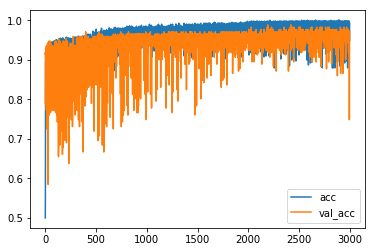

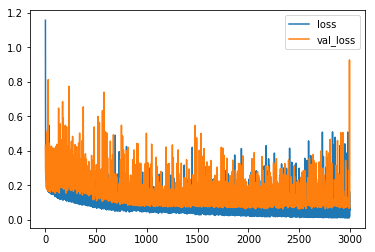

629


In [141]:
plt.plot(history0.history['acc'], label='acc')
plt.plot(history0.history['val_acc'], label='val_acc')
plt.legend()
plt.show()
plt.plot(history0.history['loss'], label='loss')
plt.plot(history0.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
count=0
for i in history0.history['acc']:
    if i>0.99:
        count+=1
print(count)

In [156]:
model3.save('model3.h5')
print("Avg Training acc: ", np.mean(history0.history['acc']),"\nAvg Testing acc: ", np.mean(history0.history['val_acc']))

Avg Training acc:  0.967718592823 
Avg Testing acc:  0.938077970685


### Using 4 Sigmoid Layers and RMSprop optimizer

In [91]:
model4 = Sequential()
model4.add(Dense(500, activation='sigmoid', use_bias=True, input_shape=(30,)))
model4.add(Dense(500, activation='sigmoid', use_bias=True))
model4.add(Dense(500, activation='sigmoid', use_bias=True))
model4.add(Dense(1, activation='sigmoid'))
keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history1 = model4.fit(mat[:,1:],mat[:,0], validation_split=0.3,shuffle=False,epochs=3000, batch_size=128)

Train on 398 samples, validate on 171 samples
Epoch 1/3000
398/398 [==============================] - 1s 3ms/step - loss: 1.2471 - acc: 0.5000 - val_loss: 0.5120 - val_acc: 0.7719
Epoch 2/3000
398/398 [==============================] - 0s 287us/step - loss: 0.7292 - acc: 0.5151 - val_loss: 0.4359 - val_acc: 0.7719
Epoch 3/3000
398/398 [==============================] - 0s 277us/step - loss: 0.6368 - acc: 0.5201 - val_loss: 0.3720 - val_acc: 0.9123
Epoch 4/3000
398/398 [==============================] - 0s 241us/step - loss: 0.5126 - acc: 0.7111 - val_loss: 0.3149 - val_acc: 0.9357
Epoch 5/3000
398/398 [==============================] - 0s 277us/step - loss: 0.4300 - acc: 0.8191 - val_loss: 0.2835 - val_acc: 0.9181
Epoch 6/3000
398/398 [==============================] - 0s 241us/step - loss: 0.3561 - acc: 0.8769 - val_loss: 0.2706 - val_acc: 0.9123
Epoch 7/3000
398/398 [==============================] - 0s 277us/step - loss: 0.3156 - acc: 0.8970 - val_loss: 0.2471 - val_acc: 0.9181
Epoc

398/398 [==============================] - 0s 264us/step - loss: 0.1645 - acc: 0.9397 - val_loss: 0.2080 - val_acc: 0.9240
Epoch 120/3000
398/398 [==============================] - 0s 241us/step - loss: 0.1631 - acc: 0.9397 - val_loss: 0.2019 - val_acc: 0.9240
Epoch 121/3000
398/398 [==============================] - 0s 259us/step - loss: 0.1726 - acc: 0.9296 - val_loss: 0.2138 - val_acc: 0.9123
Epoch 122/3000
398/398 [==============================] - 0s 236us/step - loss: 0.1581 - acc: 0.9372 - val_loss: 0.2265 - val_acc: 0.9006
Epoch 123/3000
398/398 [==============================] - 0s 259us/step - loss: 0.1554 - acc: 0.9447 - val_loss: 0.1887 - val_acc: 0.9298
Epoch 124/3000
398/398 [==============================] - 0s 236us/step - loss: 0.2044 - acc: 0.9246 - val_loss: 0.2470 - val_acc: 0.8947
Epoch 125/3000
398/398 [==============================] - 0s 254us/step - loss: 0.1394 - acc: 0.9497 - val_loss: 0.3071 - val_acc: 0.8246
Epoch 126/3000
398/398 [=========================

398/398 [==============================] - 0s 239us/step - loss: 0.2062 - acc: 0.9070 - val_loss: 0.2043 - val_acc: 0.9123
Epoch 238/3000
398/398 [==============================] - 0s 236us/step - loss: 0.1107 - acc: 0.9548 - val_loss: 0.2248 - val_acc: 0.8772
Epoch 239/3000
398/398 [==============================] - 0s 241us/step - loss: 0.1096 - acc: 0.9548 - val_loss: 0.2329 - val_acc: 0.8772
Epoch 240/3000
398/398 [==============================] - 0s 241us/step - loss: 0.1198 - acc: 0.9523 - val_loss: 0.1522 - val_acc: 0.9591
Epoch 241/3000
398/398 [==============================] - 0s 249us/step - loss: 0.2608 - acc: 0.8920 - val_loss: 0.1932 - val_acc: 0.9240
Epoch 242/3000
398/398 [==============================] - 0s 239us/step - loss: 0.1172 - acc: 0.9573 - val_loss: 0.2268 - val_acc: 0.8889
Epoch 243/3000
398/398 [==============================] - 0s 287us/step - loss: 0.1072 - acc: 0.9548 - val_loss: 0.2457 - val_acc: 0.8713
Epoch 244/3000
398/398 [=========================

398/398 [==============================] - 0s 256us/step - loss: 0.0959 - acc: 0.9573 - val_loss: 0.2054 - val_acc: 0.8947
Epoch 355/3000
398/398 [==============================] - 0s 249us/step - loss: 0.0986 - acc: 0.9573 - val_loss: 0.1712 - val_acc: 0.9298
Epoch 356/3000
398/398 [==============================] - 0s 274us/step - loss: 0.1898 - acc: 0.9246 - val_loss: 0.1741 - val_acc: 0.9532
Epoch 357/3000
398/398 [==============================] - 0s 244us/step - loss: 0.1358 - acc: 0.9372 - val_loss: 0.1836 - val_acc: 0.8947
Epoch 358/3000
398/398 [==============================] - 0s 249us/step - loss: 0.0903 - acc: 0.9598 - val_loss: 0.1996 - val_acc: 0.8947
Epoch 359/3000
398/398 [==============================] - 0s 269us/step - loss: 0.0873 - acc: 0.9598 - val_loss: 0.2260 - val_acc: 0.8947
Epoch 360/3000
398/398 [==============================] - 0s 241us/step - loss: 0.0895 - acc: 0.9573 - val_loss: 0.1603 - val_acc: 0.9357
Epoch 361/3000
398/398 [=========================

Epoch 413/3000
398/398 [==============================] - 0s 241us/step - loss: 0.0927 - acc: 0.9573 - val_loss: 0.1755 - val_acc: 0.9240
Epoch 414/3000
398/398 [==============================] - 0s 239us/step - loss: 0.1391 - acc: 0.9422 - val_loss: 0.1461 - val_acc: 0.9532
Epoch 415/3000
398/398 [==============================] - 0s 274us/step - loss: 0.1407 - acc: 0.9372 - val_loss: 0.1561 - val_acc: 0.9357
Epoch 416/3000
398/398 [==============================] - 0s 244us/step - loss: 0.0930 - acc: 0.9573 - val_loss: 0.1886 - val_acc: 0.8947
Epoch 417/3000
398/398 [==============================] - ETA: 0s - loss: 0.0716 - acc: 0.968 - 0s 244us/step - loss: 0.0784 - acc: 0.9573 - val_loss: 0.2182 - val_acc: 0.8889
Epoch 418/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0852 - acc: 0.9573 - val_loss: 0.1591 - val_acc: 0.9415
Epoch 419/3000
398/398 [==============================] - 0s 244us/step - loss: 0.2833 - acc: 0.9020 - val_loss: 0.1551 - val_acc: 0.9

Epoch 472/3000
398/398 [==============================] - 0s 279us/step - loss: 0.0849 - acc: 0.9598 - val_loss: 0.1737 - val_acc: 0.9181
Epoch 473/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0969 - acc: 0.9548 - val_loss: 0.1556 - val_acc: 0.9532
Epoch 474/3000
398/398 [==============================] - 0s 274us/step - loss: 0.1570 - acc: 0.9347 - val_loss: 0.1577 - val_acc: 0.9532
Epoch 475/3000
398/398 [==============================] - 0s 274us/step - loss: 0.1167 - acc: 0.9472 - val_loss: 0.1365 - val_acc: 0.9474
Epoch 476/3000
398/398 [==============================] - 0s 256us/step - loss: 0.0799 - acc: 0.9623 - val_loss: 0.1480 - val_acc: 0.9357
Epoch 477/3000
398/398 [==============================] - 0s 249us/step - loss: 0.0830 - acc: 0.9573 - val_loss: 0.1753 - val_acc: 0.9181
Epoch 478/3000
398/398 [==============================] - 0s 246us/step - loss: 0.0836 - acc: 0.9598 - val_loss: 0.1794 - val_acc: 0.9123
Epoch 479/3000
398/398 [==========

398/398 [==============================] - 0s 297us/step - loss: 0.0775 - acc: 0.9648 - val_loss: 0.4783 - val_acc: 0.7193
Epoch 591/3000
398/398 [==============================] - 0s 352us/step - loss: 0.1812 - acc: 0.9171 - val_loss: 0.1291 - val_acc: 0.9532
Epoch 592/3000
398/398 [==============================] - 0s 355us/step - loss: 0.1130 - acc: 0.9523 - val_loss: 0.1136 - val_acc: 0.9591
Epoch 593/3000
398/398 [==============================] - 0s 324us/step - loss: 0.0713 - acc: 0.9648 - val_loss: 0.1119 - val_acc: 0.9591
Epoch 594/3000
398/398 [==============================] - 0s 334us/step - loss: 0.0840 - acc: 0.9598 - val_loss: 0.1404 - val_acc: 0.9415
Epoch 595/3000
398/398 [==============================] - 0s 294us/step - loss: 0.0780 - acc: 0.9598 - val_loss: 0.1493 - val_acc: 0.9298
Epoch 596/3000
398/398 [==============================] - 0s 274us/step - loss: 0.0766 - acc: 0.9673 - val_loss: 0.1422 - val_acc: 0.9474
Epoch 597/3000
398/398 [=========================

398/398 [==============================] - 0s 319us/step - loss: 0.0795 - acc: 0.9648 - val_loss: 0.1091 - val_acc: 0.9532
Epoch 709/3000
398/398 [==============================] - 0s 284us/step - loss: 0.0685 - acc: 0.9698 - val_loss: 0.1176 - val_acc: 0.9474
Epoch 710/3000
398/398 [==============================] - 0s 367us/step - loss: 0.0598 - acc: 0.9749 - val_loss: 0.1592 - val_acc: 0.9298
Epoch 711/3000
398/398 [==============================] - 0s 342us/step - loss: 0.0538 - acc: 0.9749 - val_loss: 0.3684 - val_acc: 0.7953
Epoch 712/3000
398/398 [==============================] - 0s 329us/step - loss: 0.2194 - acc: 0.9146 - val_loss: 0.1853 - val_acc: 0.9181
Epoch 713/3000
398/398 [==============================] - 0s 347us/step - loss: 0.0845 - acc: 0.9673 - val_loss: 0.0883 - val_acc: 0.9532
Epoch 714/3000
398/398 [==============================] - 0s 314us/step - loss: 0.0774 - acc: 0.9648 - val_loss: 0.1015 - val_acc: 0.9649
Epoch 715/3000
398/398 [=========================

398/398 [==============================] - 0s 336us/step - loss: 0.1683 - acc: 0.9196 - val_loss: 0.1188 - val_acc: 0.9474
Epoch 827/3000
398/398 [==============================] - 0s 361us/step - loss: 0.0674 - acc: 0.9749 - val_loss: 0.0783 - val_acc: 0.9591
Epoch 828/3000
398/398 [==============================] - 0s 341us/step - loss: 0.0859 - acc: 0.9523 - val_loss: 0.0976 - val_acc: 0.9474
Epoch 829/3000
398/398 [==============================] - 0s 363us/step - loss: 0.0583 - acc: 0.9824 - val_loss: 0.0747 - val_acc: 0.9532
Epoch 830/3000
398/398 [==============================] - 0s 337us/step - loss: 0.1804 - acc: 0.9146 - val_loss: 0.1603 - val_acc: 0.9474
Epoch 831/3000
398/398 [==============================] - ETA: 0s - loss: 0.0731 - acc: 0.974 - 0s 397us/step - loss: 0.0716 - acc: 0.9749 - val_loss: 0.0825 - val_acc: 0.9591
Epoch 832/3000
398/398 [==============================] - 0s 313us/step - loss: 0.0769 - acc: 0.9548 - val_loss: 0.0957 - val_acc: 0.9532
Epoch 833/3

398/398 [==============================] - 0s 331us/step - loss: 0.0765 - acc: 0.9698 - val_loss: 0.1387 - val_acc: 0.9591
Epoch 945/3000
398/398 [==============================] - 0s 322us/step - loss: 0.2323 - acc: 0.9070 - val_loss: 0.1574 - val_acc: 0.9474
Epoch 946/3000
398/398 [==============================] - 0s 318us/step - loss: 0.0774 - acc: 0.9648 - val_loss: 0.0746 - val_acc: 0.9591
Epoch 947/3000
398/398 [==============================] - 0s 298us/step - loss: 0.0749 - acc: 0.9598 - val_loss: 0.0845 - val_acc: 0.9591
Epoch 948/3000
398/398 [==============================] - 0s 303us/step - loss: 0.0592 - acc: 0.9774 - val_loss: 0.0722 - val_acc: 0.9649
Epoch 949/3000
398/398 [==============================] - 0s 294us/step - loss: 0.1675 - acc: 0.9171 - val_loss: 0.0977 - val_acc: 0.9532
Epoch 950/3000
398/398 [==============================] - 0s 328us/step - loss: 0.0652 - acc: 0.9724 - val_loss: 0.0779 - val_acc: 0.9591
Epoch 951/3000
398/398 [=========================

398/398 [==============================] - 0s 289us/step - loss: 0.0498 - acc: 0.9799 - val_loss: 0.0731 - val_acc: 0.9591
Epoch 1063/3000
398/398 [==============================] - 0s 279us/step - loss: 0.0753 - acc: 0.9548 - val_loss: 0.0841 - val_acc: 0.9649
Epoch 1064/3000
398/398 [==============================] - 0s 308us/step - loss: 0.0493 - acc: 0.9824 - val_loss: 0.0709 - val_acc: 0.9532
Epoch 1065/3000
398/398 [==============================] - 0s 294us/step - loss: 0.0758 - acc: 0.9623 - val_loss: 0.1204 - val_acc: 0.9474
Epoch 1066/3000
398/398 [==============================] - 0s 273us/step - loss: 0.0793 - acc: 0.9648 - val_loss: 0.1078 - val_acc: 0.9298
Epoch 1067/3000
398/398 [==============================] - 0s 268us/step - loss: 0.0633 - acc: 0.9749 - val_loss: 0.0775 - val_acc: 0.9532
Epoch 1068/3000
398/398 [==============================] - 0s 298us/step - loss: 0.0605 - acc: 0.9698 - val_loss: 0.1295 - val_acc: 0.9298
Epoch 1069/3000
398/398 [==================

398/398 [==============================] - 0s 285us/step - loss: 0.0657 - acc: 0.9724 - val_loss: 0.0738 - val_acc: 0.9591
Epoch 1122/3000
398/398 [==============================] - 0s 280us/step - loss: 0.0658 - acc: 0.9623 - val_loss: 0.0788 - val_acc: 0.9649
Epoch 1123/3000
398/398 [==============================] - 0s 264us/step - loss: 0.0430 - acc: 0.9849 - val_loss: 0.0749 - val_acc: 0.9591
Epoch 1124/3000
398/398 [==============================] - 0s 264us/step - loss: 0.1171 - acc: 0.9447 - val_loss: 0.1124 - val_acc: 0.9591
Epoch 1125/3000
398/398 [==============================] - 0s 270us/step - loss: 0.0725 - acc: 0.9698 - val_loss: 0.0831 - val_acc: 0.9532
Epoch 1126/3000
398/398 [==============================] - 0s 299us/step - loss: 0.0444 - acc: 0.9824 - val_loss: 0.0653 - val_acc: 0.9591
Epoch 1127/3000
398/398 [==============================] - 0s 295us/step - loss: 0.1565 - acc: 0.9347 - val_loss: 0.1342 - val_acc: 0.9474
Epoch 1128/3000
398/398 [==================

398/398 [==============================] - 0s 268us/step - loss: 0.0430 - acc: 0.9849 - val_loss: 0.2888 - val_acc: 0.8538
Epoch 1181/3000
398/398 [==============================] - 0s 263us/step - loss: 0.1891 - acc: 0.9221 - val_loss: 0.0938 - val_acc: 0.9474
Epoch 1182/3000
398/398 [==============================] - 0s 293us/step - loss: 0.0577 - acc: 0.9824 - val_loss: 0.0856 - val_acc: 0.9591
Epoch 1183/3000
398/398 [==============================] - 0s 334us/step - loss: 0.0801 - acc: 0.9497 - val_loss: 0.0850 - val_acc: 0.9591
Epoch 1184/3000
398/398 [==============================] - 0s 328us/step - loss: 0.0586 - acc: 0.9749 - val_loss: 0.0750 - val_acc: 0.9649
Epoch 1185/3000
398/398 [==============================] - 0s 346us/step - loss: 0.1447 - acc: 0.9322 - val_loss: 0.1543 - val_acc: 0.9474
Epoch 1186/3000
398/398 [==============================] - 0s 307us/step - loss: 0.0700 - acc: 0.9673 - val_loss: 0.0752 - val_acc: 0.9532
Epoch 1187/3000
398/398 [==================

Epoch 1298/3000
398/398 [==============================] - 0s 311us/step - loss: 0.0521 - acc: 0.9749 - val_loss: 0.1359 - val_acc: 0.9357
Epoch 1299/3000
398/398 [==============================] - 0s 278us/step - loss: 0.1483 - acc: 0.9523 - val_loss: 0.0810 - val_acc: 0.9532
Epoch 1300/3000
398/398 [==============================] - 0s 269us/step - loss: 0.0517 - acc: 0.9849 - val_loss: 0.0852 - val_acc: 0.9532
Epoch 1301/3000
398/398 [==============================] - 0s 292us/step - loss: 0.0577 - acc: 0.9648 - val_loss: 0.0859 - val_acc: 0.9591
Epoch 1302/3000
398/398 [==============================] - 0s 264us/step - loss: 0.0406 - acc: 0.9849 - val_loss: 0.0718 - val_acc: 0.9591
Epoch 1303/3000
398/398 [==============================] - 0s 267us/step - loss: 0.0461 - acc: 0.9799 - val_loss: 0.1449 - val_acc: 0.9298
Epoch 1304/3000
398/398 [==============================] - 0s 304us/step - loss: 0.1660 - acc: 0.9447 - val_loss: 0.3424 - val_acc: 0.8129
Epoch 1305/3000
398/398 [==

Epoch 1357/3000
398/398 [==============================] - 0s 388us/step - loss: 0.0449 - acc: 0.9799 - val_loss: 0.0805 - val_acc: 0.9649
Epoch 1358/3000
398/398 [==============================] - 0s 365us/step - loss: 0.0946 - acc: 0.9472 - val_loss: 0.0993 - val_acc: 0.9474
Epoch 1359/3000
398/398 [==============================] - 0s 370us/step - loss: 0.0554 - acc: 0.9774 - val_loss: 0.0714 - val_acc: 0.9649
Epoch 1360/3000
398/398 [==============================] - 0s 344us/step - loss: 0.0695 - acc: 0.9573 - val_loss: 0.0824 - val_acc: 0.9591
Epoch 1361/3000
398/398 [==============================] - 0s 357us/step - loss: 0.0428 - acc: 0.9849 - val_loss: 0.0759 - val_acc: 0.9649
Epoch 1362/3000
398/398 [==============================] - 0s 353us/step - loss: 0.1498 - acc: 0.9322 - val_loss: 0.1511 - val_acc: 0.9415
Epoch 1363/3000
398/398 [==============================] - 0s 300us/step - loss: 0.0764 - acc: 0.9648 - val_loss: 0.0815 - val_acc: 0.9532
Epoch 1364/3000
398/398 [==

Epoch 1416/3000
398/398 [==============================] - 0s 396us/step - loss: 0.0343 - acc: 0.9899 - val_loss: 0.0856 - val_acc: 0.9591
Epoch 1417/3000
398/398 [==============================] - 0s 414us/step - loss: 0.0311 - acc: 0.9925 - val_loss: 0.1103 - val_acc: 0.9649
Epoch 1418/3000
398/398 [==============================] - 0s 349us/step - loss: 0.0884 - acc: 0.9774 - val_loss: 0.2987 - val_acc: 0.8363
Epoch 1419/3000
398/398 [==============================] - 0s 326us/step - loss: 0.1253 - acc: 0.9447 - val_loss: 0.0889 - val_acc: 0.9474
Epoch 1420/3000
398/398 [==============================] - 0s 352us/step - loss: 0.0488 - acc: 0.9799 - val_loss: 0.0923 - val_acc: 0.9474
Epoch 1421/3000
398/398 [==============================] - 0s 292us/step - loss: 0.0697 - acc: 0.9648 - val_loss: 0.0814 - val_acc: 0.9591
Epoch 1422/3000
398/398 [==============================] - 0s 302us/step - loss: 0.0452 - acc: 0.9799 - val_loss: 0.0889 - val_acc: 0.9591
Epoch 1423/3000
398/398 [==

Epoch 1475/3000
398/398 [==============================] - 0s 289us/step - loss: 0.0449 - acc: 0.9824 - val_loss: 0.1586 - val_acc: 0.9415
Epoch 1476/3000
398/398 [==============================] - 0s 272us/step - loss: 0.2809 - acc: 0.9271 - val_loss: 0.2794 - val_acc: 0.8538
Epoch 1477/3000
398/398 [==============================] - 0s 302us/step - loss: 0.0689 - acc: 0.9749 - val_loss: 0.0661 - val_acc: 0.9649
Epoch 1478/3000
398/398 [==============================] - 0s 295us/step - loss: 0.0452 - acc: 0.9849 - val_loss: 0.0764 - val_acc: 0.9649
Epoch 1479/3000
398/398 [==============================] - 0s 250us/step - loss: 0.0408 - acc: 0.9824 - val_loss: 0.0744 - val_acc: 0.9649
Epoch 1480/3000
398/398 [==============================] - 0s 277us/step - loss: 0.0364 - acc: 0.9849 - val_loss: 0.0789 - val_acc: 0.9649
Epoch 1481/3000
398/398 [==============================] - 0s 268us/step - loss: 0.0335 - acc: 0.9874 - val_loss: 0.0865 - val_acc: 0.9649
Epoch 1482/3000
398/398 [==

Epoch 1534/3000
398/398 [==============================] - 0s 316us/step - loss: 0.0709 - acc: 0.9673 - val_loss: 0.0785 - val_acc: 0.9532
Epoch 1535/3000
398/398 [==============================] - 0s 308us/step - loss: 0.0453 - acc: 0.9799 - val_loss: 0.0834 - val_acc: 0.9591
Epoch 1536/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0394 - acc: 0.9899 - val_loss: 0.0881 - val_acc: 0.9649
Epoch 1537/3000
398/398 [==============================] - 0s 273us/step - loss: 0.0388 - acc: 0.9874 - val_loss: 0.0816 - val_acc: 0.9708
Epoch 1538/3000
398/398 [==============================] - 0s 303us/step - loss: 0.0566 - acc: 0.9849 - val_loss: 0.0721 - val_acc: 0.9708
Epoch 1539/3000
398/398 [==============================] - 0s 314us/step - loss: 0.0455 - acc: 0.9774 - val_loss: 0.0923 - val_acc: 0.9591
Epoch 1540/3000
398/398 [==============================] - 0s 299us/step - loss: 0.0695 - acc: 0.9698 - val_loss: 0.1646 - val_acc: 0.9240
Epoch 1541/3000
398/398 [==

Epoch 1593/3000
398/398 [==============================] - 0s 337us/step - loss: 0.0488 - acc: 0.9799 - val_loss: 0.0966 - val_acc: 0.9649
Epoch 1594/3000
398/398 [==============================] - 0s 312us/step - loss: 0.0989 - acc: 0.9422 - val_loss: 0.1302 - val_acc: 0.9415
Epoch 1595/3000
398/398 [==============================] - 0s 309us/step - loss: 0.0860 - acc: 0.9573 - val_loss: 0.0820 - val_acc: 0.9591
Epoch 1596/3000
398/398 [==============================] - 0s 334us/step - loss: 0.0394 - acc: 0.9824 - val_loss: 0.0772 - val_acc: 0.9532
Epoch 1597/3000
398/398 [==============================] - 0s 324us/step - loss: 0.0327 - acc: 0.9899 - val_loss: 0.0832 - val_acc: 0.9649
Epoch 1598/3000
398/398 [==============================] - 0s 299us/step - loss: 0.1238 - acc: 0.9447 - val_loss: 0.1900 - val_acc: 0.9474
Epoch 1599/3000
398/398 [==============================] - 0s 294us/step - loss: 0.0578 - acc: 0.9749 - val_loss: 0.0772 - val_acc: 0.9532
Epoch 1600/3000
398/398 [==

Epoch 1652/3000
398/398 [==============================] - 0s 300us/step - loss: 0.0507 - acc: 0.9799 - val_loss: 0.0725 - val_acc: 0.9649
Epoch 1653/3000
398/398 [==============================] - 0s 314us/step - loss: 0.0369 - acc: 0.9874 - val_loss: 0.0796 - val_acc: 0.9591
Epoch 1654/3000
398/398 [==============================] - 0s 375us/step - loss: 0.0315 - acc: 0.9925 - val_loss: 0.0818 - val_acc: 0.9591
Epoch 1655/3000
398/398 [==============================] - 0s 305us/step - loss: 0.0280 - acc: 0.9925 - val_loss: 0.0797 - val_acc: 0.9591
Epoch 1656/3000
398/398 [==============================] - 0s 346us/step - loss: 0.0263 - acc: 0.9925 - val_loss: 0.0879 - val_acc: 0.9649
Epoch 1657/3000
398/398 [==============================] - 0s 316us/step - loss: 0.1047 - acc: 0.9648 - val_loss: 0.1307 - val_acc: 0.9415
Epoch 1658/3000
398/398 [==============================] - 0s 282us/step - loss: 0.0880 - acc: 0.9497 - val_loss: 0.0879 - val_acc: 0.9649
Epoch 1659/3000
398/398 [==

Epoch 1711/3000
398/398 [==============================] - 0s 322us/step - loss: 0.0278 - acc: 0.9899 - val_loss: 0.2674 - val_acc: 0.8947
Epoch 1712/3000
398/398 [==============================] - 0s 292us/step - loss: 0.2043 - acc: 0.9347 - val_loss: 0.0697 - val_acc: 0.9649
Epoch 1713/3000
398/398 [==============================] - 0s 274us/step - loss: 0.0437 - acc: 0.9849 - val_loss: 0.0743 - val_acc: 0.9649
Epoch 1714/3000
398/398 [==============================] - 0s 270us/step - loss: 0.0373 - acc: 0.9874 - val_loss: 0.0912 - val_acc: 0.9708
Epoch 1715/3000
398/398 [==============================] - 0s 243us/step - loss: 0.1737 - acc: 0.9347 - val_loss: 0.1651 - val_acc: 0.9357
Epoch 1716/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0632 - acc: 0.9749 - val_loss: 0.0853 - val_acc: 0.9532
Epoch 1717/3000
398/398 [==============================] - 0s 260us/step - loss: 0.0390 - acc: 0.9874 - val_loss: 0.0748 - val_acc: 0.9591
Epoch 1718/3000
398/398 [==

Epoch 1770/3000
398/398 [==============================] - 0s 292us/step - loss: 0.0321 - acc: 0.9899 - val_loss: 0.0992 - val_acc: 0.9649
Epoch 1771/3000
398/398 [==============================] - 0s 298us/step - loss: 0.1538 - acc: 0.9397 - val_loss: 0.1763 - val_acc: 0.9357
Epoch 1772/3000
398/398 [==============================] - 0s 278us/step - loss: 0.0663 - acc: 0.9698 - val_loss: 0.0816 - val_acc: 0.9591
Epoch 1773/3000
398/398 [==============================] - 0s 250us/step - loss: 0.0346 - acc: 0.9899 - val_loss: 0.0797 - val_acc: 0.9591
Epoch 1774/3000
398/398 [==============================] - 0s 270us/step - loss: 0.0307 - acc: 0.9899 - val_loss: 0.0900 - val_acc: 0.9591
Epoch 1775/3000
398/398 [==============================] - 0s 265us/step - loss: 0.0327 - acc: 0.9899 - val_loss: 0.1365 - val_acc: 0.9474
Epoch 1776/3000
398/398 [==============================] - 0s 280us/step - loss: 0.0660 - acc: 0.9799 - val_loss: 0.2291 - val_acc: 0.9006
Epoch 1777/3000
398/398 [==

Epoch 1829/3000
398/398 [==============================] - 0s 285us/step - loss: 0.0763 - acc: 0.9598 - val_loss: 0.0958 - val_acc: 0.9649
Epoch 1830/3000
398/398 [==============================] - 0s 293us/step - loss: 0.0534 - acc: 0.9824 - val_loss: 0.1406 - val_acc: 0.9357
Epoch 1831/3000
398/398 [==============================] - 0s 285us/step - loss: 0.0819 - acc: 0.9573 - val_loss: 0.0778 - val_acc: 0.9708
Epoch 1832/3000
398/398 [==============================] - 0s 283us/step - loss: 0.0430 - acc: 0.9824 - val_loss: 0.0958 - val_acc: 0.9649
Epoch 1833/3000
398/398 [==============================] - 0s 274us/step - loss: 0.0905 - acc: 0.9573 - val_loss: 0.2104 - val_acc: 0.9298
Epoch 1834/3000
398/398 [==============================] - 0s 267us/step - loss: 0.0562 - acc: 0.9749 - val_loss: 0.0754 - val_acc: 0.9532
Epoch 1835/3000
398/398 [==============================] - 0s 283us/step - loss: 0.0302 - acc: 0.9925 - val_loss: 0.0811 - val_acc: 0.9591
Epoch 1836/3000
398/398 [==

Epoch 1888/3000
398/398 [==============================] - 0s 289us/step - loss: 0.0247 - acc: 0.9925 - val_loss: 0.0999 - val_acc: 0.9532
Epoch 1889/3000
398/398 [==============================] - 0s 273us/step - loss: 0.0202 - acc: 0.9950 - val_loss: 0.1116 - val_acc: 0.9591
Epoch 1890/3000
398/398 [==============================] - 0s 267us/step - loss: 0.0338 - acc: 0.9849 - val_loss: 0.3844 - val_acc: 0.8480
Epoch 1891/3000
398/398 [==============================] - 0s 277us/step - loss: 0.1168 - acc: 0.9472 - val_loss: 0.0772 - val_acc: 0.9649
Epoch 1892/3000
398/398 [==============================] - 0s 284us/step - loss: 0.0366 - acc: 0.9874 - val_loss: 0.0802 - val_acc: 0.9649
Epoch 1893/3000
398/398 [==============================] - 0s 290us/step - loss: 0.0287 - acc: 0.9899 - val_loss: 0.1426 - val_acc: 0.9415
Epoch 1894/3000
398/398 [==============================] - 0s 284us/step - loss: 0.0793 - acc: 0.9749 - val_loss: 0.1122 - val_acc: 0.9415
Epoch 1895/3000
398/398 [==

Epoch 1947/3000
398/398 [==============================] - 0s 256us/step - loss: 0.2825 - acc: 0.9347 - val_loss: 0.2963 - val_acc: 0.8713
Epoch 1948/3000
398/398 [==============================] - 0s 272us/step - loss: 0.0535 - acc: 0.9824 - val_loss: 0.0771 - val_acc: 0.9649
Epoch 1949/3000
398/398 [==============================] - 0s 288us/step - loss: 0.0269 - acc: 0.9925 - val_loss: 0.0950 - val_acc: 0.9532
Epoch 1950/3000
398/398 [==============================] - 0s 280us/step - loss: 0.0211 - acc: 0.9925 - val_loss: 0.1031 - val_acc: 0.9532
Epoch 1951/3000
398/398 [==============================] - 0s 274us/step - loss: 0.0199 - acc: 0.9950 - val_loss: 0.1495 - val_acc: 0.9357
Epoch 1952/3000
398/398 [==============================] - 0s 248us/step - loss: 0.0181 - acc: 0.9925 - val_loss: 0.0976 - val_acc: 0.9591
Epoch 1953/3000
398/398 [==============================] - 0s 259us/step - loss: 0.0253 - acc: 0.9925 - val_loss: 0.1599 - val_acc: 0.9591
Epoch 1954/3000
398/398 [==

Epoch 2006/3000
398/398 [==============================] - 0s 246us/step - loss: 0.0787 - acc: 0.9673 - val_loss: 0.0761 - val_acc: 0.9766
Epoch 2007/3000
398/398 [==============================] - 0s 265us/step - loss: 0.0529 - acc: 0.9824 - val_loss: 0.1508 - val_acc: 0.9415
Epoch 2008/3000
398/398 [==============================] - 0s 259us/step - loss: 0.0593 - acc: 0.9724 - val_loss: 0.0802 - val_acc: 0.9649
Epoch 2009/3000
398/398 [==============================] - 0s 279us/step - loss: 0.0426 - acc: 0.9849 - val_loss: 0.1831 - val_acc: 0.9240
Epoch 2010/3000
398/398 [==============================] - 0s 259us/step - loss: 0.0628 - acc: 0.9724 - val_loss: 0.1227 - val_acc: 0.9298
Epoch 2011/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0467 - acc: 0.9749 - val_loss: 0.0817 - val_acc: 0.9708
Epoch 2012/3000
398/398 [==============================] - 0s 269us/step - loss: 0.0937 - acc: 0.9573 - val_loss: 0.2246 - val_acc: 0.9240
Epoch 2013/3000
398/398 [==

Epoch 2065/3000
398/398 [==============================] - 0s 267us/step - loss: 0.0335 - acc: 0.9849 - val_loss: 0.0655 - val_acc: 0.9708
Epoch 2066/3000
398/398 [==============================] - 0s 261us/step - loss: 0.0251 - acc: 0.9899 - val_loss: 0.0825 - val_acc: 0.9649
Epoch 2067/3000
398/398 [==============================] - 0s 273us/step - loss: 0.0278 - acc: 0.9899 - val_loss: 0.0755 - val_acc: 0.9766
Epoch 2068/3000
398/398 [==============================] - 0s 270us/step - loss: 0.2039 - acc: 0.9497 - val_loss: 0.1239 - val_acc: 0.9591
Epoch 2069/3000
398/398 [==============================] - 0s 272us/step - loss: 0.0347 - acc: 0.9899 - val_loss: 0.0799 - val_acc: 0.9591
Epoch 2070/3000
398/398 [==============================] - 0s 268us/step - loss: 0.0255 - acc: 0.9899 - val_loss: 0.0738 - val_acc: 0.9708
Epoch 2071/3000
398/398 [==============================] - 0s 268us/step - loss: 0.0206 - acc: 0.9925 - val_loss: 0.0954 - val_acc: 0.9591
Epoch 2072/3000
398/398 [==

Epoch 2124/3000
398/398 [==============================] - 0s 261us/step - loss: 0.0307 - acc: 0.9874 - val_loss: 0.1103 - val_acc: 0.9474
Epoch 2125/3000
398/398 [==============================] - 0s 287us/step - loss: 0.0197 - acc: 0.9925 - val_loss: 0.0768 - val_acc: 0.9708
Epoch 2126/3000
398/398 [==============================] - 0s 304us/step - loss: 0.1176 - acc: 0.9673 - val_loss: 0.2813 - val_acc: 0.9123
Epoch 2127/3000
398/398 [==============================] - 0s 313us/step - loss: 0.1245 - acc: 0.9548 - val_loss: 0.0981 - val_acc: 0.9357
Epoch 2128/3000
398/398 [==============================] - 0s 270us/step - loss: 0.0307 - acc: 0.9824 - val_loss: 0.0791 - val_acc: 0.9649
Epoch 2129/3000
398/398 [==============================] - 0s 263us/step - loss: 0.0217 - acc: 0.9925 - val_loss: 0.0946 - val_acc: 0.9532
Epoch 2130/3000
398/398 [==============================] - 0s 248us/step - loss: 0.0218 - acc: 0.9925 - val_loss: 0.0760 - val_acc: 0.9708
Epoch 2131/3000
398/398 [==

Epoch 2183/3000
398/398 [==============================] - 0s 295us/step - loss: 0.0393 - acc: 0.9824 - val_loss: 0.0691 - val_acc: 0.9649
Epoch 2184/3000
398/398 [==============================] - 0s 267us/step - loss: 0.0216 - acc: 0.9925 - val_loss: 0.0841 - val_acc: 0.9591
Epoch 2185/3000
398/398 [==============================] - 0s 267us/step - loss: 0.0213 - acc: 0.9925 - val_loss: 0.0963 - val_acc: 0.9766
Epoch 2186/3000
398/398 [==============================] - 0s 263us/step - loss: 0.2881 - acc: 0.9095 - val_loss: 0.1118 - val_acc: 0.9532
Epoch 2187/3000
398/398 [==============================] - 0s 263us/step - loss: 0.0381 - acc: 0.9824 - val_loss: 0.0852 - val_acc: 0.9649
Epoch 2188/3000
398/398 [==============================] - 0s 269us/step - loss: 0.0245 - acc: 0.9899 - val_loss: 0.0785 - val_acc: 0.9649
Epoch 2189/3000
398/398 [==============================] - 0s 264us/step - loss: 0.0198 - acc: 0.9925 - val_loss: 0.0892 - val_acc: 0.9532
Epoch 2190/3000
398/398 [==

Epoch 2242/3000
398/398 [==============================] - 0s 280us/step - loss: 0.0207 - acc: 0.9950 - val_loss: 0.1035 - val_acc: 0.9415
Epoch 2243/3000
398/398 [==============================] - 0s 268us/step - loss: 0.0170 - acc: 0.9950 - val_loss: 0.1031 - val_acc: 0.9474
Epoch 2244/3000
398/398 [==============================] - 0s 265us/step - loss: 0.0153 - acc: 0.9975 - val_loss: 0.1036 - val_acc: 0.9474
Epoch 2245/3000
398/398 [==============================] - 0s 264us/step - loss: 0.0142 - acc: 0.9975 - val_loss: 0.1049 - val_acc: 0.9591
Epoch 2246/3000
398/398 [==============================] - 0s 240us/step - loss: 0.0142 - acc: 0.9975 - val_loss: 0.3250 - val_acc: 0.9064
Epoch 2247/3000
398/398 [==============================] - 0s 249us/step - loss: 0.3332 - acc: 0.9121 - val_loss: 0.0885 - val_acc: 0.9649
Epoch 2248/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0311 - acc: 0.9849 - val_loss: 0.0869 - val_acc: 0.9591
Epoch 2249/3000
398/398 [==

Epoch 2301/3000
398/398 [==============================] - 0s 272us/step - loss: 0.0263 - acc: 0.9925 - val_loss: 0.1051 - val_acc: 0.9415
Epoch 2302/3000
398/398 [==============================] - 0s 289us/step - loss: 0.0690 - acc: 0.9698 - val_loss: 0.1031 - val_acc: 0.9649
Epoch 2303/3000
398/398 [==============================] - 0s 280us/step - loss: 0.0595 - acc: 0.9749 - val_loss: 0.2020 - val_acc: 0.9181
Epoch 2304/3000
398/398 [==============================] - 0s 296us/step - loss: 0.0455 - acc: 0.9749 - val_loss: 0.0931 - val_acc: 0.9532
Epoch 2305/3000
398/398 [==============================] - 0s 295us/step - loss: 0.0187 - acc: 0.9950 - val_loss: 0.0939 - val_acc: 0.9532
Epoch 2306/3000
398/398 [==============================] - 0s 279us/step - loss: 0.0146 - acc: 0.9975 - val_loss: 0.0923 - val_acc: 0.9766
Epoch 2307/3000
398/398 [==============================] - 0s 287us/step - loss: 0.2331 - acc: 0.9372 - val_loss: 0.1385 - val_acc: 0.9532
Epoch 2308/3000
398/398 [==

398/398 [==============================] - 0s 261us/step - loss: 0.2057 - acc: 0.9322 - val_loss: 0.1098 - val_acc: 0.9532
Epoch 2419/3000
398/398 [==============================] - 0s 272us/step - loss: 0.0261 - acc: 0.9874 - val_loss: 0.0906 - val_acc: 0.9532
Epoch 2420/3000
398/398 [==============================] - 0s 244us/step - loss: 0.0203 - acc: 0.9975 - val_loss: 0.0945 - val_acc: 0.9591
Epoch 2421/3000
398/398 [==============================] - 0s 265us/step - loss: 0.0146 - acc: 0.9975 - val_loss: 0.1182 - val_acc: 0.9474
Epoch 2422/3000
398/398 [==============================] - 0s 256us/step - loss: 0.0248 - acc: 0.9899 - val_loss: 0.1226 - val_acc: 0.9766
Epoch 2423/3000
398/398 [==============================] - 0s 260us/step - loss: 0.3900 - acc: 0.8844 - val_loss: 0.1069 - val_acc: 0.9591
Epoch 2424/3000
398/398 [==============================] - 0s 268us/step - loss: 0.0343 - acc: 0.9925 - val_loss: 0.1036 - val_acc: 0.9415
Epoch 2425/3000
398/398 [==================

398/398 [==============================] - 0s 268us/step - loss: 0.0171 - acc: 0.9950 - val_loss: 0.0887 - val_acc: 0.9591
Epoch 2478/3000
398/398 [==============================] - 0s 264us/step - loss: 0.0133 - acc: 0.9975 - val_loss: 0.0888 - val_acc: 0.9708
Epoch 2479/3000
398/398 [==============================] - 0s 261us/step - loss: 0.0153 - acc: 0.9975 - val_loss: 0.0962 - val_acc: 0.9825
Epoch 2480/3000
398/398 [==============================] - 0s 246us/step - loss: 0.3533 - acc: 0.8995 - val_loss: 0.1397 - val_acc: 0.9474
Epoch 2481/3000
398/398 [==============================] - 0s 267us/step - loss: 0.0384 - acc: 0.9874 - val_loss: 0.0916 - val_acc: 0.9474
Epoch 2482/3000
398/398 [==============================] - 0s 272us/step - loss: 0.0262 - acc: 0.9899 - val_loss: 0.0912 - val_acc: 0.9415
Epoch 2483/3000
398/398 [==============================] - 0s 272us/step - loss: 0.0172 - acc: 0.9975 - val_loss: 0.1003 - val_acc: 0.9415
Epoch 2484/3000
398/398 [==================

398/398 [==============================] - 0s 261us/step - loss: 0.0508 - acc: 0.9799 - val_loss: 0.1002 - val_acc: 0.9591
Epoch 2537/3000
398/398 [==============================] - 0s 260us/step - loss: 0.0221 - acc: 0.9950 - val_loss: 0.1005 - val_acc: 0.9591
Epoch 2538/3000
398/398 [==============================] - 0s 255us/step - loss: 0.0220 - acc: 0.9950 - val_loss: 0.0918 - val_acc: 0.9766
Epoch 2539/3000
398/398 [==============================] - 0s 263us/step - loss: 0.2551 - acc: 0.9121 - val_loss: 0.1366 - val_acc: 0.9474
Epoch 2540/3000
398/398 [==============================] - 0s 263us/step - loss: 0.0285 - acc: 0.9925 - val_loss: 0.1000 - val_acc: 0.9532
Epoch 2541/3000
398/398 [==============================] - 0s 307us/step - loss: 0.0208 - acc: 0.9950 - val_loss: 0.0825 - val_acc: 0.9649
Epoch 2542/3000
398/398 [==============================] - 0s 299us/step - loss: 0.0209 - acc: 0.9925 - val_loss: 0.0847 - val_acc: 0.9708
Epoch 2543/3000
398/398 [==================

398/398 [==============================] - 0s 293us/step - loss: 0.0413 - acc: 0.9824 - val_loss: 0.1187 - val_acc: 0.9708
Epoch 2596/3000
398/398 [==============================] - 0s 269us/step - loss: 0.1440 - acc: 0.9372 - val_loss: 0.1843 - val_acc: 0.9298
Epoch 2597/3000
398/398 [==============================] - 0s 256us/step - loss: 0.0315 - acc: 0.9849 - val_loss: 0.0966 - val_acc: 0.9649
Epoch 2598/3000
398/398 [==============================] - 0s 268us/step - loss: 0.0173 - acc: 0.9975 - val_loss: 0.1193 - val_acc: 0.9532
Epoch 2599/3000
398/398 [==============================] - 0s 255us/step - loss: 0.0120 - acc: 0.9975 - val_loss: 0.1324 - val_acc: 0.9415
Epoch 2600/3000
398/398 [==============================] - 0s 273us/step - loss: 0.0291 - acc: 0.9925 - val_loss: 0.1919 - val_acc: 0.9357
Epoch 2601/3000
398/398 [==============================] - 0s 272us/step - loss: 0.0722 - acc: 0.9724 - val_loss: 0.1013 - val_acc: 0.9708
Epoch 2602/3000
398/398 [==================

398/398 [==============================] - 0s 263us/step - loss: 0.0469 - acc: 0.9849 - val_loss: 0.1157 - val_acc: 0.9240
Epoch 2655/3000
398/398 [==============================] - 0s 250us/step - loss: 0.0248 - acc: 0.9925 - val_loss: 0.0777 - val_acc: 0.9649
Epoch 2656/3000
398/398 [==============================] - 0s 269us/step - loss: 0.0224 - acc: 0.9950 - val_loss: 0.2709 - val_acc: 0.9064
Epoch 2657/3000
398/398 [==============================] - 0s 258us/step - loss: 0.1271 - acc: 0.9573 - val_loss: 0.1026 - val_acc: 0.9532
Epoch 2658/3000
398/398 [==============================] - 0s 258us/step - loss: 0.0254 - acc: 0.9925 - val_loss: 0.1240 - val_acc: 0.9415
Epoch 2659/3000
398/398 [==============================] - 0s 282us/step - loss: 0.0127 - acc: 0.9975 - val_loss: 0.1122 - val_acc: 0.9532
Epoch 2660/3000
398/398 [==============================] - 0s 265us/step - loss: 0.0116 - acc: 0.9975 - val_loss: 0.1102 - val_acc: 0.9532
Epoch 2661/3000
398/398 [==================

398/398 [==============================] - 0s 269us/step - loss: 0.1830 - acc: 0.9472 - val_loss: 0.1701 - val_acc: 0.9123
Epoch 2714/3000
398/398 [==============================] - 0s 268us/step - loss: 0.0687 - acc: 0.9648 - val_loss: 0.0888 - val_acc: 0.9474
Epoch 2715/3000
398/398 [==============================] - 0s 272us/step - loss: 0.0271 - acc: 0.9950 - val_loss: 0.0786 - val_acc: 0.9649
Epoch 2716/3000
398/398 [==============================] - 0s 249us/step - loss: 0.0145 - acc: 0.9975 - val_loss: 0.1175 - val_acc: 0.9415
Epoch 2717/3000
398/398 [==============================] - 0s 264us/step - loss: 0.0154 - acc: 0.9950 - val_loss: 0.0931 - val_acc: 0.9766
Epoch 2718/3000
398/398 [==============================] - 0s 270us/step - loss: 0.2538 - acc: 0.9146 - val_loss: 0.1394 - val_acc: 0.9415
Epoch 2719/3000
398/398 [==============================] - 0s 253us/step - loss: 0.0375 - acc: 0.9899 - val_loss: 0.1292 - val_acc: 0.9415
Epoch 2720/3000
398/398 [==================

Epoch 2772/3000
398/398 [==============================] - 0s 273us/step - loss: 0.0249 - acc: 0.9925 - val_loss: 0.1170 - val_acc: 0.9766
Epoch 2773/3000
398/398 [==============================] - 0s 258us/step - loss: 0.2176 - acc: 0.9146 - val_loss: 0.1328 - val_acc: 0.9474
Epoch 2774/3000
398/398 [==============================] - 0s 264us/step - loss: 0.0357 - acc: 0.9824 - val_loss: 0.1041 - val_acc: 0.9474
Epoch 2775/3000
398/398 [==============================] - 0s 249us/step - loss: 0.0229 - acc: 0.9925 - val_loss: 0.1055 - val_acc: 0.9532
Epoch 2776/3000
398/398 [==============================] - 0s 259us/step - loss: 0.0155 - acc: 0.9975 - val_loss: 0.1272 - val_acc: 0.9415
Epoch 2777/3000
398/398 [==============================] - 0s 265us/step - loss: 0.0494 - acc: 0.9824 - val_loss: 0.1057 - val_acc: 0.9591
Epoch 2778/3000
398/398 [==============================] - 0s 258us/step - loss: 0.0746 - acc: 0.9673 - val_loss: 0.1190 - val_acc: 0.9708
Epoch 2779/3000
398/398 [==

Epoch 2831/3000
398/398 [==============================] - 0s 308us/step - loss: 0.0135 - acc: 0.9975 - val_loss: 0.1294 - val_acc: 0.9474
Epoch 2832/3000
398/398 [==============================] - 0s 361us/step - loss: 0.0139 - acc: 0.9975 - val_loss: 0.0998 - val_acc: 0.9649
Epoch 2833/3000
398/398 [==============================] - 0s 341us/step - loss: 0.1550 - acc: 0.9573 - val_loss: 0.1550 - val_acc: 0.9415
Epoch 2834/3000
398/398 [==============================] - 0s 319us/step - loss: 0.0857 - acc: 0.9673 - val_loss: 0.1155 - val_acc: 0.9474
Epoch 2835/3000
398/398 [==============================] - 0s 308us/step - loss: 0.0190 - acc: 0.9975 - val_loss: 0.1276 - val_acc: 0.9415
Epoch 2836/3000
398/398 [==============================] - 0s 305us/step - loss: 0.0220 - acc: 0.9950 - val_loss: 0.1023 - val_acc: 0.9708
Epoch 2837/3000
398/398 [==============================] - 0s 336us/step - loss: 0.2114 - acc: 0.9146 - val_loss: 0.1023 - val_acc: 0.9708
Epoch 2838/3000
398/398 [==

Epoch 2890/3000
398/398 [==============================] - 0s 288us/step - loss: 0.0126 - acc: 0.9975 - val_loss: 0.1297 - val_acc: 0.9415
Epoch 2891/3000
398/398 [==============================] - 0s 297us/step - loss: 0.0107 - acc: 0.9975 - val_loss: 0.1261 - val_acc: 0.9357
Epoch 2892/3000
398/398 [==============================] - 0s 289us/step - loss: 0.0097 - acc: 0.9975 - val_loss: 0.1342 - val_acc: 0.9474
Epoch 2893/3000
398/398 [==============================] - 0s 264us/step - loss: 0.0104 - acc: 0.9975 - val_loss: 0.1037 - val_acc: 0.9649
Epoch 2894/3000
398/398 [==============================] - 0s 311us/step - loss: 0.0119 - acc: 0.9975 - val_loss: 0.3400 - val_acc: 0.8947
Epoch 2895/3000
398/398 [==============================] - 0s 264us/step - loss: 0.2140 - acc: 0.9497 - val_loss: 0.0798 - val_acc: 0.9766
Epoch 2896/3000
398/398 [==============================] - 0s 259us/step - loss: 0.0460 - acc: 0.9824 - val_loss: 0.2495 - val_acc: 0.9064
Epoch 2897/3000
398/398 [==

Epoch 2949/3000
398/398 [==============================] - 0s 321us/step - loss: 0.3208 - acc: 0.8920 - val_loss: 0.0987 - val_acc: 0.9708
Epoch 2950/3000
398/398 [==============================] - 0s 284us/step - loss: 0.0464 - acc: 0.9824 - val_loss: 0.0835 - val_acc: 0.9591
Epoch 2951/3000
398/398 [==============================] - 0s 239us/step - loss: 0.0214 - acc: 0.9950 - val_loss: 0.0816 - val_acc: 0.9591
Epoch 2952/3000
398/398 [==============================] - 0s 246us/step - loss: 0.0154 - acc: 0.9975 - val_loss: 0.1156 - val_acc: 0.9298
Epoch 2953/3000
398/398 [==============================] - ETA: 0s - loss: 0.0085 - acc: 1.000 - 0s 248us/step - loss: 0.0117 - acc: 0.9975 - val_loss: 0.1098 - val_acc: 0.9532
Epoch 2954/3000
398/398 [==============================] - 0s 389us/step - loss: 0.0113 - acc: 0.9975 - val_loss: 0.1015 - val_acc: 0.9591
Epoch 2955/3000
398/398 [==============================] - 0s 259us/step - loss: 0.0107 - acc: 0.9975 - val_loss: 0.1239 - val_a

In [110]:
#model.evaluate(mat[:,1:],mat[:,0], batch_size=None, verbose=1, sample_weight=None, steps=None)
score = model4.evaluate(mat[:398,1:],mat[:398,0], verbose=0, batch_size=128)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.0262187434028
Train accuracy: 0.98743718593


In [155]:
score = model4.evaluate(mat[398:,1:],mat[398:,0], verbose=0, batch_size=128)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.109679712625
Validation accuracy: 0.95321637148


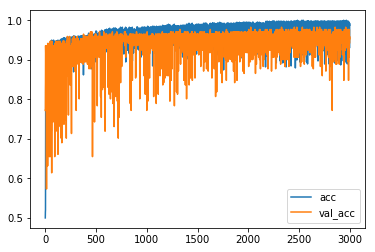

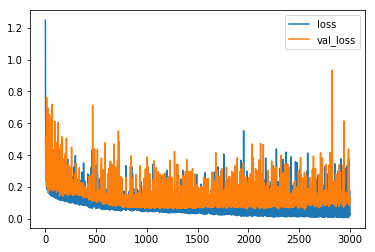

513


In [95]:
plt.plot(history1.history['acc'], label='acc')
plt.plot(history1.history['val_acc'], label='val_acc')
plt.legend()
plt.show()
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
count=0
for i in history1.history['acc']:
    if i>0.99:
        count+=1
print(count)

In [154]:
model4.save('model4.h5')
print("Avg Training acc: ", np.mean(history1.history['acc']),"\nAvg Testing acc: ", np.mean(history1.history['val_acc']))

Avg Training acc:  0.966512562676 
Avg Testing acc:  0.938567249898


### Using 4 Sigmoid Layers and SGD optimizer

In [16]:
model7 = Sequential()
model7.add(Dense(500, activation='sigmoid', use_bias=True, input_shape=(30,)))
model7.add(Dense(500, activation='sigmoid', use_bias=True))
model7.add(Dense(500, activation='sigmoid', use_bias=True))
model7.add(Dense(1, activation='sigmoid'))
keras.optimizers.SGD(lr=0.01)
#keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
model7.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history2 = model7.fit(mat[:,1:],mat[:,0], validation_split=0.3,shuffle=False,epochs=3000, batch_size=128)

Train on 398 samples, validate on 171 samples
Epoch 1/3000
398/398 [==============================] - 1s 1ms/step - loss: 0.6946 - acc: 0.5653 - val_loss: 0.5752 - val_acc: 0.7719
Epoch 2/3000
398/398 [==============================] - 0s 219us/step - loss: 0.6992 - acc: 0.5653 - val_loss: 0.5707 - val_acc: 0.7719
Epoch 3/3000
398/398 [==============================] - 0s 244us/step - loss: 0.6990 - acc: 0.5653 - val_loss: 0.5694 - val_acc: 0.7719
Epoch 4/3000
398/398 [==============================] - 0s 244us/step - loss: 0.6981 - acc: 0.5653 - val_loss: 0.5687 - val_acc: 0.7719
Epoch 5/3000
398/398 [==============================] - 0s 229us/step - loss: 0.6971 - acc: 0.5653 - val_loss: 0.5681 - val_acc: 0.7719
Epoch 6/3000
398/398 [==============================] - 0s 224us/step - loss: 0.6963 - acc: 0.5653 - val_loss: 0.5675 - val_acc: 0.7719
Epoch 7/3000
398/398 [==============================] - 0s 239us/step - loss: 0.6952 - acc: 0.5653 - val_loss: 0.5670 - val_acc: 0.7719
Epoc

Epoch 120/3000
398/398 [==============================] - 0s 236us/step - loss: 0.5999 - acc: 0.7312 - val_loss: 0.5031 - val_acc: 0.7719
Epoch 121/3000
398/398 [==============================] - 0s 196us/step - loss: 0.5988 - acc: 0.7337 - val_loss: 0.5023 - val_acc: 0.7719
Epoch 122/3000
398/398 [==============================] - 0s 196us/step - loss: 0.5977 - acc: 0.7337 - val_loss: 0.5015 - val_acc: 0.7719
Epoch 123/3000
398/398 [==============================] - 0s 236us/step - loss: 0.5966 - acc: 0.7337 - val_loss: 0.5007 - val_acc: 0.7719
Epoch 124/3000
398/398 [==============================] - 0s 196us/step - loss: 0.5954 - acc: 0.7362 - val_loss: 0.4999 - val_acc: 0.7719
Epoch 125/3000
398/398 [==============================] - 0s 314us/step - loss: 0.5943 - acc: 0.7362 - val_loss: 0.4991 - val_acc: 0.7719
Epoch 126/3000
398/398 [==============================] - 0s 275us/step - loss: 0.5931 - acc: 0.7362 - val_loss: 0.4982 - val_acc: 0.7719
Epoch 127/3000
398/398 [==========

398/398 [==============================] - 0s 209us/step - loss: 0.4311 - acc: 0.8819 - val_loss: 0.3693 - val_acc: 0.9123
Epoch 239/3000
398/398 [==============================] - 0s 226us/step - loss: 0.4297 - acc: 0.8819 - val_loss: 0.3683 - val_acc: 0.9123
Epoch 240/3000
398/398 [==============================] - 0s 211us/step - loss: 0.4282 - acc: 0.8819 - val_loss: 0.3669 - val_acc: 0.9123
Epoch 241/3000
398/398 [==============================] - 0s 211us/step - loss: 0.4268 - acc: 0.8819 - val_loss: 0.3661 - val_acc: 0.9181
Epoch 242/3000
398/398 [==============================] - 0s 206us/step - loss: 0.4251 - acc: 0.8819 - val_loss: 0.3643 - val_acc: 0.9181
Epoch 243/3000
398/398 [==============================] - 0s 209us/step - loss: 0.4240 - acc: 0.8819 - val_loss: 0.3641 - val_acc: 0.9181
Epoch 244/3000
398/398 [==============================] - 0s 211us/step - loss: 0.4222 - acc: 0.8819 - val_loss: 0.3618 - val_acc: 0.9181
Epoch 245/3000
398/398 [=========================

398/398 [==============================] - 0s 211us/step - loss: 0.3062 - acc: 0.9095 - val_loss: 0.2790 - val_acc: 0.9123
Epoch 357/3000
398/398 [==============================] - 0s 206us/step - loss: 0.3045 - acc: 0.9070 - val_loss: 0.2730 - val_acc: 0.9123
Epoch 358/3000
398/398 [==============================] - 0s 211us/step - loss: 0.3064 - acc: 0.9095 - val_loss: 0.2742 - val_acc: 0.9123
Epoch 359/3000
398/398 [==============================] - 0s 206us/step - loss: 0.3044 - acc: 0.9095 - val_loss: 0.2738 - val_acc: 0.9123
Epoch 360/3000
398/398 [==============================] - 0s 201us/step - loss: 0.3037 - acc: 0.9095 - val_loss: 0.2764 - val_acc: 0.9123
Epoch 361/3000
398/398 [==============================] - 0s 211us/step - loss: 0.3023 - acc: 0.9070 - val_loss: 0.2715 - val_acc: 0.9123
Epoch 362/3000
398/398 [==============================] - 0s 209us/step - loss: 0.3043 - acc: 0.9095 - val_loss: 0.2741 - val_acc: 0.9123
Epoch 363/3000
398/398 [=========================

398/398 [==============================] - 0s 216us/step - loss: 0.2651 - acc: 0.9095 - val_loss: 0.2551 - val_acc: 0.9181
Epoch 475/3000
398/398 [==============================] - 0s 224us/step - loss: 0.2704 - acc: 0.9121 - val_loss: 0.2561 - val_acc: 0.9181
Epoch 476/3000
398/398 [==============================] - 0s 216us/step - loss: 0.2667 - acc: 0.9121 - val_loss: 0.2520 - val_acc: 0.9181
Epoch 477/3000
398/398 [==============================] - 0s 219us/step - loss: 0.2662 - acc: 0.9095 - val_loss: 0.2496 - val_acc: 0.9181
Epoch 478/3000
398/398 [==============================] - 0s 221us/step - loss: 0.2640 - acc: 0.9121 - val_loss: 0.2482 - val_acc: 0.9181
Epoch 479/3000
398/398 [==============================] - 0s 221us/step - loss: 0.2710 - acc: 0.9121 - val_loss: 0.2648 - val_acc: 0.9123
Epoch 480/3000
398/398 [==============================] - 0s 214us/step - loss: 0.2671 - acc: 0.9146 - val_loss: 0.2577 - val_acc: 0.9181
Epoch 481/3000
398/398 [=========================

398/398 [==============================] - 0s 226us/step - loss: 0.2501 - acc: 0.9095 - val_loss: 0.2694 - val_acc: 0.9123
Epoch 593/3000
398/398 [==============================] - 0s 211us/step - loss: 0.2578 - acc: 0.9146 - val_loss: 0.2237 - val_acc: 0.9240
Epoch 594/3000
398/398 [==============================] - 0s 236us/step - loss: 0.2668 - acc: 0.9070 - val_loss: 0.2522 - val_acc: 0.9123
Epoch 595/3000
398/398 [==============================] - 0s 292us/step - loss: 0.2514 - acc: 0.9121 - val_loss: 0.2577 - val_acc: 0.9123
Epoch 596/3000
398/398 [==============================] - 0s 274us/step - loss: 0.2608 - acc: 0.9095 - val_loss: 0.2319 - val_acc: 0.9181
Epoch 597/3000
398/398 [==============================] - 0s 231us/step - loss: 0.2543 - acc: 0.9095 - val_loss: 0.2390 - val_acc: 0.9181
Epoch 598/3000
398/398 [==============================] - 0s 221us/step - loss: 0.2493 - acc: 0.9095 - val_loss: 0.2623 - val_acc: 0.9123
Epoch 599/3000
398/398 [=========================

398/398 [==============================] - 0s 211us/step - loss: 0.2408 - acc: 0.9095 - val_loss: 0.2251 - val_acc: 0.9181
Epoch 711/3000
398/398 [==============================] - 0s 216us/step - loss: 0.2418 - acc: 0.9095 - val_loss: 0.2471 - val_acc: 0.9181
Epoch 712/3000
398/398 [==============================] - 0s 216us/step - loss: 0.2346 - acc: 0.9146 - val_loss: 0.2365 - val_acc: 0.9123
Epoch 713/3000
398/398 [==============================] - 0s 209us/step - loss: 0.2380 - acc: 0.9121 - val_loss: 0.2269 - val_acc: 0.9064
Epoch 714/3000
398/398 [==============================] - 0s 209us/step - loss: 0.2361 - acc: 0.9121 - val_loss: 0.2327 - val_acc: 0.9123
Epoch 715/3000
398/398 [==============================] - 0s 216us/step - loss: 0.2360 - acc: 0.9146 - val_loss: 0.2533 - val_acc: 0.9181
Epoch 716/3000
398/398 [==============================] - 0s 214us/step - loss: 0.2368 - acc: 0.9095 - val_loss: 0.2464 - val_acc: 0.9064
Epoch 717/3000
398/398 [=========================

398/398 [==============================] - 0s 211us/step - loss: 0.2317 - acc: 0.9121 - val_loss: 0.2297 - val_acc: 0.9181
Epoch 829/3000
398/398 [==============================] - 0s 206us/step - loss: 0.2335 - acc: 0.9121 - val_loss: 0.2602 - val_acc: 0.9181
Epoch 830/3000
398/398 [==============================] - 0s 206us/step - loss: 0.2301 - acc: 0.9146 - val_loss: 0.2230 - val_acc: 0.9123
Epoch 831/3000
398/398 [==============================] - 0s 211us/step - loss: 0.2455 - acc: 0.9095 - val_loss: 0.2470 - val_acc: 0.9064
Epoch 832/3000
398/398 [==============================] - 0s 211us/step - loss: 0.2267 - acc: 0.9146 - val_loss: 0.2374 - val_acc: 0.9181
Epoch 833/3000
398/398 [==============================] - 0s 209us/step - loss: 0.2276 - acc: 0.9121 - val_loss: 0.2539 - val_acc: 0.9181
Epoch 834/3000
398/398 [==============================] - 0s 206us/step - loss: 0.2282 - acc: 0.9095 - val_loss: 0.2284 - val_acc: 0.9181
Epoch 835/3000
398/398 [=========================

398/398 [==============================] - 0s 204us/step - loss: 0.2376 - acc: 0.9146 - val_loss: 0.2397 - val_acc: 0.9181
Epoch 947/3000
398/398 [==============================] - 0s 211us/step - loss: 0.2323 - acc: 0.9171 - val_loss: 0.2410 - val_acc: 0.9123
Epoch 948/3000
398/398 [==============================] - 0s 221us/step - loss: 0.2336 - acc: 0.9121 - val_loss: 0.2523 - val_acc: 0.9181
Epoch 949/3000
398/398 [==============================] - 0s 216us/step - loss: 0.2303 - acc: 0.9121 - val_loss: 0.2270 - val_acc: 0.9123
Epoch 950/3000
398/398 [==============================] - 0s 221us/step - loss: 0.2301 - acc: 0.9095 - val_loss: 0.2064 - val_acc: 0.9181
Epoch 951/3000
398/398 [==============================] - 0s 216us/step - loss: 0.2262 - acc: 0.9095 - val_loss: 0.2394 - val_acc: 0.9240
Epoch 952/3000
398/398 [==============================] - 0s 209us/step - loss: 0.2335 - acc: 0.9095 - val_loss: 0.2191 - val_acc: 0.9240
Epoch 953/3000
398/398 [=========================

398/398 [==============================] - 0s 216us/step - loss: 0.2255 - acc: 0.9121 - val_loss: 0.2543 - val_acc: 0.9181
Epoch 1065/3000
398/398 [==============================] - 0s 199us/step - loss: 0.2167 - acc: 0.9196 - val_loss: 0.2093 - val_acc: 0.9181
Epoch 1066/3000
398/398 [==============================] - 0s 204us/step - loss: 0.2301 - acc: 0.9121 - val_loss: 0.2281 - val_acc: 0.9240
Epoch 1067/3000
398/398 [==============================] - 0s 206us/step - loss: 0.2196 - acc: 0.9121 - val_loss: 0.2434 - val_acc: 0.9181
Epoch 1068/3000
398/398 [==============================] - 0s 204us/step - loss: 0.2296 - acc: 0.9095 - val_loss: 0.2322 - val_acc: 0.9181
Epoch 1069/3000
398/398 [==============================] - 0s 211us/step - loss: 0.2299 - acc: 0.9095 - val_loss: 0.1942 - val_acc: 0.9181
Epoch 1070/3000
398/398 [==============================] - 0s 204us/step - loss: 0.2270 - acc: 0.9070 - val_loss: 0.2084 - val_acc: 0.9123
Epoch 1071/3000
398/398 [==================

398/398 [==============================] - 0s 209us/step - loss: 0.2180 - acc: 0.9146 - val_loss: 0.2114 - val_acc: 0.9240
Epoch 1124/3000
398/398 [==============================] - 0s 216us/step - loss: 0.2178 - acc: 0.9121 - val_loss: 0.2465 - val_acc: 0.9181
Epoch 1125/3000
398/398 [==============================] - 0s 211us/step - loss: 0.2272 - acc: 0.9121 - val_loss: 0.2062 - val_acc: 0.9064
Epoch 1126/3000
398/398 [==============================] - 0s 216us/step - loss: 0.2220 - acc: 0.9095 - val_loss: 0.2290 - val_acc: 0.9240
Epoch 1127/3000
398/398 [==============================] - 0s 214us/step - loss: 0.2225 - acc: 0.9146 - val_loss: 0.2032 - val_acc: 0.9181
Epoch 1128/3000
398/398 [==============================] - 0s 209us/step - loss: 0.2296 - acc: 0.9095 - val_loss: 0.2081 - val_acc: 0.9123
Epoch 1129/3000
398/398 [==============================] - 0s 204us/step - loss: 0.2193 - acc: 0.9095 - val_loss: 0.2051 - val_acc: 0.9298
Epoch 1130/3000
398/398 [==================

398/398 [==============================] - 0s 206us/step - loss: 0.2242 - acc: 0.9070 - val_loss: 0.1977 - val_acc: 0.9123
Epoch 1183/3000
398/398 [==============================] - 0s 206us/step - loss: 0.2218 - acc: 0.9121 - val_loss: 0.2938 - val_acc: 0.9181
Epoch 1184/3000
398/398 [==============================] - 0s 211us/step - loss: 0.2201 - acc: 0.9121 - val_loss: 0.2050 - val_acc: 0.9123
Epoch 1185/3000
398/398 [==============================] - 0s 216us/step - loss: 0.2242 - acc: 0.9095 - val_loss: 0.2080 - val_acc: 0.9181
Epoch 1186/3000
398/398 [==============================] - 0s 214us/step - loss: 0.2275 - acc: 0.9095 - val_loss: 0.2479 - val_acc: 0.9123
Epoch 1187/3000
398/398 [==============================] - 0s 209us/step - loss: 0.2320 - acc: 0.9095 - val_loss: 0.2139 - val_acc: 0.9064
Epoch 1188/3000
398/398 [==============================] - 0s 214us/step - loss: 0.2219 - acc: 0.9146 - val_loss: 0.2101 - val_acc: 0.9240
Epoch 1189/3000
398/398 [==================

398/398 [==============================] - 0s 214us/step - loss: 0.2221 - acc: 0.9095 - val_loss: 0.2834 - val_acc: 0.9123
Epoch 1242/3000
398/398 [==============================] - 0s 211us/step - loss: 0.2327 - acc: 0.9121 - val_loss: 0.2345 - val_acc: 0.9123
Epoch 1243/3000
398/398 [==============================] - 0s 214us/step - loss: 0.2379 - acc: 0.9146 - val_loss: 0.2132 - val_acc: 0.9240
Epoch 1244/3000
398/398 [==============================] - 0s 209us/step - loss: 0.2291 - acc: 0.9095 - val_loss: 0.2535 - val_acc: 0.9064
Epoch 1245/3000
398/398 [==============================] - 0s 251us/step - loss: 0.2227 - acc: 0.9121 - val_loss: 0.2433 - val_acc: 0.9064
Epoch 1246/3000
398/398 [==============================] - 0s 231us/step - loss: 0.2130 - acc: 0.9196 - val_loss: 0.2176 - val_acc: 0.9181
Epoch 1247/3000
398/398 [==============================] - 0s 216us/step - loss: 0.2275 - acc: 0.9095 - val_loss: 0.2119 - val_acc: 0.9181
Epoch 1248/3000
398/398 [==================

398/398 [==============================] - 0s 219us/step - loss: 0.2261 - acc: 0.9121 - val_loss: 0.2333 - val_acc: 0.9064
Epoch 1301/3000
398/398 [==============================] - 0s 209us/step - loss: 0.2216 - acc: 0.9146 - val_loss: 0.2653 - val_acc: 0.9064
Epoch 1302/3000
398/398 [==============================] - 0s 214us/step - loss: 0.2124 - acc: 0.9171 - val_loss: 0.2682 - val_acc: 0.9064
Epoch 1303/3000
398/398 [==============================] - 0s 204us/step - loss: 0.2211 - acc: 0.9196 - val_loss: 0.2270 - val_acc: 0.9123
Epoch 1304/3000
398/398 [==============================] - 0s 206us/step - loss: 0.2224 - acc: 0.9121 - val_loss: 0.2229 - val_acc: 0.9181
Epoch 1305/3000
398/398 [==============================] - 0s 216us/step - loss: 0.2345 - acc: 0.9070 - val_loss: 0.2411 - val_acc: 0.9123
Epoch 1306/3000
398/398 [==============================] - 0s 216us/step - loss: 0.2249 - acc: 0.9146 - val_loss: 0.2332 - val_acc: 0.9123
Epoch 1307/3000
398/398 [==================

398/398 [==============================] - 0s 216us/step - loss: 0.2091 - acc: 0.9221 - val_loss: 0.2245 - val_acc: 0.9240
Epoch 1360/3000
398/398 [==============================] - 0s 211us/step - loss: 0.2211 - acc: 0.9095 - val_loss: 0.2125 - val_acc: 0.9181
Epoch 1361/3000
398/398 [==============================] - 0s 211us/step - loss: 0.2228 - acc: 0.9171 - val_loss: 0.3184 - val_acc: 0.9064
Epoch 1362/3000
398/398 [==============================] - 0s 254us/step - loss: 0.2135 - acc: 0.9221 - val_loss: 0.2090 - val_acc: 0.9240
Epoch 1363/3000
398/398 [==============================] - 0s 259us/step - loss: 0.2061 - acc: 0.9171 - val_loss: 0.2512 - val_acc: 0.9181
Epoch 1364/3000
398/398 [==============================] - 0s 249us/step - loss: 0.2197 - acc: 0.9196 - val_loss: 0.2345 - val_acc: 0.9123
Epoch 1365/3000
398/398 [==============================] - 0s 221us/step - loss: 0.2184 - acc: 0.9246 - val_loss: 0.2373 - val_acc: 0.9181
Epoch 1366/3000
398/398 [==================

398/398 [==============================] - 0s 204us/step - loss: 0.2119 - acc: 0.9146 - val_loss: 0.2295 - val_acc: 0.9181
Epoch 1419/3000
398/398 [==============================] - 0s 206us/step - loss: 0.2106 - acc: 0.9146 - val_loss: 0.2457 - val_acc: 0.9064
Epoch 1420/3000
398/398 [==============================] - 0s 244us/step - loss: 0.2091 - acc: 0.9171 - val_loss: 0.1991 - val_acc: 0.9181
Epoch 1421/3000
398/398 [==============================] - 0s 251us/step - loss: 0.2204 - acc: 0.9121 - val_loss: 0.2715 - val_acc: 0.9123
Epoch 1422/3000
398/398 [==============================] - 0s 254us/step - loss: 0.2118 - acc: 0.9171 - val_loss: 0.2088 - val_acc: 0.9181
Epoch 1423/3000
398/398 [==============================] - 0s 239us/step - loss: 0.2158 - acc: 0.9121 - val_loss: 0.2164 - val_acc: 0.9181
Epoch 1424/3000
398/398 [==============================] - 0s 226us/step - loss: 0.2208 - acc: 0.9146 - val_loss: 0.2299 - val_acc: 0.9240
Epoch 1425/3000
398/398 [==================

398/398 [==============================] - 0s 251us/step - loss: 0.2153 - acc: 0.9146 - val_loss: 0.2329 - val_acc: 0.9181
Epoch 1536/3000
398/398 [==============================] - 0s 236us/step - loss: 0.2108 - acc: 0.9171 - val_loss: 0.2046 - val_acc: 0.9181
Epoch 1537/3000
398/398 [==============================] - 0s 236us/step - loss: 0.2187 - acc: 0.9146 - val_loss: 0.2497 - val_acc: 0.9181
Epoch 1538/3000
398/398 [==============================] - 0s 224us/step - loss: 0.2150 - acc: 0.9146 - val_loss: 0.2278 - val_acc: 0.9123
Epoch 1539/3000
398/398 [==============================] - 0s 214us/step - loss: 0.2197 - acc: 0.9196 - val_loss: 0.2118 - val_acc: 0.9240
Epoch 1540/3000
398/398 [==============================] - 0s 219us/step - loss: 0.2166 - acc: 0.9171 - val_loss: 0.2415 - val_acc: 0.9123
Epoch 1541/3000
398/398 [==============================] - 0s 282us/step - loss: 0.2192 - acc: 0.9121 - val_loss: 0.2032 - val_acc: 0.9123
Epoch 1542/3000
398/398 [==================

398/398 [==============================] - 0s 211us/step - loss: 0.2305 - acc: 0.9146 - val_loss: 0.2042 - val_acc: 0.9240
Epoch 1595/3000
398/398 [==============================] - 0s 214us/step - loss: 0.2336 - acc: 0.9095 - val_loss: 0.2146 - val_acc: 0.9064
Epoch 1596/3000
398/398 [==============================] - 0s 219us/step - loss: 0.2330 - acc: 0.9121 - val_loss: 0.2384 - val_acc: 0.9181
Epoch 1597/3000
398/398 [==============================] - 0s 211us/step - loss: 0.2232 - acc: 0.9146 - val_loss: 0.2306 - val_acc: 0.9123
Epoch 1598/3000
398/398 [==============================] - 0s 234us/step - loss: 0.2181 - acc: 0.9121 - val_loss: 0.2625 - val_acc: 0.9123
Epoch 1599/3000
398/398 [==============================] - 0s 294us/step - loss: 0.2224 - acc: 0.9171 - val_loss: 0.2049 - val_acc: 0.9123
Epoch 1600/3000
398/398 [==============================] - 0s 236us/step - loss: 0.2196 - acc: 0.9121 - val_loss: 0.2140 - val_acc: 0.9123
Epoch 1601/3000
398/398 [==================

398/398 [==============================] - 0s 264us/step - loss: 0.2240 - acc: 0.9121 - val_loss: 0.2044 - val_acc: 0.9064
Epoch 1654/3000
398/398 [==============================] - 0s 264us/step - loss: 0.2192 - acc: 0.9095 - val_loss: 0.2278 - val_acc: 0.9181
Epoch 1655/3000
398/398 [==============================] - 0s 251us/step - loss: 0.2173 - acc: 0.9146 - val_loss: 0.2101 - val_acc: 0.9123
Epoch 1656/3000
398/398 [==============================] - 0s 216us/step - loss: 0.2097 - acc: 0.9146 - val_loss: 0.2747 - val_acc: 0.9064
Epoch 1657/3000
398/398 [==============================] - 0s 216us/step - loss: 0.2149 - acc: 0.9146 - val_loss: 0.2261 - val_acc: 0.9181
Epoch 1658/3000
398/398 [==============================] - 0s 224us/step - loss: 0.2330 - acc: 0.9146 - val_loss: 0.2632 - val_acc: 0.9123
Epoch 1659/3000
398/398 [==============================] - 0s 219us/step - loss: 0.2193 - acc: 0.9146 - val_loss: 0.2290 - val_acc: 0.9181
Epoch 1660/3000
398/398 [==================

398/398 [==============================] - 0s 322us/step - loss: 0.2104 - acc: 0.9171 - val_loss: 0.2608 - val_acc: 0.9181
Epoch 1713/3000
398/398 [==============================] - 0s 241us/step - loss: 0.2062 - acc: 0.9171 - val_loss: 0.2280 - val_acc: 0.9181
Epoch 1714/3000
398/398 [==============================] - 0s 226us/step - loss: 0.2139 - acc: 0.9171 - val_loss: 0.2108 - val_acc: 0.9240
Epoch 1715/3000
398/398 [==============================] - 0s 219us/step - loss: 0.2194 - acc: 0.9146 - val_loss: 0.2162 - val_acc: 0.9181
Epoch 1716/3000
398/398 [==============================] - 0s 214us/step - loss: 0.2135 - acc: 0.9146 - val_loss: 0.2779 - val_acc: 0.9123
Epoch 1717/3000
398/398 [==============================] - 0s 219us/step - loss: 0.2259 - acc: 0.9146 - val_loss: 0.2334 - val_acc: 0.9181
Epoch 1718/3000
398/398 [==============================] - 0s 216us/step - loss: 0.2131 - acc: 0.9171 - val_loss: 0.2028 - val_acc: 0.9064
Epoch 1719/3000
398/398 [==================

398/398 [==============================] - 0s 221us/step - loss: 0.2320 - acc: 0.9146 - val_loss: 0.2073 - val_acc: 0.9181
Epoch 1772/3000
398/398 [==============================] - 0s 219us/step - loss: 0.2344 - acc: 0.9095 - val_loss: 0.2183 - val_acc: 0.9123
Epoch 1773/3000
398/398 [==============================] - 0s 219us/step - loss: 0.2354 - acc: 0.9121 - val_loss: 0.2281 - val_acc: 0.9240
Epoch 1774/3000
398/398 [==============================] - 0s 226us/step - loss: 0.2246 - acc: 0.9146 - val_loss: 0.2664 - val_acc: 0.9123
Epoch 1775/3000
398/398 [==============================] - 0s 219us/step - loss: 0.2277 - acc: 0.9146 - val_loss: 0.2759 - val_acc: 0.9064
Epoch 1776/3000
398/398 [==============================] - 0s 214us/step - loss: 0.2425 - acc: 0.9221 - val_loss: 0.2178 - val_acc: 0.9240
Epoch 1777/3000
398/398 [==============================] - 0s 211us/step - loss: 0.2354 - acc: 0.9171 - val_loss: 0.2972 - val_acc: 0.9064
Epoch 1778/3000
398/398 [==================

398/398 [==============================] - 0s 224us/step - loss: 0.2244 - acc: 0.9171 - val_loss: 0.2537 - val_acc: 0.9064
Epoch 1831/3000
398/398 [==============================] - 0s 211us/step - loss: 0.2346 - acc: 0.9121 - val_loss: 0.2694 - val_acc: 0.9064
Epoch 1832/3000
398/398 [==============================] - 0s 216us/step - loss: 0.2264 - acc: 0.9171 - val_loss: 0.2903 - val_acc: 0.9123
Epoch 1833/3000
398/398 [==============================] - 0s 214us/step - loss: 0.2317 - acc: 0.9146 - val_loss: 0.2073 - val_acc: 0.9240
Epoch 1834/3000
398/398 [==============================] - 0s 254us/step - loss: 0.2369 - acc: 0.9121 - val_loss: 0.2428 - val_acc: 0.9006
Epoch 1835/3000
398/398 [==============================] - 0s 272us/step - loss: 0.2337 - acc: 0.9146 - val_loss: 0.2641 - val_acc: 0.9064
Epoch 1836/3000
398/398 [==============================] - 0s 412us/step - loss: 0.2221 - acc: 0.9221 - val_loss: 0.2199 - val_acc: 0.9240
Epoch 1837/3000
398/398 [==================

398/398 [==============================] - 0s 302us/step - loss: 0.2329 - acc: 0.9121 - val_loss: 0.2606 - val_acc: 0.9181
Epoch 1890/3000
398/398 [==============================] - 0s 239us/step - loss: 0.2378 - acc: 0.9121 - val_loss: 0.3224 - val_acc: 0.9006
Epoch 1891/3000
398/398 [==============================] - 0s 226us/step - loss: 0.2603 - acc: 0.9121 - val_loss: 0.2408 - val_acc: 0.9064
Epoch 1892/3000
398/398 [==============================] - 0s 224us/step - loss: 0.2515 - acc: 0.9121 - val_loss: 0.2682 - val_acc: 0.9123
Epoch 1893/3000
398/398 [==============================] - 0s 347us/step - loss: 0.2355 - acc: 0.9146 - val_loss: 0.2469 - val_acc: 0.9123
Epoch 1894/3000
398/398 [==============================] - 0s 274us/step - loss: 0.2256 - acc: 0.9196 - val_loss: 0.2408 - val_acc: 0.9123
Epoch 1895/3000
398/398 [==============================] - 0s 214us/step - loss: 0.2271 - acc: 0.9171 - val_loss: 0.2739 - val_acc: 0.9123
Epoch 1896/3000
398/398 [==================

398/398 [==============================] - 0s 224us/step - loss: 0.2195 - acc: 0.9146 - val_loss: 0.1977 - val_acc: 0.9123
Epoch 1949/3000
398/398 [==============================] - 0s 214us/step - loss: 0.2264 - acc: 0.9146 - val_loss: 0.2533 - val_acc: 0.9064
Epoch 1950/3000
398/398 [==============================] - 0s 211us/step - loss: 0.2162 - acc: 0.9171 - val_loss: 0.2034 - val_acc: 0.9123
Epoch 1951/3000
398/398 [==============================] - 0s 206us/step - loss: 0.2260 - acc: 0.9171 - val_loss: 0.2708 - val_acc: 0.9181
Epoch 1952/3000
398/398 [==============================] - 0s 204us/step - loss: 0.2365 - acc: 0.9121 - val_loss: 0.2190 - val_acc: 0.9064
Epoch 1953/3000
398/398 [==============================] - 0s 206us/step - loss: 0.2204 - acc: 0.9095 - val_loss: 0.2103 - val_acc: 0.9181
Epoch 1954/3000
398/398 [==============================] - 0s 211us/step - loss: 0.2293 - acc: 0.9146 - val_loss: 0.2332 - val_acc: 0.9181
Epoch 1955/3000
398/398 [==================

398/398 [==============================] - 0s 224us/step - loss: 0.2315 - acc: 0.9171 - val_loss: 0.2181 - val_acc: 0.9064
Epoch 2008/3000
398/398 [==============================] - 0s 221us/step - loss: 0.2289 - acc: 0.9146 - val_loss: 0.2763 - val_acc: 0.9064
Epoch 2009/3000
398/398 [==============================] - 0s 244us/step - loss: 0.2394 - acc: 0.9171 - val_loss: 0.2333 - val_acc: 0.9123
Epoch 2010/3000
398/398 [==============================] - 0s 229us/step - loss: 0.2384 - acc: 0.9171 - val_loss: 0.2167 - val_acc: 0.9064
Epoch 2011/3000
398/398 [==============================] - 0s 219us/step - loss: 0.2340 - acc: 0.9121 - val_loss: 0.2231 - val_acc: 0.9064
Epoch 2012/3000
398/398 [==============================] - 0s 211us/step - loss: 0.2292 - acc: 0.9146 - val_loss: 0.2299 - val_acc: 0.9064
Epoch 2013/3000
398/398 [==============================] - 0s 209us/step - loss: 0.2335 - acc: 0.9146 - val_loss: 0.2086 - val_acc: 0.9181
Epoch 2014/3000
398/398 [==================

398/398 [==============================] - 0s 221us/step - loss: 0.2367 - acc: 0.9146 - val_loss: 0.2214 - val_acc: 0.9064
Epoch 2067/3000
398/398 [==============================] - 0s 219us/step - loss: 0.2204 - acc: 0.9171 - val_loss: 0.2788 - val_acc: 0.9064
Epoch 2068/3000
398/398 [==============================] - 0s 221us/step - loss: 0.2247 - acc: 0.9221 - val_loss: 0.2454 - val_acc: 0.9240
Epoch 2069/3000
398/398 [==============================] - 0s 216us/step - loss: 0.2341 - acc: 0.9121 - val_loss: 0.2087 - val_acc: 0.9240
Epoch 2070/3000
398/398 [==============================] - 0s 214us/step - loss: 0.2264 - acc: 0.9121 - val_loss: 0.2846 - val_acc: 0.9064
Epoch 2071/3000
398/398 [==============================] - 0s 206us/step - loss: 0.2368 - acc: 0.9221 - val_loss: 0.2325 - val_acc: 0.9181
Epoch 2072/3000
398/398 [==============================] - 0s 211us/step - loss: 0.2315 - acc: 0.9095 - val_loss: 0.2300 - val_acc: 0.9123
Epoch 2073/3000
398/398 [==================

398/398 [==============================] - 0s 206us/step - loss: 0.2477 - acc: 0.9121 - val_loss: 0.2519 - val_acc: 0.9123
Epoch 2126/3000
398/398 [==============================] - 0s 211us/step - loss: 0.2443 - acc: 0.9171 - val_loss: 0.2562 - val_acc: 0.9064
Epoch 2127/3000
398/398 [==============================] - 0s 211us/step - loss: 0.2366 - acc: 0.9070 - val_loss: 0.2773 - val_acc: 0.9123
Epoch 2128/3000
398/398 [==============================] - 0s 211us/step - loss: 0.2401 - acc: 0.9171 - val_loss: 0.2387 - val_acc: 0.9123
Epoch 2129/3000
398/398 [==============================] - 0s 204us/step - loss: 0.2467 - acc: 0.9146 - val_loss: 0.2885 - val_acc: 0.9006
Epoch 2130/3000
398/398 [==============================] - 0s 209us/step - loss: 0.2388 - acc: 0.9171 - val_loss: 0.2633 - val_acc: 0.9064
Epoch 2131/3000
398/398 [==============================] - 0s 214us/step - loss: 0.2286 - acc: 0.9171 - val_loss: 0.2967 - val_acc: 0.9064
Epoch 2132/3000
398/398 [==================

398/398 [==============================] - 0s 267us/step - loss: 0.2578 - acc: 0.9095 - val_loss: 0.2287 - val_acc: 0.9240
Epoch 2185/3000
398/398 [==============================] - 0s 277us/step - loss: 0.2498 - acc: 0.9146 - val_loss: 0.2520 - val_acc: 0.9123
Epoch 2186/3000
398/398 [==============================] - 0s 264us/step - loss: 0.2434 - acc: 0.9146 - val_loss: 0.2263 - val_acc: 0.9064
Epoch 2187/3000
398/398 [==============================] - 0s 221us/step - loss: 0.2566 - acc: 0.9146 - val_loss: 0.2373 - val_acc: 0.9123
Epoch 2188/3000
398/398 [==============================] - 0s 221us/step - loss: 0.2327 - acc: 0.9121 - val_loss: 0.2146 - val_acc: 0.9181
Epoch 2189/3000
398/398 [==============================] - 0s 282us/step - loss: 0.2480 - acc: 0.9095 - val_loss: 0.2157 - val_acc: 0.9240
Epoch 2190/3000
398/398 [==============================] - 0s 292us/step - loss: 0.2404 - acc: 0.9121 - val_loss: 0.2225 - val_acc: 0.9181
Epoch 2191/3000
398/398 [==================

Epoch 2302/3000
398/398 [==============================] - 0s 267us/step - loss: 0.2459 - acc: 0.9196 - val_loss: 0.2060 - val_acc: 0.9181
Epoch 2303/3000
398/398 [==============================] - 0s 224us/step - loss: 0.2328 - acc: 0.9146 - val_loss: 0.2454 - val_acc: 0.9123
Epoch 2304/3000
398/398 [==============================] - 0s 224us/step - loss: 0.2385 - acc: 0.9121 - val_loss: 0.2358 - val_acc: 0.9123
Epoch 2305/3000
398/398 [==============================] - 0s 251us/step - loss: 0.2423 - acc: 0.9121 - val_loss: 0.2624 - val_acc: 0.9064
Epoch 2306/3000
398/398 [==============================] - 0s 337us/step - loss: 0.2334 - acc: 0.9171 - val_loss: 0.2182 - val_acc: 0.9357
Epoch 2307/3000
398/398 [==============================] - 0s 224us/step - loss: 0.2384 - acc: 0.9121 - val_loss: 0.3452 - val_acc: 0.9006
Epoch 2308/3000
398/398 [==============================] - 0s 214us/step - loss: 0.2516 - acc: 0.9171 - val_loss: 0.2308 - val_acc: 0.9064
Epoch 2309/3000
398/398 [==

Epoch 2361/3000
398/398 [==============================] - 0s 209us/step - loss: 0.2533 - acc: 0.9171 - val_loss: 0.2184 - val_acc: 0.9181
Epoch 2362/3000
398/398 [==============================] - 0s 219us/step - loss: 0.2370 - acc: 0.9146 - val_loss: 0.2063 - val_acc: 0.9240
Epoch 2363/3000
398/398 [==============================] - 0s 219us/step - loss: 0.2642 - acc: 0.9045 - val_loss: 0.2717 - val_acc: 0.9181
Epoch 2364/3000
398/398 [==============================] - 0s 219us/step - loss: 0.2302 - acc: 0.9146 - val_loss: 0.2298 - val_acc: 0.9240
Epoch 2365/3000
398/398 [==============================] - 0s 272us/step - loss: 0.2799 - acc: 0.9020 - val_loss: 0.2146 - val_acc: 0.9181
Epoch 2366/3000
398/398 [==============================] - 0s 304us/step - loss: 0.2448 - acc: 0.9095 - val_loss: 0.2349 - val_acc: 0.9240
Epoch 2367/3000
398/398 [==============================] - 0s 234us/step - loss: 0.2399 - acc: 0.9095 - val_loss: 0.2870 - val_acc: 0.9064
Epoch 2368/3000
398/398 [==

Epoch 2420/3000
398/398 [==============================] - 0s 211us/step - loss: 0.2358 - acc: 0.9095 - val_loss: 0.2078 - val_acc: 0.9181
Epoch 2421/3000
398/398 [==============================] - 0s 209us/step - loss: 0.2295 - acc: 0.9095 - val_loss: 0.2063 - val_acc: 0.9181
Epoch 2422/3000
398/398 [==============================] - 0s 204us/step - loss: 0.2679 - acc: 0.9020 - val_loss: 0.2370 - val_acc: 0.9064
Epoch 2423/3000
398/398 [==============================] - 0s 206us/step - loss: 0.2520 - acc: 0.9070 - val_loss: 0.3231 - val_acc: 0.9064
Epoch 2424/3000
398/398 [==============================] - 0s 204us/step - loss: 0.2283 - acc: 0.9146 - val_loss: 0.2739 - val_acc: 0.9123
Epoch 2425/3000
398/398 [==============================] - 0s 204us/step - loss: 0.2228 - acc: 0.9146 - val_loss: 0.2890 - val_acc: 0.9006
Epoch 2426/3000
398/398 [==============================] - 0s 211us/step - loss: 0.2376 - acc: 0.9171 - val_loss: 0.2508 - val_acc: 0.9123
Epoch 2427/3000
398/398 [==

Epoch 2479/3000
398/398 [==============================] - 0s 234us/step - loss: 0.2514 - acc: 0.9146 - val_loss: 0.3295 - val_acc: 0.9006
Epoch 2480/3000
398/398 [==============================] - 0s 221us/step - loss: 0.2535 - acc: 0.9196 - val_loss: 0.2653 - val_acc: 0.9064
Epoch 2481/3000
398/398 [==============================] - 0s 216us/step - loss: 0.2576 - acc: 0.9171 - val_loss: 0.2366 - val_acc: 0.9123
Epoch 2482/3000
398/398 [==============================] - 0s 226us/step - loss: 0.2718 - acc: 0.9095 - val_loss: 0.2589 - val_acc: 0.9123
Epoch 2483/3000
398/398 [==============================] - 0s 226us/step - loss: 0.2422 - acc: 0.9121 - val_loss: 0.2571 - val_acc: 0.9064
Epoch 2484/3000
398/398 [==============================] - 0s 214us/step - loss: 0.2450 - acc: 0.9146 - val_loss: 0.2549 - val_acc: 0.9181
Epoch 2485/3000
398/398 [==============================] - 0s 222us/step - loss: 0.2534 - acc: 0.9121 - val_loss: 0.2627 - val_acc: 0.9240
Epoch 2486/3000
398/398 [==

Epoch 2538/3000
398/398 [==============================] - 0s 241us/step - loss: 0.2775 - acc: 0.9045 - val_loss: 0.2829 - val_acc: 0.9123
Epoch 2539/3000
398/398 [==============================] - 0s 239us/step - loss: 0.2682 - acc: 0.9121 - val_loss: 0.2311 - val_acc: 0.9123
Epoch 2540/3000
398/398 [==============================] - 0s 214us/step - loss: 0.2734 - acc: 0.9121 - val_loss: 0.2411 - val_acc: 0.9123
Epoch 2541/3000
398/398 [==============================] - 0s 209us/step - loss: 0.2537 - acc: 0.9070 - val_loss: 0.2793 - val_acc: 0.9064
Epoch 2542/3000
398/398 [==============================] - 0s 206us/step - loss: 0.2533 - acc: 0.9196 - val_loss: 0.2039 - val_acc: 0.9357
Epoch 2543/3000
398/398 [==============================] - 0s 216us/step - loss: 0.2666 - acc: 0.9121 - val_loss: 0.2403 - val_acc: 0.9181
Epoch 2544/3000
398/398 [==============================] - 0s 221us/step - loss: 0.2804 - acc: 0.8995 - val_loss: 0.2236 - val_acc: 0.9298
Epoch 2545/3000
398/398 [==

Epoch 2597/3000
398/398 [==============================] - 0s 226us/step - loss: 0.2580 - acc: 0.9171 - val_loss: 0.2386 - val_acc: 0.9064
Epoch 2598/3000
398/398 [==============================] - 0s 231us/step - loss: 0.2592 - acc: 0.9095 - val_loss: 0.2053 - val_acc: 0.9298
Epoch 2599/3000
398/398 [==============================] - 0s 229us/step - loss: 0.2587 - acc: 0.9095 - val_loss: 0.2444 - val_acc: 0.9123
Epoch 2600/3000
398/398 [==============================] - 0s 231us/step - loss: 0.2634 - acc: 0.9146 - val_loss: 0.2688 - val_acc: 0.9064
Epoch 2601/3000
398/398 [==============================] - 0s 221us/step - loss: 0.2278 - acc: 0.9171 - val_loss: 0.2415 - val_acc: 0.9064
Epoch 2602/3000
398/398 [==============================] - 0s 229us/step - loss: 0.2626 - acc: 0.9045 - val_loss: 0.2717 - val_acc: 0.9006
Epoch 2603/3000
398/398 [==============================] - 0s 216us/step - loss: 0.2668 - acc: 0.9095 - val_loss: 0.2452 - val_acc: 0.9123
Epoch 2604/3000
398/398 [==

398/398 [==============================] - 0s 219us/step - loss: 0.3006 - acc: 0.8744 - val_loss: 0.2280 - val_acc: 0.9240
Epoch 2715/3000
398/398 [==============================] - 0s 216us/step - loss: 0.2521 - acc: 0.9121 - val_loss: 0.2401 - val_acc: 0.9064
Epoch 2716/3000
398/398 [==============================] - 0s 211us/step - loss: 0.2616 - acc: 0.9171 - val_loss: 0.2246 - val_acc: 0.9357
Epoch 2717/3000
398/398 [==============================] - 0s 206us/step - loss: 0.2857 - acc: 0.8945 - val_loss: 0.2195 - val_acc: 0.9415
Epoch 2718/3000
398/398 [==============================] - 0s 214us/step - loss: 0.3949 - acc: 0.8166 - val_loss: 0.2958 - val_acc: 0.9006
Epoch 2719/3000
398/398 [==============================] - 0s 211us/step - loss: 0.3421 - acc: 0.8467 - val_loss: 0.2534 - val_acc: 0.9474
Epoch 2720/3000
398/398 [==============================] - 0s 221us/step - loss: 0.3013 - acc: 0.8844 - val_loss: 0.2303 - val_acc: 0.9298
Epoch 2721/3000
398/398 [==================

398/398 [==============================] - 0s 275us/step - loss: 0.3289 - acc: 0.8693 - val_loss: 0.3534 - val_acc: 0.9006
Epoch 2774/3000
398/398 [==============================] - 0s 236us/step - loss: 0.2919 - acc: 0.9095 - val_loss: 0.2937 - val_acc: 0.9006
Epoch 2775/3000
398/398 [==============================] - 0s 196us/step - loss: 0.2910 - acc: 0.8995 - val_loss: 0.3117 - val_acc: 0.9006
Epoch 2776/3000
398/398 [==============================] - 0s 236us/step - loss: 0.2832 - acc: 0.9121 - val_loss: 0.2309 - val_acc: 0.9298
Epoch 2777/3000
398/398 [==============================] - 0s 196us/step - loss: 0.3218 - acc: 0.8693 - val_loss: 0.2763 - val_acc: 0.9181
Epoch 2778/3000
398/398 [==============================] - 0s 236us/step - loss: 0.3450 - acc: 0.8618 - val_loss: 0.3061 - val_acc: 0.9298
Epoch 2779/3000
398/398 [==============================] - 0s 243us/step - loss: 0.3336 - acc: 0.8819 - val_loss: 0.2742 - val_acc: 0.9064
Epoch 2780/3000
398/398 [==================

398/398 [==============================] - 0s 211us/step - loss: 0.2840 - acc: 0.9196 - val_loss: 0.3029 - val_acc: 0.9298
Epoch 2833/3000
398/398 [==============================] - 0s 234us/step - loss: 0.3045 - acc: 0.9095 - val_loss: 0.3860 - val_acc: 0.9006
Epoch 2834/3000
398/398 [==============================] - 0s 226us/step - loss: 0.3105 - acc: 0.9121 - val_loss: 0.3162 - val_acc: 0.9064
Epoch 2835/3000
398/398 [==============================] - 0s 231us/step - loss: 0.3562 - acc: 0.8593 - val_loss: 0.3039 - val_acc: 0.9064
Epoch 2836/3000
398/398 [==============================] - 0s 234us/step - loss: 0.3371 - acc: 0.8945 - val_loss: 0.2890 - val_acc: 0.9006
Epoch 2837/3000
398/398 [==============================] - 0s 214us/step - loss: 0.4008 - acc: 0.8116 - val_loss: 0.3455 - val_acc: 0.9006
Epoch 2838/3000
398/398 [==============================] - 0s 241us/step - loss: 0.2927 - acc: 0.9221 - val_loss: 0.3603 - val_acc: 0.9064
Epoch 2839/3000
398/398 [==================

398/398 [==============================] - 0s 219us/step - loss: 0.4829 - acc: 0.7638 - val_loss: 0.3295 - val_acc: 0.9181
Epoch 2892/3000
398/398 [==============================] - 0s 219us/step - loss: 0.4230 - acc: 0.8467 - val_loss: 0.3492 - val_acc: 0.9240
Epoch 2893/3000
398/398 [==============================] - 0s 236us/step - loss: 0.3802 - acc: 0.8970 - val_loss: 0.3395 - val_acc: 0.9123
Epoch 2894/3000
398/398 [==============================] - 0s 214us/step - loss: 0.3642 - acc: 0.8819 - val_loss: 0.3337 - val_acc: 0.9298
Epoch 2895/3000
398/398 [==============================] - 0s 211us/step - loss: 0.4405 - acc: 0.8367 - val_loss: 0.2687 - val_acc: 0.9298
Epoch 2896/3000
398/398 [==============================] - 0s 226us/step - loss: 0.4136 - acc: 0.7940 - val_loss: 0.3307 - val_acc: 0.8830
Epoch 2897/3000
398/398 [==============================] - 0s 209us/step - loss: 0.4710 - acc: 0.7563 - val_loss: 0.3831 - val_acc: 0.9064
Epoch 2898/3000
398/398 [==================

Epoch 2950/3000
398/398 [==============================] - 0s 236us/step - loss: 0.3926 - acc: 0.8392 - val_loss: 0.3707 - val_acc: 0.8772
Epoch 2951/3000
398/398 [==============================] - 0s 219us/step - loss: 0.3486 - acc: 0.8970 - val_loss: 0.3023 - val_acc: 0.9298
Epoch 2952/3000
398/398 [==============================] - 0s 211us/step - loss: 0.3885 - acc: 0.8467 - val_loss: 0.3166 - val_acc: 0.9181
Epoch 2953/3000
398/398 [==============================] - 0s 221us/step - loss: 0.3845 - acc: 0.8719 - val_loss: 0.3048 - val_acc: 0.9123
Epoch 2954/3000
398/398 [==============================] - 0s 216us/step - loss: 0.3711 - acc: 0.8618 - val_loss: 0.3207 - val_acc: 0.8947
Epoch 2955/3000
398/398 [==============================] - 0s 236us/step - loss: 0.4318 - acc: 0.7663 - val_loss: 0.3968 - val_acc: 0.9064
Epoch 2956/3000
398/398 [==============================] - 0s 209us/step - loss: 0.3457 - acc: 0.9095 - val_loss: 0.3172 - val_acc: 0.9123
Epoch 2957/3000
398/398 [==

In [17]:
score = model7.evaluate(mat[:398,1:],mat[:398,0], verbose=0, batch_size=128)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.311782893673
Train accuracy: 0.909547738993


In [18]:
score = model7.evaluate(mat[398:,1:],mat[398:,0], verbose=0, batch_size=128)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.308878431718
Validation accuracy: 0.906432752372


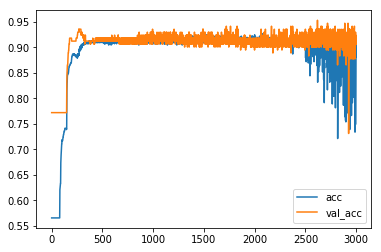

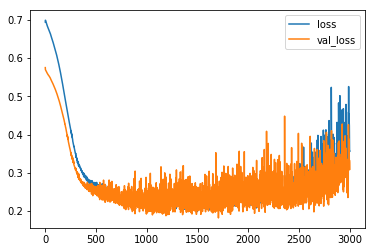

0


In [19]:
plt.plot(history2.history['acc'], label='acc')
plt.plot(history2.history['val_acc'], label='val_acc')
plt.legend()
plt.show()
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
count=0
for i in history2.history['acc']:
    if i>0.99:
        count+=1
print(count)

In [20]:
model7.save('model7.h5')
print("Avg Training acc: ", np.mean(history2.history['acc']),"\nAvg Testing acc: ", np.mean(history2.history['val_acc']))

Avg Training acc:  0.892200167809 
Avg Testing acc:  0.907534117838


### Using 4 Sigmoid Layers and RMSprop optimizer with batch shuffle

In [103]:
model6 = Sequential()
model6.add(Dense(500, activation='sigmoid', use_bias=True, input_shape=(30,)))
model6.add(Dense(500, activation='sigmoid', use_bias=True))
model6.add(Dense(500, activation='sigmoid', use_bias=True))
model6.add(Dense(1, activation='sigmoid'))
keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
model6.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history4 = model6.fit(mat[:,1:],mat[:,0], validation_split=0.3,shuffle=True,epochs=3000, batch_size=128)

Train on 398 samples, validate on 171 samples
Epoch 1/3000
398/398 [==============================] - 1s 2ms/step - loss: 1.1649 - acc: 0.5201 - val_loss: 0.5359 - val_acc: 0.7719
Epoch 2/3000
398/398 [==============================] - 0s 324us/step - loss: 0.7859 - acc: 0.5151 - val_loss: 0.4397 - val_acc: 0.7836
Epoch 3/3000
398/398 [==============================] - 0s 282us/step - loss: 0.5108 - acc: 0.7940 - val_loss: 0.5933 - val_acc: 0.7719
Epoch 4/3000
398/398 [==============================] - 0s 249us/step - loss: 0.6246 - acc: 0.7889 - val_loss: 0.3320 - val_acc: 0.8830
Epoch 5/3000
398/398 [==============================] - 0s 272us/step - loss: 0.4427 - acc: 0.8266 - val_loss: 0.2615 - val_acc: 0.9357
Epoch 6/3000
398/398 [==============================] - 0s 269us/step - loss: 0.3668 - acc: 0.8543 - val_loss: 0.4622 - val_acc: 0.8012
Epoch 7/3000
398/398 [==============================] - 0s 274us/step - loss: 0.2739 - acc: 0.9196 - val_loss: 0.2729 - val_acc: 0.9181
Epoc

Epoch 120/3000
398/398 [==============================] - 0s 246us/step - loss: 0.2863 - acc: 0.8719 - val_loss: 0.1775 - val_acc: 0.9298
Epoch 121/3000
398/398 [==============================] - 0s 267us/step - loss: 0.1588 - acc: 0.9246 - val_loss: 0.1968 - val_acc: 0.9181
Epoch 122/3000
398/398 [==============================] - 0s 282us/step - loss: 0.1604 - acc: 0.9271 - val_loss: 0.2397 - val_acc: 0.9123
Epoch 123/3000
398/398 [==============================] - 0s 264us/step - loss: 0.1635 - acc: 0.9397 - val_loss: 0.2148 - val_acc: 0.9181
Epoch 124/3000
398/398 [==============================] - 0s 282us/step - loss: 0.1534 - acc: 0.9422 - val_loss: 0.6867 - val_acc: 0.7251
Epoch 125/3000
398/398 [==============================] - 0s 272us/step - loss: 0.2914 - acc: 0.8869 - val_loss: 0.1699 - val_acc: 0.9298
Epoch 126/3000
398/398 [==============================] - 0s 284us/step - loss: 0.1559 - acc: 0.9347 - val_loss: 0.2132 - val_acc: 0.9357
Epoch 127/3000
398/398 [==========

Epoch 179/3000
398/398 [==============================] - 0s 256us/step - loss: 0.1993 - acc: 0.9196 - val_loss: 0.1507 - val_acc: 0.9474
Epoch 180/3000
398/398 [==============================] - 0s 279us/step - loss: 0.1335 - acc: 0.9422 - val_loss: 0.1481 - val_acc: 0.9474
Epoch 181/3000
398/398 [==============================] - 0s 244us/step - loss: 0.2016 - acc: 0.9171 - val_loss: 0.1825 - val_acc: 0.9298
Epoch 182/3000
398/398 [==============================] - 0s 264us/step - loss: 0.1732 - acc: 0.9171 - val_loss: 0.1912 - val_acc: 0.9240
Epoch 183/3000
398/398 [==============================] - 0s 236us/step - loss: 0.1531 - acc: 0.9397 - val_loss: 0.2814 - val_acc: 0.8772
Epoch 184/3000
398/398 [==============================] - 0s 267us/step - loss: 0.1773 - acc: 0.9397 - val_loss: 0.1709 - val_acc: 0.9357
Epoch 185/3000
398/398 [==============================] - 0s 244us/step - loss: 0.1629 - acc: 0.9322 - val_loss: 0.2100 - val_acc: 0.9181
Epoch 186/3000
398/398 [==========

398/398 [==============================] - 0s 234us/step - loss: 0.1617 - acc: 0.9221 - val_loss: 0.2311 - val_acc: 0.9064
Epoch 239/3000
398/398 [==============================] - 0s 231us/step - loss: 0.1263 - acc: 0.9397 - val_loss: 0.2789 - val_acc: 0.8772
Epoch 240/3000
398/398 [==============================] - 0s 274us/step - loss: 0.1527 - acc: 0.9372 - val_loss: 0.1691 - val_acc: 0.9532
Epoch 241/3000
398/398 [==============================] - 0s 236us/step - loss: 0.2127 - acc: 0.9196 - val_loss: 0.1976 - val_acc: 0.9415
Epoch 242/3000
398/398 [==============================] - 0s 284us/step - loss: 0.1746 - acc: 0.9196 - val_loss: 0.1747 - val_acc: 0.9181
Epoch 243/3000
398/398 [==============================] - 0s 264us/step - loss: 0.1579 - acc: 0.9372 - val_loss: 0.2265 - val_acc: 0.9181
Epoch 244/3000
398/398 [==============================] - 0s 244us/step - loss: 0.1273 - acc: 0.9347 - val_loss: 0.2439 - val_acc: 0.9357
Epoch 245/3000
398/398 [=========================

398/398 [==============================] - 0s 259us/step - loss: 0.1385 - acc: 0.9397 - val_loss: 0.1319 - val_acc: 0.9474
Epoch 357/3000
398/398 [==============================] - 0s 261us/step - loss: 0.1222 - acc: 0.9447 - val_loss: 0.1434 - val_acc: 0.9474
Epoch 358/3000
398/398 [==============================] - 0s 259us/step - loss: 0.1678 - acc: 0.9221 - val_loss: 0.1710 - val_acc: 0.9357
Epoch 359/3000
398/398 [==============================] - 0s 259us/step - loss: 0.1649 - acc: 0.9397 - val_loss: 0.3138 - val_acc: 0.8596
Epoch 360/3000
398/398 [==============================] - 0s 267us/step - loss: 0.1214 - acc: 0.9372 - val_loss: 0.1619 - val_acc: 0.9474
Epoch 361/3000
398/398 [==============================] - 0s 251us/step - loss: 0.1908 - acc: 0.9221 - val_loss: 0.4545 - val_acc: 0.7836
Epoch 362/3000
398/398 [==============================] - 0s 239us/step - loss: 0.1228 - acc: 0.9397 - val_loss: 0.5603 - val_acc: 0.7602
Epoch 363/3000
398/398 [=========================

398/398 [==============================] - 0s 269us/step - loss: 0.1189 - acc: 0.9523 - val_loss: 0.2326 - val_acc: 0.9064
Epoch 474/3000
398/398 [==============================] - 0s 239us/step - loss: 0.1094 - acc: 0.9472 - val_loss: 0.1200 - val_acc: 0.9532
Epoch 475/3000
398/398 [==============================] - ETA: 0s - loss: 0.1226 - acc: 0.937 - 0s 246us/step - loss: 0.1142 - acc: 0.9472 - val_loss: 0.2826 - val_acc: 0.8596
Epoch 476/3000
398/398 [==============================] - 0s 239us/step - loss: 0.1205 - acc: 0.9497 - val_loss: 0.1546 - val_acc: 0.9532
Epoch 477/3000
398/398 [==============================] - 0s 264us/step - loss: 0.1307 - acc: 0.9447 - val_loss: 0.1883 - val_acc: 0.9298
Epoch 478/3000
398/398 [==============================] - 0s 246us/step - loss: 0.1307 - acc: 0.9497 - val_loss: 0.6067 - val_acc: 0.7485
Epoch 479/3000
398/398 [==============================] - 0s 269us/step - loss: 0.1610 - acc: 0.9322 - val_loss: 0.4909 - val_acc: 0.6608
Epoch 480/3

Epoch 532/3000
398/398 [==============================] - 0s 272us/step - loss: 0.1410 - acc: 0.9397 - val_loss: 0.2326 - val_acc: 0.8947
Epoch 533/3000
398/398 [==============================] - 0s 244us/step - loss: 0.1209 - acc: 0.9548 - val_loss: 0.1899 - val_acc: 0.9298
Epoch 534/3000
398/398 [==============================] - 0s 246us/step - loss: 0.1729 - acc: 0.9397 - val_loss: 0.2403 - val_acc: 0.9064
Epoch 535/3000
398/398 [==============================] - 0s 241us/step - loss: 0.1006 - acc: 0.9598 - val_loss: 0.8706 - val_acc: 0.6316
Epoch 536/3000
398/398 [==============================] - 0s 267us/step - loss: 0.2140 - acc: 0.8920 - val_loss: 0.2228 - val_acc: 0.9064
Epoch 537/3000
398/398 [==============================] - 0s 249us/step - loss: 0.0977 - acc: 0.9573 - val_loss: 0.1576 - val_acc: 0.9357
Epoch 538/3000
398/398 [==============================] - ETA: 0s - loss: 0.0715 - acc: 0.968 - 0s 246us/step - loss: 0.0954 - acc: 0.9573 - val_loss: 0.1127 - val_acc: 0.9

398/398 [==============================] - 0s 277us/step - loss: 0.1016 - acc: 0.9497 - val_loss: 0.3617 - val_acc: 0.8246
Epoch 650/3000
398/398 [==============================] - 0s 246us/step - loss: 0.1099 - acc: 0.9523 - val_loss: 0.5646 - val_acc: 0.8070
Epoch 651/3000
398/398 [==============================] - 0s 274us/step - loss: 0.1518 - acc: 0.9322 - val_loss: 0.2410 - val_acc: 0.8713
Epoch 652/3000
398/398 [==============================] - 0s 261us/step - loss: 0.0963 - acc: 0.9598 - val_loss: 0.1383 - val_acc: 0.9649
Epoch 653/3000
398/398 [==============================] - 0s 246us/step - loss: 0.1232 - acc: 0.9523 - val_loss: 0.2077 - val_acc: 0.8947
Epoch 654/3000
398/398 [==============================] - 0s 267us/step - loss: 0.0953 - acc: 0.9548 - val_loss: 0.2222 - val_acc: 0.9006
Epoch 655/3000
398/398 [==============================] - 0s 241us/step - loss: 0.1435 - acc: 0.9322 - val_loss: 0.1143 - val_acc: 0.9532
Epoch 656/3000
398/398 [=========================

398/398 [==============================] - 0s 256us/step - loss: 0.1341 - acc: 0.9322 - val_loss: 0.1448 - val_acc: 0.9298
Epoch 768/3000
398/398 [==============================] - 0s 254us/step - loss: 0.0728 - acc: 0.9673 - val_loss: 0.1215 - val_acc: 0.9415
Epoch 769/3000
398/398 [==============================] - 0s 299us/step - loss: 0.0697 - acc: 0.9648 - val_loss: 0.0797 - val_acc: 0.9708
Epoch 770/3000
398/398 [==============================] - 0s 261us/step - loss: 0.2011 - acc: 0.9196 - val_loss: 0.1613 - val_acc: 0.9298
Epoch 771/3000
398/398 [==============================] - 0s 274us/step - loss: 0.0889 - acc: 0.9548 - val_loss: 1.2174 - val_acc: 0.6257
Epoch 772/3000
398/398 [==============================] - 0s 302us/step - loss: 0.2634 - acc: 0.8794 - val_loss: 0.1557 - val_acc: 0.9357
Epoch 773/3000
398/398 [==============================] - 0s 241us/step - loss: 0.0805 - acc: 0.9623 - val_loss: 0.1678 - val_acc: 0.9298
Epoch 774/3000
398/398 [=========================

398/398 [==============================] - 0s 297us/step - loss: 0.0871 - acc: 0.9623 - val_loss: 0.1485 - val_acc: 0.9298
Epoch 886/3000
398/398 [==============================] - 0s 294us/step - loss: 0.0733 - acc: 0.9648 - val_loss: 0.1872 - val_acc: 0.9181
Epoch 887/3000
398/398 [==============================] - 0s 251us/step - loss: 0.0747 - acc: 0.9749 - val_loss: 0.1082 - val_acc: 0.9415
Epoch 888/3000
398/398 [==============================] - 0s 292us/step - loss: 0.0625 - acc: 0.9698 - val_loss: 0.0785 - val_acc: 0.9708
Epoch 889/3000
398/398 [==============================] - 0s 277us/step - loss: 0.2469 - acc: 0.9146 - val_loss: 0.1053 - val_acc: 0.9708
Epoch 890/3000
398/398 [==============================] - 0s 261us/step - loss: 0.0866 - acc: 0.9598 - val_loss: 0.3912 - val_acc: 0.8363
Epoch 891/3000
398/398 [==============================] - 0s 239us/step - loss: 0.0781 - acc: 0.9648 - val_loss: 0.1946 - val_acc: 0.9123
Epoch 892/3000
398/398 [=========================

398/398 [==============================] - 0s 240us/step - loss: 0.0883 - acc: 0.9598 - val_loss: 0.0892 - val_acc: 0.9649
Epoch 1004/3000
398/398 [==============================] - 0s 243us/step - loss: 0.0639 - acc: 0.9749 - val_loss: 0.2415 - val_acc: 0.9240
Epoch 1005/3000
398/398 [==============================] - 0s 236us/step - loss: 0.2335 - acc: 0.9221 - val_loss: 0.2690 - val_acc: 0.8480
Epoch 1006/3000
398/398 [==============================] - 0s 253us/step - loss: 0.0794 - acc: 0.9598 - val_loss: 0.0957 - val_acc: 0.9649
Epoch 1007/3000
398/398 [==============================] - 0s 236us/step - loss: 0.1134 - acc: 0.9523 - val_loss: 0.2802 - val_acc: 0.8830
Epoch 1008/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0716 - acc: 0.9673 - val_loss: 0.9135 - val_acc: 0.7719
Epoch 1009/3000
398/398 [==============================] - 0s 236us/step - loss: 0.2481 - acc: 0.9246 - val_loss: 0.0988 - val_acc: 0.9591
Epoch 1010/3000
398/398 [==================

398/398 [==============================] - 0s 236us/step - loss: 0.1643 - acc: 0.9322 - val_loss: 0.1706 - val_acc: 0.9298
Epoch 1063/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0707 - acc: 0.9749 - val_loss: 0.0948 - val_acc: 0.9649
Epoch 1064/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0644 - acc: 0.9623 - val_loss: 0.0934 - val_acc: 0.9708
Epoch 1065/3000
398/398 [==============================] - 0s 230us/step - loss: 0.1376 - acc: 0.9447 - val_loss: 0.0801 - val_acc: 0.9649
Epoch 1066/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0871 - acc: 0.9598 - val_loss: 0.1057 - val_acc: 0.9415
Epoch 1067/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0612 - acc: 0.9749 - val_loss: 0.2433 - val_acc: 0.8830
Epoch 1068/3000
398/398 [==============================] - 0s 236us/step - loss: 0.2074 - acc: 0.9347 - val_loss: 0.3072 - val_acc: 0.8421
Epoch 1069/3000
398/398 [==================

398/398 [==============================] - 0s 236us/step - loss: 0.0562 - acc: 0.9774 - val_loss: 0.0769 - val_acc: 0.9649
Epoch 1122/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0575 - acc: 0.9724 - val_loss: 0.2471 - val_acc: 0.8889
Epoch 1123/3000
398/398 [==============================] - 0s 275us/step - loss: 0.1790 - acc: 0.9397 - val_loss: 0.2340 - val_acc: 0.8596
Epoch 1124/3000
398/398 [==============================] - 0s 246us/step - loss: 0.0749 - acc: 0.9648 - val_loss: 0.4846 - val_acc: 0.8129
Epoch 1125/3000
398/398 [==============================] - 0s 259us/step - loss: 0.1113 - acc: 0.9472 - val_loss: 0.1627 - val_acc: 0.9123
Epoch 1126/3000
398/398 [==============================] - 0s 269us/step - loss: 0.0647 - acc: 0.9698 - val_loss: 0.0895 - val_acc: 0.9708
Epoch 1127/3000
398/398 [==============================] - 0s 200us/step - loss: 0.1179 - acc: 0.9472 - val_loss: 0.1165 - val_acc: 0.9649
Epoch 1128/3000
398/398 [==================

398/398 [==============================] - 0s 261us/step - loss: 0.0951 - acc: 0.9573 - val_loss: 0.0877 - val_acc: 0.9766
Epoch 1181/3000
398/398 [==============================] - 0s 258us/step - loss: 0.1326 - acc: 0.9296 - val_loss: 0.2493 - val_acc: 0.8596
Epoch 1182/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0721 - acc: 0.9648 - val_loss: 0.4044 - val_acc: 0.7661
Epoch 1183/3000
398/398 [==============================] - 0s 222us/step - loss: 0.0840 - acc: 0.9523 - val_loss: 0.1369 - val_acc: 0.9474
Epoch 1184/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0730 - acc: 0.9648 - val_loss: 0.2427 - val_acc: 0.8830
Epoch 1185/3000
398/398 [==============================] - 0s 236us/step - loss: 0.1473 - acc: 0.9347 - val_loss: 0.8650 - val_acc: 0.6959
Epoch 1186/3000
398/398 [==============================] - 0s 236us/step - loss: 0.1518 - acc: 0.9347 - val_loss: 0.0975 - val_acc: 0.9532
Epoch 1187/3000
398/398 [==================

398/398 [==============================] - 0s 236us/step - loss: 0.0936 - acc: 0.9648 - val_loss: 0.6131 - val_acc: 0.7193
Epoch 1240/3000
398/398 [==============================] - 0s 239us/step - loss: 0.1215 - acc: 0.9472 - val_loss: 0.0940 - val_acc: 0.9591
Epoch 1241/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0553 - acc: 0.9724 - val_loss: 0.4759 - val_acc: 0.8480
Epoch 1242/3000
398/398 [==============================] - 0s 236us/step - loss: 0.1995 - acc: 0.9347 - val_loss: 0.1264 - val_acc: 0.9532
Epoch 1243/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0648 - acc: 0.9648 - val_loss: 0.1407 - val_acc: 0.9298
Epoch 1244/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0521 - acc: 0.9799 - val_loss: 0.1153 - val_acc: 0.9591
Epoch 1245/3000
398/398 [==============================] - 0s 196us/step - loss: 0.1793 - acc: 0.9246 - val_loss: 0.1004 - val_acc: 0.9591
Epoch 1246/3000
398/398 [==================

398/398 [==============================] - 0s 236us/step - loss: 0.0574 - acc: 0.9774 - val_loss: 0.4596 - val_acc: 0.8480
Epoch 1299/3000
398/398 [==============================] - 0s 215us/step - loss: 0.0919 - acc: 0.9598 - val_loss: 0.1722 - val_acc: 0.9240
Epoch 1300/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0631 - acc: 0.9749 - val_loss: 0.4130 - val_acc: 0.8363
Epoch 1301/3000
398/398 [==============================] - 0s 275us/step - loss: 0.1224 - acc: 0.9397 - val_loss: 0.1282 - val_acc: 0.9474
Epoch 1302/3000
398/398 [==============================] - 0s 196us/step - loss: 0.0593 - acc: 0.9774 - val_loss: 0.3713 - val_acc: 0.8538
Epoch 1303/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0997 - acc: 0.9523 - val_loss: 0.0820 - val_acc: 0.9591
Epoch 1304/3000
398/398 [==============================] - 0s 236us/step - loss: 0.1250 - acc: 0.9472 - val_loss: 0.0952 - val_acc: 0.9532
Epoch 1305/3000
398/398 [==================

398/398 [==============================] - 0s 236us/step - loss: 0.0819 - acc: 0.9623 - val_loss: 0.6875 - val_acc: 0.7953
Epoch 1358/3000
398/398 [==============================] - 0s 236us/step - loss: 0.1281 - acc: 0.9497 - val_loss: 0.1296 - val_acc: 0.9357
Epoch 1359/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0578 - acc: 0.9824 - val_loss: 0.0817 - val_acc: 0.9649
Epoch 1360/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0540 - acc: 0.9774 - val_loss: 0.0812 - val_acc: 0.9708
Epoch 1361/3000
398/398 [==============================] - 0s 296us/step - loss: 0.1020 - acc: 0.9548 - val_loss: 0.1197 - val_acc: 0.9708
Epoch 1362/3000
398/398 [==============================] - 0s 204us/step - loss: 0.0613 - acc: 0.9749 - val_loss: 1.2517 - val_acc: 0.6842
Epoch 1363/3000
398/398 [==============================] - 0s 236us/step - loss: 0.2273 - acc: 0.9296 - val_loss: 0.3443 - val_acc: 0.8187
Epoch 1364/3000
398/398 [==================

398/398 [==============================] - 0s 236us/step - loss: 0.0688 - acc: 0.9698 - val_loss: 0.1126 - val_acc: 0.9591
Epoch 1417/3000
398/398 [==============================] - 0s 245us/step - loss: 0.0490 - acc: 0.9799 - val_loss: 0.1097 - val_acc: 0.9649
Epoch 1418/3000
398/398 [==============================] - 0s 256us/step - loss: 0.1534 - acc: 0.9422 - val_loss: 0.1639 - val_acc: 0.9415
Epoch 1419/3000
398/398 [==============================] - 0s 236us/step - loss: 0.1286 - acc: 0.9523 - val_loss: 0.1246 - val_acc: 0.9532
Epoch 1420/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0643 - acc: 0.9749 - val_loss: 0.0894 - val_acc: 0.9649
Epoch 1421/3000
398/398 [==============================] - 0s 227us/step - loss: 0.0627 - acc: 0.9648 - val_loss: 0.0789 - val_acc: 0.9649
Epoch 1422/3000
398/398 [==============================] - 0s 222us/step - loss: 0.0887 - acc: 0.9648 - val_loss: 0.1229 - val_acc: 0.9357
Epoch 1423/3000
398/398 [==================

Epoch 1475/3000
398/398 [==============================] - 0s 294us/step - loss: 0.0486 - acc: 0.9874 - val_loss: 0.3362 - val_acc: 0.8713
Epoch 1476/3000
398/398 [==============================] - 0s 319us/step - loss: 0.0829 - acc: 0.9623 - val_loss: 1.0596 - val_acc: 0.6608
Epoch 1477/3000
398/398 [==============================] - 0s 277us/step - loss: 0.1939 - acc: 0.9322 - val_loss: 0.3761 - val_acc: 0.8129
Epoch 1478/3000
398/398 [==============================] - 0s 292us/step - loss: 0.0690 - acc: 0.9698 - val_loss: 0.0821 - val_acc: 0.9532
Epoch 1479/3000
398/398 [==============================] - 0s 407us/step - loss: 0.0542 - acc: 0.9774 - val_loss: 0.0715 - val_acc: 0.9649
Epoch 1480/3000
398/398 [==============================] - 0s 307us/step - loss: 0.0892 - acc: 0.9523 - val_loss: 0.1235 - val_acc: 0.9415
Epoch 1481/3000
398/398 [==============================] - 0s 314us/step - loss: 0.1083 - acc: 0.9548 - val_loss: 0.1570 - val_acc: 0.9006
Epoch 1482/3000
398/398 [==

Epoch 1592/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0643 - acc: 0.9698 - val_loss: 0.1192 - val_acc: 0.9298
Epoch 1593/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0366 - acc: 0.9874 - val_loss: 0.0787 - val_acc: 0.9649
Epoch 1594/3000
398/398 [==============================] - 0s 205us/step - loss: 0.0558 - acc: 0.9724 - val_loss: 0.1635 - val_acc: 0.9474
Epoch 1595/3000
398/398 [==============================] - 0s 236us/step - loss: 0.1508 - acc: 0.9497 - val_loss: 0.2412 - val_acc: 0.9240
Epoch 1596/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0713 - acc: 0.9724 - val_loss: 1.1059 - val_acc: 0.6842
Epoch 1597/3000
398/398 [==============================] - 0s 236us/step - loss: 0.1852 - acc: 0.9322 - val_loss: 0.2092 - val_acc: 0.9064
Epoch 1598/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0507 - acc: 0.9799 - val_loss: 0.0810 - val_acc: 0.9649
Epoch 1599/3000
398/398 [==

Epoch 1651/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0473 - acc: 0.9799 - val_loss: 0.1217 - val_acc: 0.9474
Epoch 1652/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0333 - acc: 0.9824 - val_loss: 0.2552 - val_acc: 0.8947
Epoch 1653/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0830 - acc: 0.9724 - val_loss: 0.4479 - val_acc: 0.8070
Epoch 1654/3000
398/398 [==============================] - 0s 244us/step - loss: 0.1037 - acc: 0.9497 - val_loss: 0.0697 - val_acc: 0.9708
Epoch 1655/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0502 - acc: 0.9749 - val_loss: 0.1556 - val_acc: 0.9532
Epoch 1656/3000
398/398 [==============================] - 0s 236us/step - loss: 0.1829 - acc: 0.9397 - val_loss: 0.0876 - val_acc: 0.9591
Epoch 1657/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0428 - acc: 0.9774 - val_loss: 0.0870 - val_acc: 0.9591
Epoch 1658/3000
398/398 [==

Epoch 1710/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0733 - acc: 0.9573 - val_loss: 0.2037 - val_acc: 0.9123
Epoch 1711/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0510 - acc: 0.9749 - val_loss: 0.0741 - val_acc: 0.9649
Epoch 1712/3000
398/398 [==============================] - 0s 262us/step - loss: 0.0443 - acc: 0.9774 - val_loss: 0.0964 - val_acc: 0.9708
Epoch 1713/3000
398/398 [==============================] - 0s 277us/step - loss: 0.1919 - acc: 0.9121 - val_loss: 0.0923 - val_acc: 0.9532
Epoch 1714/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0431 - acc: 0.9874 - val_loss: 0.0927 - val_acc: 0.9649
Epoch 1715/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0842 - acc: 0.9698 - val_loss: 0.0527 - val_acc: 0.9825
Epoch 1716/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0460 - acc: 0.9824 - val_loss: 0.2779 - val_acc: 0.8947
Epoch 1717/3000
398/398 [==

Epoch 1769/3000
398/398 [==============================] - 0s 236us/step - loss: 0.3326 - acc: 0.8869 - val_loss: 0.0890 - val_acc: 0.9649
Epoch 1770/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0481 - acc: 0.9849 - val_loss: 0.2016 - val_acc: 0.9006
Epoch 1771/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0360 - acc: 0.9874 - val_loss: 0.0747 - val_acc: 0.9649
Epoch 1772/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0370 - acc: 0.9824 - val_loss: 0.1852 - val_acc: 0.9181
Epoch 1773/3000
398/398 [==============================] - 0s 249us/step - loss: 0.0391 - acc: 0.9849 - val_loss: 0.0606 - val_acc: 0.9708
Epoch 1774/3000
398/398 [==============================] - 0s 200us/step - loss: 0.0763 - acc: 0.9724 - val_loss: 0.1493 - val_acc: 0.9240
Epoch 1775/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0370 - acc: 0.9874 - val_loss: 0.1061 - val_acc: 0.9357
Epoch 1776/3000
398/398 [==

Epoch 1828/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0400 - acc: 0.9874 - val_loss: 0.2345 - val_acc: 0.9123
Epoch 1829/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0989 - acc: 0.9548 - val_loss: 0.0777 - val_acc: 0.9708
Epoch 1830/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0515 - acc: 0.9774 - val_loss: 0.1559 - val_acc: 0.9298
Epoch 1831/3000
398/398 [==============================] - 0s 275us/step - loss: 0.1175 - acc: 0.9598 - val_loss: 0.2657 - val_acc: 0.8889
Epoch 1832/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0546 - acc: 0.9774 - val_loss: 0.0818 - val_acc: 0.9708
Epoch 1833/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0393 - acc: 0.9849 - val_loss: 0.1511 - val_acc: 0.9474
Epoch 1834/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0365 - acc: 0.9849 - val_loss: 0.0859 - val_acc: 0.9591
Epoch 1835/3000
398/398 [==

Epoch 1887/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0334 - acc: 0.9950 - val_loss: 0.1000 - val_acc: 0.9532
Epoch 1888/3000
398/398 [==============================] - 0s 245us/step - loss: 0.0330 - acc: 0.9899 - val_loss: 0.0796 - val_acc: 0.9649
Epoch 1889/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0295 - acc: 0.9899 - val_loss: 0.0711 - val_acc: 0.9708
Epoch 1890/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0642 - acc: 0.9799 - val_loss: 0.0965 - val_acc: 0.9708
Epoch 1891/3000
398/398 [==============================] - 0s 275us/step - loss: 0.1520 - acc: 0.9422 - val_loss: 0.0574 - val_acc: 0.9825
Epoch 1892/3000
398/398 [==============================] - 0s 196us/step - loss: 0.0580 - acc: 0.9749 - val_loss: 0.1247 - val_acc: 0.9532
Epoch 1893/3000
398/398 [==============================] - 0s 236us/step - loss: 0.1151 - acc: 0.9548 - val_loss: 0.1892 - val_acc: 0.9064
Epoch 1894/3000
398/398 [==

Epoch 1946/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0280 - acc: 0.9925 - val_loss: 0.1169 - val_acc: 0.9591
Epoch 1947/3000
398/398 [==============================] - 0s 278us/step - loss: 0.0294 - acc: 0.9874 - val_loss: 0.4085 - val_acc: 0.8772
Epoch 1948/3000
398/398 [==============================] - 0s 233us/step - loss: 0.1543 - acc: 0.9548 - val_loss: 0.0833 - val_acc: 0.9708
Epoch 1949/3000
398/398 [==============================] - 0s 275us/step - loss: 0.2290 - acc: 0.9121 - val_loss: 0.0804 - val_acc: 0.9708
Epoch 1950/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0443 - acc: 0.9749 - val_loss: 0.1375 - val_acc: 0.9240
Epoch 1951/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0406 - acc: 0.9874 - val_loss: 0.3723 - val_acc: 0.8655
Epoch 1952/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0439 - acc: 0.9774 - val_loss: 0.0975 - val_acc: 0.9532
Epoch 1953/3000
398/398 [==

Epoch 2005/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0959 - acc: 0.9598 - val_loss: 0.2537 - val_acc: 0.8772
Epoch 2006/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0692 - acc: 0.9673 - val_loss: 0.0691 - val_acc: 0.9649
Epoch 2007/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0376 - acc: 0.9874 - val_loss: 0.0708 - val_acc: 0.9649
Epoch 2008/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0494 - acc: 0.9799 - val_loss: 1.4312 - val_acc: 0.5906
Epoch 2009/3000
398/398 [==============================] - 0s 233us/step - loss: 0.3165 - acc: 0.8970 - val_loss: 0.1150 - val_acc: 0.9474
Epoch 2010/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0418 - acc: 0.9874 - val_loss: 0.0761 - val_acc: 0.9649
Epoch 2011/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0374 - acc: 0.9874 - val_loss: 0.1375 - val_acc: 0.9474
Epoch 2012/3000
398/398 [==

Epoch 2064/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0726 - acc: 0.9673 - val_loss: 0.0772 - val_acc: 0.9649
Epoch 2065/3000
398/398 [==============================] - 0s 279us/step - loss: 0.0464 - acc: 0.9774 - val_loss: 0.1076 - val_acc: 0.9532
Epoch 2066/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0983 - acc: 0.9598 - val_loss: 0.1953 - val_acc: 0.9064
Epoch 2067/3000
398/398 [==============================] - 0s 260us/step - loss: 0.0527 - acc: 0.9799 - val_loss: 0.0638 - val_acc: 0.9708
Epoch 2068/3000
398/398 [==============================] - 0s 273us/step - loss: 0.0218 - acc: 0.9925 - val_loss: 0.2751 - val_acc: 0.9006
Epoch 2069/3000
398/398 [==============================] - 0s 319us/step - loss: 0.1476 - acc: 0.9472 - val_loss: 0.3231 - val_acc: 0.8655
Epoch 2070/3000
398/398 [==============================] - 0s 297us/step - loss: 0.0485 - acc: 0.9799 - val_loss: 0.0547 - val_acc: 0.9883
Epoch 2071/3000
398/398 [==

Epoch 2123/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0352 - acc: 0.9824 - val_loss: 0.1019 - val_acc: 0.9649
Epoch 2124/3000
398/398 [==============================] - 0s 222us/step - loss: 0.0602 - acc: 0.9724 - val_loss: 0.1690 - val_acc: 0.9532
Epoch 2125/3000
398/398 [==============================] - 0s 275us/step - loss: 0.1466 - acc: 0.9397 - val_loss: 0.0704 - val_acc: 0.9708
Epoch 2126/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0394 - acc: 0.9799 - val_loss: 0.9442 - val_acc: 0.7368
Epoch 2127/3000
398/398 [==============================] - 0s 256us/step - loss: 0.1323 - acc: 0.9497 - val_loss: 0.0614 - val_acc: 0.9766
Epoch 2128/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0290 - acc: 0.9874 - val_loss: 0.1761 - val_acc: 0.9240
Epoch 2129/3000
398/398 [==============================] - 0s 231us/step - loss: 0.0250 - acc: 0.9874 - val_loss: 0.1818 - val_acc: 0.9357
Epoch 2130/3000
398/398 [==

Epoch 2182/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0250 - acc: 0.9925 - val_loss: 0.0550 - val_acc: 0.9766
Epoch 2183/3000
398/398 [==============================] - 0s 236us/step - loss: 0.1804 - acc: 0.9372 - val_loss: 0.2324 - val_acc: 0.9064
Epoch 2184/3000
398/398 [==============================] - 0s 255us/step - loss: 0.0320 - acc: 0.9899 - val_loss: 0.5439 - val_acc: 0.8246
Epoch 2185/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0761 - acc: 0.9698 - val_loss: 0.0911 - val_acc: 0.9766
Epoch 2186/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0725 - acc: 0.9623 - val_loss: 0.0544 - val_acc: 0.9766
Epoch 2187/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0363 - acc: 0.9824 - val_loss: 0.3265 - val_acc: 0.8830
Epoch 2188/3000
398/398 [==============================] - 0s 234us/step - loss: 0.0276 - acc: 0.9874 - val_loss: 0.1577 - val_acc: 0.9532
Epoch 2189/3000
398/398 [==

Epoch 2241/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0250 - acc: 0.9975 - val_loss: 0.1182 - val_acc: 0.9649
Epoch 2242/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0772 - acc: 0.9724 - val_loss: 0.5372 - val_acc: 0.8421
Epoch 2243/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0705 - acc: 0.9698 - val_loss: 0.5451 - val_acc: 0.8304
Epoch 2244/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0600 - acc: 0.9673 - val_loss: 0.0637 - val_acc: 0.9825
Epoch 2245/3000
398/398 [==============================] - 0s 273us/step - loss: 0.0360 - acc: 0.9849 - val_loss: 0.5982 - val_acc: 0.8363
Epoch 2246/3000
398/398 [==============================] - 0s 236us/step - loss: 0.1476 - acc: 0.9472 - val_loss: 0.0866 - val_acc: 0.9649
Epoch 2247/3000
398/398 [==============================] - 0s 292us/step - loss: 0.0438 - acc: 0.9799 - val_loss: 0.1573 - val_acc: 0.9415
Epoch 2248/3000
398/398 [==

Epoch 2300/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0293 - acc: 0.9849 - val_loss: 0.0840 - val_acc: 0.9591
Epoch 2301/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0373 - acc: 0.9824 - val_loss: 0.0922 - val_acc: 0.9649
Epoch 2302/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0222 - acc: 0.9899 - val_loss: 0.0506 - val_acc: 0.9766
Epoch 2303/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0789 - acc: 0.9698 - val_loss: 0.3510 - val_acc: 0.9123
Epoch 2304/3000
398/398 [==============================] - 0s 236us/step - loss: 0.2800 - acc: 0.9196 - val_loss: 0.2062 - val_acc: 0.9064
Epoch 2305/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0385 - acc: 0.9874 - val_loss: 0.1434 - val_acc: 0.9474
Epoch 2306/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0398 - acc: 0.9849 - val_loss: 0.1169 - val_acc: 0.9415
Epoch 2307/3000
398/398 [==

Epoch 2359/3000
398/398 [==============================] - 0s 266us/step - loss: 0.0235 - acc: 0.9925 - val_loss: 0.0719 - val_acc: 0.9825
Epoch 2360/3000
398/398 [==============================] - 0s 299us/step - loss: 0.2120 - acc: 0.9221 - val_loss: 0.0760 - val_acc: 0.9708
Epoch 2361/3000
398/398 [==============================] - 0s 230us/step - loss: 0.0278 - acc: 0.9899 - val_loss: 0.0833 - val_acc: 0.9766
Epoch 2362/3000
398/398 [==============================] - 0s 289us/step - loss: 0.0391 - acc: 0.9774 - val_loss: 1.1922 - val_acc: 0.7368
Epoch 2363/3000
398/398 [==============================] - 0s 307us/step - loss: 0.1426 - acc: 0.9573 - val_loss: 0.0654 - val_acc: 0.9766
Epoch 2364/3000
398/398 [==============================] - 0s 360us/step - loss: 0.0548 - acc: 0.9774 - val_loss: 0.0616 - val_acc: 0.9766
Epoch 2365/3000
398/398 [==============================] - 0s 342us/step - loss: 0.0219 - acc: 0.9950 - val_loss: 0.0436 - val_acc: 0.9825
Epoch 2366/3000
398/398 [==

Epoch 2418/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0260 - acc: 0.9925 - val_loss: 0.1034 - val_acc: 0.9532
Epoch 2419/3000
398/398 [==============================] - 0s 314us/step - loss: 0.0189 - acc: 0.9925 - val_loss: 0.1482 - val_acc: 0.9474
Epoch 2420/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0276 - acc: 0.9849 - val_loss: 0.0987 - val_acc: 0.9532
Epoch 2421/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0529 - acc: 0.9724 - val_loss: 0.1465 - val_acc: 0.9298
Epoch 2422/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0195 - acc: 0.9950 - val_loss: 0.0847 - val_acc: 0.9649
Epoch 2423/3000
398/398 [==============================] - 0s 334us/step - loss: 0.0226 - acc: 0.9950 - val_loss: 0.3058 - val_acc: 0.9064
Epoch 2424/3000
398/398 [==============================] - 0s 279us/step - loss: 0.1870 - acc: 0.9472 - val_loss: 0.0929 - val_acc: 0.9591
Epoch 2425/3000
398/398 [==

Epoch 2477/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0611 - acc: 0.9774 - val_loss: 0.1164 - val_acc: 0.9474
Epoch 2478/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0234 - acc: 0.9925 - val_loss: 0.1754 - val_acc: 0.9415
Epoch 2479/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0577 - acc: 0.9799 - val_loss: 0.1880 - val_acc: 0.9298
Epoch 2480/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0244 - acc: 0.9899 - val_loss: 0.0931 - val_acc: 0.9649
Epoch 2481/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0248 - acc: 0.9925 - val_loss: 0.0877 - val_acc: 0.9591
Epoch 2482/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0476 - acc: 0.9849 - val_loss: 0.2923 - val_acc: 0.9357
Epoch 2483/3000
398/398 [==============================] - 0s 236us/step - loss: 0.2062 - acc: 0.9372 - val_loss: 0.1945 - val_acc: 0.9298
Epoch 2484/3000
398/398 [==

Epoch 2536/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0945 - acc: 0.9698 - val_loss: 0.2362 - val_acc: 0.9064
Epoch 2537/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0392 - acc: 0.9849 - val_loss: 0.2819 - val_acc: 0.8889
Epoch 2538/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0467 - acc: 0.9874 - val_loss: 0.1058 - val_acc: 0.9649
Epoch 2539/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0291 - acc: 0.9899 - val_loss: 0.2750 - val_acc: 0.9064
Epoch 2540/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0342 - acc: 0.9849 - val_loss: 0.2294 - val_acc: 0.9357
Epoch 2541/3000
398/398 [==============================] - 0s 275us/step - loss: 0.1924 - acc: 0.9296 - val_loss: 0.0663 - val_acc: 0.9708
Epoch 2542/3000
398/398 [==============================] - 0s 220us/step - loss: 0.0374 - acc: 0.9799 - val_loss: 0.6834 - val_acc: 0.7719
Epoch 2543/3000
398/398 [==

Epoch 2595/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0277 - acc: 0.9925 - val_loss: 0.0947 - val_acc: 0.9708
Epoch 2596/3000
398/398 [==============================] - 0s 240us/step - loss: 0.0191 - acc: 0.9950 - val_loss: 0.0730 - val_acc: 0.9649
Epoch 2597/3000
398/398 [==============================] - ETA: 0s - loss: 0.0114 - acc: 1.000 - 0s 236us/step - loss: 0.0161 - acc: 0.9925 - val_loss: 0.1184 - val_acc: 0.9708
Epoch 2598/3000
398/398 [==============================] - 0s 236us/step - loss: 0.1580 - acc: 0.9447 - val_loss: 0.0897 - val_acc: 0.9649
Epoch 2599/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0218 - acc: 0.9925 - val_loss: 0.1227 - val_acc: 0.9474
Epoch 2600/3000
398/398 [==============================] - 0s 275us/step - loss: 0.0195 - acc: 0.9950 - val_loss: 0.1018 - val_acc: 0.9474
Epoch 2601/3000
398/398 [==============================] - 0s 280us/step - loss: 0.0304 - acc: 0.9849 - val_loss: 1.7011 - val_a

398/398 [==============================] - 0s 221us/step - loss: 0.0280 - acc: 0.9874 - val_loss: 0.4310 - val_acc: 0.8596
Epoch 2713/3000
398/398 [==============================] - 0s 255us/step - loss: 0.1573 - acc: 0.9497 - val_loss: 0.0795 - val_acc: 0.9708
Epoch 2714/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0305 - acc: 0.9874 - val_loss: 0.2484 - val_acc: 0.9006
Epoch 2715/3000
398/398 [==============================] - 0s 234us/step - loss: 0.0359 - acc: 0.9799 - val_loss: 0.1149 - val_acc: 0.9591
Epoch 2716/3000
398/398 [==============================] - 0s 265us/step - loss: 0.0219 - acc: 0.9950 - val_loss: 0.2142 - val_acc: 0.9064
Epoch 2717/3000
398/398 [==============================] - 0s 314us/step - loss: 0.0231 - acc: 0.9899 - val_loss: 0.1668 - val_acc: 0.9532
Epoch 2718/3000
398/398 [==============================] - 0s 314us/step - loss: 0.0206 - acc: 0.9950 - val_loss: 0.3066 - val_acc: 0.8889
Epoch 2719/3000
398/398 [==================

398/398 [==============================] - 0s 325us/step - loss: 0.0222 - acc: 0.9874 - val_loss: 0.1018 - val_acc: 0.9708
Epoch 2772/3000
398/398 [==============================] - 0s 227us/step - loss: 0.1728 - acc: 0.9422 - val_loss: 0.1719 - val_acc: 0.9474
Epoch 2773/3000
398/398 [==============================] - 0s 254us/step - loss: 0.1093 - acc: 0.9523 - val_loss: 0.0822 - val_acc: 0.9649
Epoch 2774/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0287 - acc: 0.9874 - val_loss: 0.0997 - val_acc: 0.9532
Epoch 2775/3000
398/398 [==============================] - 0s 278us/step - loss: 0.0235 - acc: 0.9950 - val_loss: 0.1248 - val_acc: 0.9532
Epoch 2776/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0180 - acc: 0.9975 - val_loss: 0.1685 - val_acc: 0.9532
Epoch 2777/3000
398/398 [==============================] - 0s 311us/step - loss: 0.1166 - acc: 0.9548 - val_loss: 0.3653 - val_acc: 0.8480
Epoch 2778/3000
398/398 [==================

Epoch 2889/3000
398/398 [==============================] - 0s 277us/step - loss: 0.0452 - acc: 0.9749 - val_loss: 0.0956 - val_acc: 0.9591
Epoch 2890/3000
398/398 [==============================] - 0s 220us/step - loss: 0.0266 - acc: 0.9899 - val_loss: 0.0930 - val_acc: 0.9591
Epoch 2891/3000
398/398 [==============================] - 0s 224us/step - loss: 0.0235 - acc: 0.9925 - val_loss: 0.1616 - val_acc: 0.9415
Epoch 2892/3000
398/398 [==============================] - 0s 314us/step - loss: 0.0257 - acc: 0.9899 - val_loss: 0.1232 - val_acc: 0.9474
Epoch 2893/3000
398/398 [==============================] - 0s 247us/step - loss: 0.0155 - acc: 0.9925 - val_loss: 0.6795 - val_acc: 0.8187
Epoch 2894/3000
398/398 [==============================] - 0s 236us/step - loss: 0.1578 - acc: 0.9573 - val_loss: 0.3746 - val_acc: 0.8363
Epoch 2895/3000
398/398 [==============================] - 0s 226us/step - loss: 0.0440 - acc: 0.9799 - val_loss: 0.0993 - val_acc: 0.9532
Epoch 2896/3000
398/398 [==

Epoch 2948/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0692 - acc: 0.9774 - val_loss: 0.2202 - val_acc: 0.9474
Epoch 2949/3000
398/398 [==============================] - 0s 275us/step - loss: 0.3041 - acc: 0.9070 - val_loss: 0.0803 - val_acc: 0.9591
Epoch 2950/3000
398/398 [==============================] - 0s 226us/step - loss: 0.0324 - acc: 0.9874 - val_loss: 0.0611 - val_acc: 0.9766
Epoch 2951/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0296 - acc: 0.9925 - val_loss: 0.2098 - val_acc: 0.9415
Epoch 2952/3000
398/398 [==============================] - 0s 231us/step - loss: 0.0214 - acc: 0.9899 - val_loss: 0.4924 - val_acc: 0.8538
Epoch 2953/3000
398/398 [==============================] - 0s 236us/step - loss: 0.0381 - acc: 0.9874 - val_loss: 0.5874 - val_acc: 0.8538
Epoch 2954/3000
398/398 [==============================] - 0s 252us/step - loss: 0.0340 - acc: 0.9874 - val_loss: 0.2299 - val_acc: 0.9240
Epoch 2955/3000
398/398 [==

In [135]:
score = model6.evaluate(mat[:398,1:],mat[:398,0], verbose=0, batch_size=128)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.0827286702829
Train accuracy: 0.959798994076


In [136]:
score = model7.evaluate(mat[398:,1:],mat[398:,0], verbose=0, batch_size=128)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.266625886075
Validation accuracy: 0.92397661481


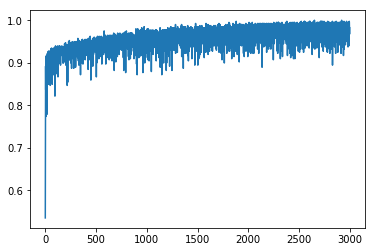

230


In [49]:
plt.plot(history4.history['acc'])
plt.show()
count=0
for i in history4.history['acc']:
    if i>0.99:
        count+=1
print(count)

In [152]:
model6.save('model6.h5')
print("Avg Training acc: ", np.mean(history4.history['acc']),"\nAvg Testing acc: ", np.mean(history4.history['val_acc']))

Avg Training acc:  0.959132328072 
Avg Testing acc:  0.909961011773
